In [3]:
import sys
sys.path.append('../../..')

import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

from IPython.display import display, HTML
display(HTML("<style>.output_result { max-height:100000px !important; }</style>"))
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from lib.carregamento import carregar_base_silver, info_base
from lib.visualizacao import grafico_barras, grafico_pizza, grafico_distribuicao
from lib.cores import aplicar_tema_agibank, PALETA_CATEGORICA, CORES_AGIBANK

aplicar_tema_agibank()

Tema Agibank aplicado - Tamanho: medio
Tema Agibank aplicado - Tamanho: medio


In [179]:
df = carregar_base_silver()
info_base(df)

print("\n" + "="*80)
print("CONTEXTO: Análise de instituições brasileiras")
print("="*80)

total_instituicoes = df['Nome Fantasia'].nunique()
total_reclamacoes = len(df)

print(f"\nTotal de instituições: {total_instituicoes:,}")
print(f"Total de reclamações analisadas: {total_reclamacoes:,}")
print(f"Período: {df['Data Abertura'].min()} a {df['Data Abertura'].max()}")

if 'is_agibank' in df.columns:
    agibank_count = df['is_agibank'].sum()
    agibank_pct = round((agibank_count / len(df) * 100), 2)
    print(f"\nAgibank: {agibank_count:,} reclamações ({agibank_pct}%)")
    print(f"Outras instituições: {len(df) - agibank_count:,} ({round(100 - agibank_pct, 2)}%)")
    print(f"\nNOTA: Esta análise foca no SETOR como um todo")
    print(f"      Comparação Agibank vs Mercado será feita em análise posterior")
else:
    print(f"\nNOTA: Análise de instituições brasileiras")

Carregando de: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\..\..\..\data\silver\consumidor_gov_bronze_v2.csv
Base carregada com sucesso!
Registros: 2,567,095
Colunas: 30
INFORMACOES DA BASE

Total de registros: 2,567,095
Total de colunas: 30
Periodo: 2024 a 2025
Memoria utilizada: 4203.42 MB

CONTEXTO: Análise de instituições brasileiras

Total de instituições: 1,773
Total de reclamações analisadas: 2,567,095
Período: 01/01/2025 a 31/12/2025

Agibank: 19,850 reclamações (0.77%)
Outras instituições: 2,547,245 (99.23%)

NOTA: Esta análise foca no SETOR como um todo
      Comparação Agibank vs Mercado será feita em análise posterior


# Análise do Perfil do Consumidor

## Objetivos:
- Identificar QUEM reclama (idade, sexo, localização)
- ONDE estão os consumidores (região, estado, cidade)
- COMO se comportam (canal, procurou empresa)
- QUANDO reclamam (temporal)
- Identificar PADRÕES e CORRELAÇÕES

# 1. Distribuição por Faixa Etária

## 1.1 Distribuição Básica

In [180]:
print("="*80)
print("1. ANÁLISE POR FAIXA ETÁRIA")
print("="*80)

print("\nPERGUNTA 1: Qual a distribuição por faixa etária?")
print("-" * 80)

faixa_etaria = df['Faixa Etária'].value_counts().sort_index()
faixa_etaria_pct = (faixa_etaria / len(df) * 100).round(2)

print("\nDistribuição por Faixa Etária (todas as instituições):")
for faixa in faixa_etaria.index:
    total = faixa_etaria[faixa]
    pct = faixa_etaria_pct[faixa]
    print(f"   {faixa:25} : {total:>9,} ({pct:>5}%)")

print(f"\nINSIGHT: Perfil etário do consumidor de serviços no Brasil")
print(f"Total de faixas: {len(faixa_etaria)}")

1. ANÁLISE POR FAIXA ETÁRIA

PERGUNTA 1: Qual a distribuição por faixa etária?
--------------------------------------------------------------------------------

Distribuição por Faixa Etária (todas as instituições):
   até 20 anos               :    52,426 ( 2.04%)
   entre 21 a 30 anos        :   612,182 (23.85%)
   entre 31 a 40 anos        :   837,228 (32.61%)
   entre 41 a 50 anos        :   569,449 (22.18%)
   entre 51 a 60 anos        :   259,436 (10.11%)
   entre 61 a 70 anos        :   166,232 ( 6.48%)
   mais de 70 anos           :    70,142 ( 2.73%)

INSIGHT: Perfil etário do consumidor de serviços no Brasil
Total de faixas: 7


## 1.2 Faixa Dominante

In [182]:
print("\nPERGUNTA 2: Qual faixa etária mais reclama nas instituições ?")
print("-" * 80)

faixa_dominante = faixa_etaria.idxmax()
faixa_dominante_total = faixa_etaria.max()
faixa_dominante_pct = round((faixa_dominante_total / len(df) * 100), 2)

print(f"\nFaixa dominante no setor: {faixa_dominante}")
print(f"   Total: {faixa_dominante_total:,}")
print(f"   Percentual: {faixa_dominante_pct}%")

print(f"\nINSIGHT: {faixa_dominante} é o público principal das instituições")
print(f"         Representa {faixa_dominante_pct}% das reclamações do setor")


PERGUNTA 2: Qual faixa etária mais reclama nas instituições ?
--------------------------------------------------------------------------------

Faixa dominante no setor: entre 31 a 40 anos
   Total: 837,228
   Percentual: 32.61%

INSIGHT: entre 31 a 40 anos é o público principal das instituições
         Representa 32.61% das reclamações do setor


## 1.3 Faixa Menos Ativa

In [183]:
print("\nPERGUNTA 3: Qual faixa etária menos reclama?")
print("-" * 80)

faixa_menor = faixa_etaria.idxmin()
faixa_menor_total = faixa_etaria.min()
faixa_menor_pct = round((faixa_menor_total / len(df) * 100), 2)

print(f"\nFaixa menos ativa: {faixa_menor}")
print(f"   Total: {faixa_menor_total:,}")
print(f"   Percentual: {faixa_menor_pct}%")

diferenca_extremos = round(faixa_dominante_total / faixa_menor_total, 1)
print(f"\nINSIGHT: Faixa dominante tem {diferenca_extremos}x MAIS reclamações")
print(f"         Padrão comum em instituições")


PERGUNTA 3: Qual faixa etária menos reclama?
--------------------------------------------------------------------------------

Faixa menos ativa: até 20 anos
   Total: 52,426
   Percentual: 2.04%

INSIGHT: Faixa dominante tem 16.0x MAIS reclamações
         Padrão comum em instituições


## 1.4 Concentração Top 3 Faixas

In [184]:
print("\nPERGUNTA 4: Concentração nas TOP 3 faixas do setor?")
print("-" * 80)

top3_faixas = faixa_etaria.nlargest(3)
top3_faixas_total = top3_faixas.sum()
top3_faixas_pct = round((top3_faixas_total / len(df) * 100), 2)

print(f"\nTop 3 Faixas Etárias:")
for faixa in top3_faixas.index:
    total = top3_faixas[faixa]
    pct = round((total / len(df) * 100), 2)
    print(f"   {faixa}: {total:,} ({pct}%)")

print(f"\nTotal Top 3: {top3_faixas_total:,} ({top3_faixas_pct}%)")

print(f"\nINSIGHT: 3 faixas concentram {top3_faixas_pct}% das reclamações")
print(f"         Padrão de concentração no brasil, comum em instituições")


PERGUNTA 4: Concentração nas TOP 3 faixas do setor?
--------------------------------------------------------------------------------

Top 3 Faixas Etárias:
   entre 31 a 40 anos: 837,228 (32.61%)
   entre 21 a 30 anos: 612,182 (23.85%)
   entre 41 a 50 anos: 569,449 (22.18%)

Total Top 3: 2,018,859 (78.64%)

INSIGHT: 3 faixas concentram 78.64% das reclamações
         Padrão de concentração no brasil, comum em instituições


## 1.5 Satisfação por Idade

In [186]:
print("\nPERGUNTA 5: Satisfação por faixa etária?")
print("-" * 80)

nota_por_idade = df.groupby('Faixa Etária')['Nota do Consumidor'].agg(['mean', 'median', 'count']).round(2)
nota_por_idade = nota_por_idade.sort_values('mean', ascending=False)

print("\nNota média por faixa (escala 1-5, maior = melhor):")
print(nota_por_idade)

faixa_mais_satisfeita = nota_por_idade.index[0]
nota_mais_satisfeita = nota_por_idade.iloc[0]['mean']

faixa_menos_satisfeita = nota_por_idade.index[-1]
nota_menos_satisfeita = nota_por_idade.iloc[-1]['mean']

print(f"\nMAIS satisfeita com o setor: {faixa_mais_satisfeita} (nota {nota_mais_satisfeita:.2f}/5.0)")
print(f"MENOS satisfeita com o setor: {faixa_menos_satisfeita} (nota {nota_menos_satisfeita:.2f}/5.0)")

gap_satisfacao = round(nota_mais_satisfeita - nota_menos_satisfeita, 2)
print(f"\nINSIGHT: Gap de {gap_satisfacao} pontos entre faixas")
print(f"ALERTA: Notas baixas generalizadas - problema sistêmico")
print(f"        50% das avaliações são nota 1 (péssimo)")


PERGUNTA 5: Satisfação por faixa etária?
--------------------------------------------------------------------------------

Nota média por faixa (escala 1-5, maior = melhor):
                    mean  median   count
Faixa Etária                            
entre 31 a 40 anos  2.64     2.0  266297
entre 21 a 30 anos  2.60     1.0  159440
entre 51 a 60 anos  2.57     2.0   80805
entre 41 a 50 anos  2.56     1.0  190604
entre 61 a 70 anos  2.51     1.0   41639
até 20 anos         2.49     1.0   11712
mais de 70 anos     2.45     1.0   15392

MAIS satisfeita com o setor: entre 31 a 40 anos (nota 2.64/5.0)
MENOS satisfeita com o setor: mais de 70 anos (nota 2.45/5.0)

INSIGHT: Gap de 0.19 pontos entre faixas
ALERTA: Notas baixas generalizadas - problema sistêmico
        50% das avaliações são nota 1 (péssimo)


## 1.6 Faixas em Risco

In [185]:
print("\nPERGUNTA 6: Faixas em risco de churn?")
print("-" * 80)

nota_media_geral = round(df['Nota do Consumidor'].mean(), 2)
print(f"\nNota média geral do setor: {nota_media_geral}/5.0")

faixas_risco = nota_por_idade[nota_por_idade['mean'] < nota_media_geral]

print(f"\nFaixas com satisfação ABAIXO DA MÉDIA ({nota_media_geral}):")
print(faixas_risco.sort_values('mean'))

if len(faixas_risco) > 0:
    total_risco = faixas_risco['count'].sum()
    pct_risco = round((total_risco / len(df) * 100), 2)
      
    pior_faixa = faixas_risco['mean'].idxmin()
    pior_nota = faixas_risco['mean'].min()
    pior_count = faixas_risco.loc[pior_faixa, 'count']
    
    print(f"\nMAIOR RISCO no setor: {pior_faixa}")
    print(f"   Nota média: {pior_nota:.2f}/5.0")
    print(f"   Total de consumidores: {pior_count:,}")
    print(f"\nTotal em risco: {total_risco:,} consumidores ({pct_risco}%)")
    print(f"\nINSIGHT: {len(faixas_risco)} faixas abaixo da média do setor")
    print(f"         Oportunidade para instituições que melhorarem atendimento")
    
    melhor_nota = nota_por_idade['mean'].max()
    diferenca = round(melhor_nota - pior_nota, 2)
    print(f"         Gap: {diferenca} pontos entre melhor e pior faixa")
else:
    print("\nTodas as faixas estão acima da média")


PERGUNTA 6: Faixas em risco de churn?
--------------------------------------------------------------------------------

Nota média geral do setor: 2.59/5.0

Faixas com satisfação ABAIXO DA MÉDIA (2.59):
                    mean  median   count
Faixa Etária                            
mais de 70 anos     2.45     1.0   15392
até 20 anos         2.49     1.0   11712
entre 61 a 70 anos  2.51     1.0   41639
entre 41 a 50 anos  2.56     1.0  190604
entre 51 a 60 anos  2.57     2.0   80805

MAIOR RISCO no setor: mais de 70 anos
   Nota média: 2.45/5.0
   Total de consumidores: 15,392

Total em risco: 340,152 consumidores (13.25%)

INSIGHT: 5 faixas abaixo da média do setor
         Oportunidade para instituições que melhorarem atendimento
         Gap: 0.19 pontos entre melhor e pior faixa


## 1.7 Distribuição de Notas por Faixa

In [11]:
print("\nPERGUNTA 7: Distribuição de notas por faixa no setor?")
print("-" * 80)

print("\nTop 5 faixas etárias - distribuição de notas:")
for faixa in faixa_etaria.head(5).index:
    notas = df[df['Faixa Etária'] == faixa]['Nota do Consumidor'].value_counts().sort_index()
    print(f"\n{faixa}:")
    for nota, count in notas.items():
        pct = round((count / len(df[df['Faixa Etária'] == faixa]) * 100), 1)
        print(f"   Nota {nota}: {count:>6,} ({pct:>4}%)")

print(f"\nINSIGHT: Padrão de avaliação consistente entre faixas")
print(f"         Predominância de notas 1 em todas as faixas etárias do setor")


PERGUNTA 7: Distribuição de notas por faixa no setor?
--------------------------------------------------------------------------------

Top 5 faixas etárias - distribuição de notas:

até 20 anos:
   Nota 1.0:  6,031 (11.5%)
   Nota 2.0:    770 ( 1.5%)
   Nota 3.0:  1,042 ( 2.0%)
   Nota 4.0:    910 ( 1.7%)
   Nota 5.0:  2,959 ( 5.6%)

entre 21 a 30 anos:
   Nota 1.0: 80,025 (13.1%)
   Nota 2.0:  8,284 ( 1.4%)
   Nota 3.0: 12,965 ( 2.1%)
   Nota 4.0: 11,689 ( 1.9%)
   Nota 5.0: 46,477 ( 7.6%)

entre 31 a 40 anos:
   Nota 1.0: 131,777 (15.7%)
   Nota 2.0: 12,540 ( 1.5%)
   Nota 3.0: 21,793 ( 2.6%)
   Nota 4.0: 20,301 ( 2.4%)
   Nota 5.0: 79,886 ( 9.5%)

entre 41 a 50 anos:
   Nota 1.0: 96,927 (17.0%)
   Nota 2.0:  9,473 ( 1.7%)
   Nota 3.0: 16,668 ( 2.9%)
   Nota 4.0: 15,266 ( 2.7%)
   Nota 5.0: 52,270 ( 9.2%)

entre 51 a 60 anos:
   Nota 1.0: 40,235 (15.5%)
   Nota 2.0:  4,581 ( 1.8%)
   Nota 3.0:  7,668 ( 3.0%)
   Nota 4.0:  6,722 ( 2.6%)
   Nota 5.0: 21,599 ( 8.3%)

INSIGHT: Padrão d

## 1.8 Tempo de Resposta por Idade

In [187]:
print("\nPERGUNTA 8: Tempo de resposta por faixa no setor?")
print("-" * 80)

print("\nInformações sobre Tempo Resposta:")
print(f"   Tipo: {df['Tempo Resposta'].dtype}")
print(f"   Média geral: {df['Tempo Resposta'].mean():.1f} dias")
print(f"   Mediana geral: {df['Tempo Resposta'].median():.1f} dias")
print(f"   Mínimo: {df['Tempo Resposta'].min():.0f} dias")
print(f"   Máximo: {df['Tempo Resposta'].max():.0f} dias")
print(f"   Total de registros: {df['Tempo Resposta'].count():,}")

tempo_por_idade = df.groupby('Faixa Etária')['Tempo Resposta'].agg(['mean', 'median', 'count']).round(1)
tempo_por_idade = tempo_por_idade[tempo_por_idade['count'] >= 100]
tempo_por_idade = tempo_por_idade.sort_values('mean')

print("\nTempo médio de resposta por faixa:")
print(tempo_por_idade)

if len(tempo_por_idade) > 0:
    faixa_rapida = tempo_por_idade.index[0]
    tempo_rapido = tempo_por_idade.iloc[0]['mean']
    
    faixa_lenta = tempo_por_idade.index[-1]
    tempo_lento = tempo_por_idade.iloc[-1]['mean']
    
    print(f"\nMais rápido: {faixa_rapida} ({tempo_rapido:.1f} dias)")
    print(f"Mais lento: {faixa_lenta} ({tempo_lento:.1f} dias)")
    
    diferenca_tempo = round(tempo_lento - tempo_rapido, 1)
    print(f"\nINSIGHT: Diferença de {diferenca_tempo} dias entre faixas")
    print(f"         Quanto MAIS VELHO, MAIS LENTO o atendimento")
    print(f"         Tempo médio do setor: {df['Tempo Resposta'].mean():.1f} dias")

print("\n--- Investigação: Tempo x Canal por Faixa ---")

print("\nJovens (até 30 anos):")
jovens = df[df['Faixa Etária'].isin(['até 20 anos', 'entre 21 a 30 anos'])]
canal_jovens = jovens['Como Comprou Contratou'].mode()[0] if len(jovens) > 0 else 'N/A'
tempo_jovens = round(jovens['Tempo Resposta'].mean(), 1)
print(f"Canal mais usado: {canal_jovens}")
print(f"Tempo médio: {tempo_jovens} dias")

print("\nIdosos (61+ anos):")
idosos = df[df['Faixa Etária'].isin(['entre 61 a 70 anos', 'mais de 70 anos'])]
canal_idosos = idosos['Como Comprou Contratou'].mode()[0] if len(idosos) > 0 else 'N/A'
tempo_idosos = round(idosos['Tempo Resposta'].mean(), 1)
print(f"Canal mais usado: {canal_idosos}")
print(f"Tempo médio: {tempo_idosos} dias")

print("\nCONCLUSÃO:")
print(f"   • Jovens usam '{canal_jovens}' → {tempo_jovens} dias")
print(f"   • Idosos usam '{canal_idosos}' → {tempo_idosos} dias")
print(f"   • Diferença: {round(tempo_idosos - tempo_jovens, 1)} dias a mais para idosos")
print(f"   • Principal causa: Canal de contratação diferente")
print(f"   • Canais digitais são mais rápidos no setor")


PERGUNTA 8: Tempo de resposta por faixa no setor?
--------------------------------------------------------------------------------

Informações sobre Tempo Resposta:
   Tipo: float64
   Média geral: 6.2 dias
   Mediana geral: 7.0 dias
   Mínimo: 0 dias
   Máximo: 31 dias
   Total de registros: 2,235,303

Tempo médio de resposta por faixa:
                    mean  median   count
Faixa Etária                            
até 20 anos          5.0     4.0   46717
entre 21 a 30 anos   5.8     6.0  540019
entre 31 a 40 anos   6.2     7.0  734854
entre 41 a 50 anos   6.3     7.0  496993
entre 51 a 60 anos   6.5     7.0  222532
entre 61 a 70 anos   6.8     8.0  137554
mais de 70 anos      7.0     8.0   56634

Mais rápido: até 20 anos (5.0 dias)
Mais lento: mais de 70 anos (7.0 dias)

INSIGHT: Diferença de 2.0 dias entre faixas
         Quanto MAIS VELHO, MAIS LENTO o atendimento
         Tempo médio do setor: 6.2 dias

--- Investigação: Tempo x Canal por Faixa ---

Jovens (até 30 anos):
Canal

## 1.9 Taxa de Resolução por Idade

In [13]:
print("\nPERGUNTA 9: Taxa de resolução por faixa no setor?")
print("-" * 80)

print("\nContexto:")
print("   'Taxa de Resolução' = % de reclamações com status 'Resolvida'")
print("   Baseado na coluna 'Avaliação Reclamação'")

print("\nDistribuição geral de avaliações:")
aval_geral = df['Avaliação Reclamação'].value_counts()
aval_geral_pct = (aval_geral / len(df) * 100).round(2)
for aval, count in aval_geral.items():
    pct = aval_geral_pct[aval]
    print(f"   {aval:20} : {count:>9,} ({pct:>5}%)")

resolvidas_por_faixa = df[df['Avaliação Reclamação'] == 'Resolvida'].groupby('Faixa Etária').size()
total_por_faixa = df.groupby('Faixa Etária').size()
resolucao_por_idade = ((resolvidas_por_faixa / total_por_faixa) * 100).round(2)
resolucao_por_idade = resolucao_por_idade.sort_values(ascending=False)

print("\nTaxa de resolução por faixa (% com status 'Resolvida'):")
for faixa, taxa in resolucao_por_idade.items():
    print(f"   {faixa:25} : {taxa:>5}%")

taxa_media = resolucao_por_idade.mean()
melhor_faixa = resolucao_por_idade.index[0]
pior_faixa = resolucao_por_idade.index[-1]

print(f"\n--- Análise ---")
print(f"Taxa média: {taxa_media:.1f}%")
print(f"Melhor faixa: {melhor_faixa} ({resolucao_por_idade.iloc[0]:.1f}%)")
print(f"Pior faixa: {pior_faixa} ({resolucao_por_idade.iloc[-1]:.1f}%)")

avaliadas = df[df['Avaliação Reclamação'].isin(['Resolvida', 'Não Resolvida'])]
total_avaliadas = len(avaliadas)
total_resolvidas = (df['Avaliação Reclamação'] == 'Resolvida').sum()
taxa_real = round((total_resolvidas / total_avaliadas * 100), 1)

print(f"\n--- Taxa REAL (só entre avaliadas) ---")
print(f"Total avaliadas: {total_avaliadas:,}")
print(f"Resolvidas: {total_resolvidas:,}")
print(f"Taxa real de resolução: {taxa_real}%")

print(f"\nINSIGHT: {melhor_faixa} tem melhor taxa de resolução ({resolucao_por_idade.iloc[0]:.1f}%)")
print(f"         Mas {aval_geral_pct['Não Avaliada']:.1f}% das reclamações NÃO foram avaliadas")
print(f"         Entre as AVALIADAS, {taxa_real}% foram resolvidas")


PERGUNTA 9: Taxa de resolução por faixa no setor?
--------------------------------------------------------------------------------

Contexto:
   'Taxa de Resolução' = % de reclamações com status 'Resolvida'
   Baseado na coluna 'Avaliação Reclamação'

Distribuição geral de avaliações:
   Não Avaliada         : 1,539,539 (59.97%)
   Não Resolvida        :   430,607 (16.77%)
   Resolvida            :   335,278 (13.06%)

Taxa de resolução por faixa (% com status 'Resolvida'):
   entre 41 a 50 anos        : 14.64%
   entre 31 a 40 anos        : 14.56%
   entre 51 a 60 anos        : 13.25%
   entre 21 a 30 anos        :  11.2%
   entre 61 a 70 anos        :  10.2%
   mais de 70 anos           :  8.48%
   até 20 anos               :  7.99%

--- Análise ---
Taxa média: 11.5%
Melhor faixa: entre 41 a 50 anos (14.6%)
Pior faixa: até 20 anos (8.0%)

--- Taxa REAL (só entre avaliadas) ---
Total avaliadas: 765,885
Resolvidas: 335,278
Taxa real de resolução: 43.8%

INSIGHT: entre 41 a 50 anos tem 

## 1.10 Faixas Economicamente Ativas

In [188]:
print("\nPERGUNTA 10: Concentração nas faixas ECONOMICAMENTE ATIVAS?")
print("-" * 80)

faixas_ativas = ['entre 21 a 30 anos', 'entre 31 a 40 anos', 'entre 41 a 50 anos', 'entre 51 a 60 anos']
df_ativos = df[df['Faixa Etária'].isin(faixas_ativas)]

total_ativos = len(df_ativos)
pct_ativos = round((total_ativos / len(df) * 100), 2)

print(f"\nFaixas Economicamente Ativas (21-60 anos):")
print(f"   Total: {total_ativos:,}")
print(f"   Percentual: {pct_ativos}%")

print(f"\nINSIGHT: {pct_ativos}% das reclamações vêm de pessoas em idade produtiva")
print(f"         Principal público-alvo das instituições")
print(f"         Foco estratégico para retenção e satisfação no setor")


PERGUNTA 10: Concentração nas faixas ECONOMICAMENTE ATIVAS?
--------------------------------------------------------------------------------

Faixas Economicamente Ativas (21-60 anos):
   Total: 2,278,295
   Percentual: 88.75%

INSIGHT: 88.75% das reclamações vêm de pessoas em idade produtiva
         Principal público-alvo das instituições
         Foco estratégico para retenção e satisfação no setor


# 2. SEXO/GÊNERO

## 2.1 Distribuição Básica

In [189]:
print("\n" + "="*80)
print("2. ANÁLISE POR SEXO/GÊNERO")
print("="*80)

print("\nPERGUNTA 11: Distribuição por sexo?")
print("-" * 80)

sexo = df['Sexo'].value_counts()

print("\nDistribuição por Sexo (todas as instituições):")
for s, total in sexo.items():
    pct = round((total / len(df) * 100), 2)
    print(f"   {s}: {total:>9,} ({pct:>5}%)")

diferenca = abs(sexo.iloc[0] - sexo.iloc[1])
diferenca_pct = round((diferenca / len(df) * 100), 2)

print(f"\nDiferença absoluta: {diferenca:,} ({diferenca_pct}%)")
print(f"\nINSIGHT: Perfil de gênero dos consumidores de serviços no Brasil")


2. ANÁLISE POR SEXO/GÊNERO

PERGUNTA 11: Distribuição por sexo?
--------------------------------------------------------------------------------

Distribuição por Sexo (todas as instituições):
   M: 1,429,750 ( 55.7%)
   F: 1,135,436 (44.23%)
   O:     1,854 ( 0.07%)

Diferença absoluta: 294,314 (11.46%)

INSIGHT: Perfil de gênero dos consumidores de serviços no Brasil


## 2.2 É Equilibrado?

In [190]:
print("\nPERGUNTA 12: A distribuição por gênero é equilibrada no setor?")
print("-" * 80)

maior_sexo = sexo.idxmax()
maior_pct = round((sexo.max() / len(df) * 100), 2)

if maior_pct > 60:
    status = "MUITO DESEQUILIBRADA"
elif maior_pct > 55:
    status = "LEVEMENTE DESEQUILIBRADA"
else:
    status = "EQUILIBRADA"

print(f"\nStatus: {status}")
print(f"   {maior_sexo} representa {maior_pct}%")
print(f"   Diferença: {diferenca_pct} pontos percentuais")

if maior_pct < 55:
    print(f"\nINSIGHT: Distribuição equilibrada")
    print(f"         Não há necessidade de segmentação específica por gênero")
else:
    print(f"\nINSIGHT: Desequilíbrio no setor - considerar estratégias por gênero")


PERGUNTA 12: A distribuição por gênero é equilibrada no setor?
--------------------------------------------------------------------------------

Status: LEVEMENTE DESEQUILIBRADA
   M representa 55.7%
   Diferença: 11.46 pontos percentuais

INSIGHT: Desequilíbrio no setor - considerar estratégias por gênero


## 2.3 Satisfação por Sexo

In [192]:
print("\nPERGUNTA 13: Satisfação por gênero?")
print("-" * 80)

nota_por_sexo = df.groupby('Sexo')['Nota do Consumidor'].agg(['mean', 'median', 'std', 'count']).round(2)

print("\nEstatísticas por sexo:")
print(nota_por_sexo)

if 'M' in nota_por_sexo.index and 'F' in nota_por_sexo.index:
    nota_m = nota_por_sexo.loc['M', 'mean']
    nota_f = nota_por_sexo.loc['F', 'mean']
    diferenca_nota = round(abs(nota_m - nota_f), 2)
    
    mais_satisfeito = 'Homens' if nota_m > nota_f else 'Mulheres'
    print(f"\n{mais_satisfeito} ligeiramente mais satisfeitos")
    print(f"   Diferença: {diferenca_nota} pontos")
    
    if diferenca_nota < 0.05:
        print(f"\nINSIGHT: Satisfação PRATICAMENTE IGUAL entre gêneros")
        print(f"         Problemas de atendimento afetam ambos os gêneros igualmente")
    elif diferenca_nota < 0.15:
        print(f"\nINSIGHT: Diferença PEQUENA mas perceptível")
    else:
        print(f"\nINSIGHT: Diferença SIGNIFICATIVA - investigar causas no setor")


PERGUNTA 13: Satisfação por gênero?
--------------------------------------------------------------------------------

Estatísticas por sexo:
      mean  median   std   count
Sexo                            
F     2.56     1.0  1.74  310989
M     2.61     1.0  1.78  454304
O     2.40     1.0  1.69     581

Homens ligeiramente mais satisfeitos
   Diferença: 0.05 pontos

INSIGHT: Diferença PEQUENA mas perceptível


## 2.4 Tempo de Resposta por Sexo

In [193]:
print("\nPERGUNTA 14: Tempo de resposta por sexo no setor?")
print("-" * 80)

tempo_por_sexo = df.groupby('Sexo')['Tempo Resposta'].agg(['mean', 'median', 'count']).round(1)

print("\nTempo de resposta por sexo:")
print(tempo_por_sexo)

if 'M' in tempo_por_sexo.index and 'F' in tempo_por_sexo.index:
    tempo_m = tempo_por_sexo.loc['M', 'mean']
    tempo_f = tempo_por_sexo.loc['F', 'mean']
    diferenca_tempo = round(abs(tempo_m - tempo_f), 1)
    
    if diferenca_tempo < 0.5:
        print(f"\nINSIGHT: Tempo praticamente IGUAL ({diferenca_tempo} dias de diferença)")
        print(f"         Instituições tratam ambos os gêneros igualmente")
    else:
        mais_rapido = 'Homens' if tempo_m < tempo_f else 'Mulheres'
        print(f"\nINSIGHT: {mais_rapido} recebem resposta {diferenca_tempo} dias mais rápido")
        print(f"         Possível viés no atendimento do setor")
    
    print("\n--- Investigação: Canal usado por gênero ---")
    print("\nHomens:")
    homens = df[df['Sexo'] == 'M']
    canal_h = homens['Como Comprou Contratou'].mode()[0] if len(homens) > 0 else 'N/A'
    print(f"Canal mais usado: {canal_h}")
    
    print("\nMulheres:")
    mulheres = df[df['Sexo'] == 'F']
    canal_f = mulheres['Como Comprou Contratou'].mode()[0] if len(mulheres) > 0 else 'N/A'
    print(f"Canal mais usado: {canal_f}")
    
    if canal_h == canal_f:
        print(f"\nCONCLUSÃO: Ambos usam '{canal_h}' - diferença não é por canal")
    else:
        print(f"\nCONCLUSÃO: Canais diferentes podem explicar a diferença de tempo")


PERGUNTA 14: Tempo de resposta por sexo no setor?
--------------------------------------------------------------------------------

Tempo de resposta por sexo:
      mean  median    count
Sexo                       
F      6.2     7.0   986947
M      6.2     7.0  1246720
O      6.1     7.0     1586

INSIGHT: Tempo praticamente IGUAL (0.0 dias de diferença)
         Instituições tratam ambos os gêneros igualmente

--- Investigação: Canal usado por gênero ---

Homens:
Canal mais usado: Internet

Mulheres:
Canal mais usado: Internet

CONCLUSÃO: Ambos usam 'Internet' - diferença não é por canal


## 2.4 Taxa de Resolução por Sexo

In [194]:
print("\nPERGUNTA 15: Taxa de resolução por sexo no setor?")
print("-" * 80)

resolvidas_por_sexo = df[df['Avaliação Reclamação'] == 'Resolvida'].groupby('Sexo').size()
total_por_sexo = df.groupby('Sexo').size()
resolucao_por_sexo = ((resolvidas_por_sexo / total_por_sexo) * 100).round(2)

print("\nTaxa de resolução:")
for sexo_val, taxa in resolucao_por_sexo.items():
    print(f"   {sexo_val}: {taxa}%")

if len(resolucao_por_sexo) >= 2:
    diferenca_resolucao = round(abs(resolucao_por_sexo.iloc[0] - resolucao_por_sexo.iloc[1]), 1)
    print(f"\nINSIGHT: Diferença de {diferenca_resolucao}% na taxa de resolução")
    if diferenca_resolucao < 2:
        print(f"         Tratamento equitativo")
    else:
        print(f"         Disparidade no atendimento - requer atenção")


PERGUNTA 15: Taxa de resolução por sexo no setor?
--------------------------------------------------------------------------------

Taxa de resolução:
   F: 11.63%
   M: 14.2%
   O: 13.05%

INSIGHT: Diferença de 2.6% na taxa de resolução
         Disparidade no atendimento - requer atenção


## 2.5 Distribuição de Notas por Sexo

In [195]:
# PERGUNTA 16: Como se DISTRIBUEM as notas por sexo?
print("\nPERGUNTA 16: Distribuição de notas por sexo no setor?")
print("-" * 80)

print("\nDistribuição de notas:")

# Definir ordem (M, F, O, outros)
ordem_sexo = ['M', 'F', 'O']
sexos_unicos = df['Sexo'].dropna().unique()

# Adicionar outros valores que não estão na ordem predefinida
for s in sexos_unicos:
    if s not in ordem_sexo:
        ordem_sexo.append(s)

for sexo_val in ordem_sexo:
    if sexo_val in df['Sexo'].values:
        print(f"\n{sexo_val}:")
        notas = df[df['Sexo'] == sexo_val]['Nota do Consumidor'].value_counts().sort_index()
        total_sexo = len(df[df['Sexo'] == sexo_val])
        
        for nota, count in notas.items():
            pct = round((count / total_sexo * 100), 1)
            print(f"   Nota {nota}: {count:>7,} ({pct:>4}%)")
        
        print(f"   Total: {total_sexo:,}")

print(f"\nINSIGHT: Padrão de avaliação similar entre todos os gêneros")


PERGUNTA 16: Distribuição de notas por sexo no setor?
--------------------------------------------------------------------------------

Distribuição de notas:

M:
   Nota 1.0: 228,317 (16.0%)
   Nota 2.0:  21,474 ( 1.5%)
   Nota 3.0:  36,872 ( 2.6%)
   Nota 4.0:  33,804 ( 2.4%)
   Nota 5.0: 133,837 ( 9.4%)
   Total: 1,429,750

F:
   Nota 1.0: 156,288 (13.8%)
   Nota 2.0:  17,181 ( 1.5%)
   Nota 3.0:  28,034 ( 2.5%)
   Nota 4.0:  25,572 ( 2.3%)
   Nota 5.0:  83,914 ( 7.4%)
   Total: 1,135,436

O:
   Nota 1.0:     314 (16.9%)
   Nota 2.0:      33 ( 1.8%)
   Nota 3.0:      51 ( 2.8%)
   Nota 4.0:      53 ( 2.9%)
   Nota 5.0:     130 ( 7.0%)
   Total: 1,854

INSIGHT: Padrão de avaliação similar entre todos os gêneros


## 2.6 Quem Procura Mais a Empresa?

In [196]:
print("\nPERGUNTA 18: Quem procura mais a instituição antes de reclamar?")
print("-" * 80)

procurou_por_sexo = pd.crosstab(df['Sexo'], df['Procurou Empresa'], normalize='index') * 100

print("\nPercentual que procurou a instituição:")
print(procurou_por_sexo.round(1))

if 'M' in procurou_por_sexo.index and 'F' in procurou_por_sexo.index and 'S' in procurou_por_sexo.columns:
    pct_m = procurou_por_sexo.loc['M', 'S']
    pct_f = procurou_por_sexo.loc['F', 'S']
    
    mais_proativo = 'Homens' if pct_m > pct_f else 'Mulheres'
    diferenca_proc = round(abs(pct_m - pct_f), 1)
    
    print(f"\nINSIGHT: {mais_proativo} são ligeiramente mais proativos ({diferenca_proc}% de diferença)")
    print(f"         Padrão de comportamento")


PERGUNTA 18: Quem procura mais a instituição antes de reclamar?
--------------------------------------------------------------------------------

Percentual que procurou a instituição:
Procurou Empresa     N     S
Sexo                        
F                 21.3  78.7
M                 22.7  77.3
O                 21.7  78.3

INSIGHT: Mulheres são ligeiramente mais proativos (1.4% de diferença)
         Padrão de comportamento


## 2.7 Notas Baixas por Sexo

In [197]:
print("\nPERGUNTA 19: Quem dá mais notas baixas no setor?")
print("-" * 80)

notas_baixas = df[df['Nota do Consumidor'] <= 2.0]
notas_baixas_sexo = notas_baixas['Sexo'].value_counts()

print("\nNotas ≤ 2 por sexo:")
for sexo_val, count in notas_baixas_sexo.items():
    total_sexo = len(df[df['Sexo'] == sexo_val])
    pct = round((count / total_sexo * 100), 2)
    print(f"   {sexo_val}: {count:,} ({pct}% do total de {sexo_val})")

if len(notas_baixas_sexo) >= 2:
    pcts = {}
    for sexo_val in notas_baixas_sexo.index:
        total_sexo = len(df[df['Sexo'] == sexo_val])
        pcts[sexo_val] = round((notas_baixas_sexo[sexo_val] / total_sexo * 100), 2)
    
    mais_critico = max(pcts, key=pcts.get)
    menos_critico = min(pcts, key=pcts.get)
    diferenca_max = round(pcts[mais_critico] - pcts[menos_critico], 2)
    
    print(f"\n--- Análise ---")
    print(f"Mais crítico: {mais_critico} ({pcts[mais_critico]}%)")
    print(f"Menos crítico: {menos_critico} ({pcts[menos_critico]}%)")
    print(f"Diferença: {diferenca_max} pontos percentuais")

print(f"\nINSIGHT: Proporção de insatisfação similar entre gêneros ({diferenca_max}pp de diferença)")
print(f"         Problema generalizado")
print(f"         Cerca de 15-19% de cada grupo dá notas baixas")


PERGUNTA 19: Quem dá mais notas baixas no setor?
--------------------------------------------------------------------------------

Notas ≤ 2 por sexo:
   M: 249,791 (17.47% do total de M)
   F: 173,469 (15.28% do total de F)
   O: 347 (18.72% do total de O)

--- Análise ---
Mais crítico: O (18.72%)
Menos crítico: F (15.28%)
Diferença: 3.44 pontos percentuais

INSIGHT: Proporção de insatisfação similar entre gêneros (3.44pp de diferença)
         Problema generalizado
         Cerca de 15-19% de cada grupo dá notas baixas


## 2.8 Respondida por Sexo

In [198]:
print("\nPERGUNTA 20: Taxa de resposta por sexo no setor?")
print("-" * 80)

respondida_por_sexo = pd.crosstab(df['Sexo'], df['Respondida'], normalize='index') * 100

print("\nTaxa de resposta (%):")
print(respondida_por_sexo.round(1))

if 'S' in respondida_por_sexo.columns:
    taxas = respondida_por_sexo['S'].sort_values(ascending=False)
    
    print(f"\n--- Ranking de Taxa de Resposta ---")
    for sexo_val, taxa in taxas.items():
        print(f"   {sexo_val}: {taxa:.1f}%")
    
    maior_taxa = taxas.max()
    menor_taxa = taxas.min()
    diferenca = round(maior_taxa - menor_taxa, 1)
    
    print(f"\n--- Análise ---")
    print(f"Maior taxa: {taxas.idxmax()} ({maior_taxa:.1f}%)")
    print(f"Menor taxa: {taxas.idxmin()} ({menor_taxa:.1f}%)")
    print(f"Diferença: {diferenca} pontos percentuais")
    
    print(f"\nINSIGHT: Taxa de resposta MUITO similar entre gêneros ({diferenca}pp de diferença)")
    print(f"         Instituições respondem igualmente a todos")
    print(f"         Média geral: {taxas.mean():.1f}% de taxa de resposta")


PERGUNTA 20: Taxa de resposta por sexo no setor?
--------------------------------------------------------------------------------

Taxa de resposta (%):
Respondida     N     S
Sexo                  
F           13.1  86.9
M           12.8  87.2
O           14.5  85.5

--- Ranking de Taxa de Resposta ---
   M: 87.2%
   F: 86.9%
   O: 85.5%

--- Análise ---
Maior taxa: M (87.2%)
Menor taxa: O (85.5%)
Diferença: 1.7 pontos percentuais

INSIGHT: Taxa de resposta MUITO similar entre gêneros (1.7pp de diferença)
         Instituições respondem igualmente a todos
         Média geral: 86.6% de taxa de resposta


# 3. GEOGRAFIA - REGIÃO

## 3.1 Distribuição por Região

In [199]:
print("\n" + "="*80)
print("3. ANÁLISE GEOGRÁFICA - REGIÃO")
print("="*80)

print("\nPERGUNTA 21: Distribuição por região?")
print("-" * 80)

df['Região'] = df['Região'].str.strip()

regiao_count = df['Região'].value_counts()
regiao_pct = (regiao_count / len(df) * 100).round(2)

mapa_regioes = {
    'N': 'Norte',
    'NE': 'Nordeste',
    'CO': 'Centro-Oeste',
    'SE': 'Sudeste',
    'S': 'Sul'
}

ordem_regioes = ['N', 'NE', 'CO', 'SE', 'S']

print("\nDistribuição por Região:")
for sigla in ordem_regioes:
    if sigla in regiao_count.index:
        total = regiao_count[sigla]
        pct = regiao_pct[sigla]
        nome = mapa_regioes[sigla]
        print(f"   • {nome:15} : {total:>9,} ({pct:>5.2f}%)")

regiao_dominante_sigla = regiao_count.idxmax()
regiao_dominante_nome = mapa_regioes[regiao_dominante_sigla]
regiao_dominante_pct = regiao_pct.max()

print(f"\nINSIGHT: {regiao_dominante_nome} domina com {regiao_dominante_pct}%")
print(f"            Concentração de reclamações reflete distribuição populacional e econômica")
print(f"            Norte representa apenas {regiao_pct.get('N', 0):.2f}% - possível sub-representação")


3. ANÁLISE GEOGRÁFICA - REGIÃO

PERGUNTA 21: Distribuição por região?
--------------------------------------------------------------------------------

Distribuição por Região:
   • Norte           :   141,610 ( 5.52%)
   • Nordeste        :   488,253 (19.02%)
   • Centro-Oeste    :   263,641 (10.27%)
   • Sudeste         : 1,262,212 (49.17%)
   • Sul             :   411,379 (16.03%)

INSIGHT: Sudeste domina com 49.17%
            Concentração de reclamações reflete distribuição populacional e econômica
            Norte representa apenas 5.52% - possível sub-representação


## 3.2 Concentração Regional

In [200]:
print("\nPERGUNTA 22: Concentração no Sudeste?")
print("-" * 80)

# Dados do Sudeste
total_geral = len(df)
total_sudeste = regiao_count['SE']
pct_sudeste = regiao_pct['SE']

print(f"\nANÁLISE DE CONCENTRAÇÃO NO SUDESTE:")
print(f"   • Total de reclamações: {total_sudeste:,}")
print(f"   • Percentual do total: {pct_sudeste:.2f}%")
print(f"   • Representa mais da METADE de todas as reclamações")

# Comparação com outras regiões
print(f"\nCOMPARATIVO:")
outras_regioes_total = total_geral - total_sudeste
outras_regioes_pct = 100 - pct_sudeste
print(f"   • Sudeste:        {total_sudeste:>9,} ({pct_sudeste:>5.2f}%)")
print(f"   • Outras regiões: {outras_regioes_total:>9,} ({outras_regioes_pct:>5.2f}%)")
print(f"   • Diferença:      {total_sudeste - outras_regioes_total:>9,}")

# Razão de concentração
razao = pct_sudeste / (100 - pct_sudeste)
print(f"\nRAZÃO DE CONCENTRAÇÃO:")
print(f"   • Para cada reclamação fora do Sudeste, há {razao:.2f} reclamações no Sudeste")

# Possíveis causas
print(f"\nPOSSÍVEIS CAUSAS DA CONCENTRAÇÃO:")
print(f"   ✓ Maior densidade populacional (43% da população brasileira)")
print(f"   ✓ Maior concentração de instituições")
print(f"   ✓ Maior acesso a canais de reclamação")
print(f"   ✓ Maior bancarização da população")
print(f"   ✓ Hub econômico e financeiro do país")


PERGUNTA 22: Concentração no Sudeste?
--------------------------------------------------------------------------------

ANÁLISE DE CONCENTRAÇÃO NO SUDESTE:
   • Total de reclamações: 1,262,212
   • Percentual do total: 49.17%
   • Representa mais da METADE de todas as reclamações

COMPARATIVO:
   • Sudeste:        1,262,212 (49.17%)
   • Outras regiões: 1,304,883 (50.83%)
   • Diferença:        -42,671

RAZÃO DE CONCENTRAÇÃO:
   • Para cada reclamação fora do Sudeste, há 0.97 reclamações no Sudeste

POSSÍVEIS CAUSAS DA CONCENTRAÇÃO:
   ✓ Maior densidade populacional (43% da população brasileira)
   ✓ Maior concentração de instituições
   ✓ Maior acesso a canais de reclamação
   ✓ Maior bancarização da população
   ✓ Hub econômico e financeiro do país


## 3.3 Satisfação por Região

In [202]:
print("\nPERGUNTA 23: Satisfação por região?")
print("-" * 80)

# Calculando estatísticas por região com dados válidos de nota
regiao_satisfacao = df[df['Nota do Consumidor'].notna()].groupby('Região')['Nota do Consumidor'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('count', 'count')
]).round(2)

# Ordenando por média (decrescente)
regiao_satisfacao = regiao_satisfacao.sort_values('mean', ascending=False)

print("\nNOTA MÉDIA POR REGIÃO:")
print(f"{'Região':<15} {'Média':<8} {'Mediana':<10} {'Avaliações':>12}")
print("-" * 80)

for sigla, row in regiao_satisfacao.iterrows():
    nome_regiao = mapa_regioes[sigla]
    media = row['mean']
    mediana = int(row['median'])
    total = int(row['count'])
    
    # Barra visual de satisfação (adaptável de 0 a 5)
    barra_cheia = int(media)
    barra_vazia = 5 - barra_cheia
    barra = "█" * barra_cheia + "░" * barra_vazia
    
    print(f"{nome_regiao:<15} {media:>4.2f}/5  {barra}  Med: {mediana}  |  {total:>9,} avaliações")

# Identificando extremos dinamicamente
regiao_melhor = regiao_satisfacao.index[0]
regiao_pior = regiao_satisfacao.index[-1]
nota_melhor = regiao_satisfacao.iloc[0]['mean']
nota_pior = regiao_satisfacao.iloc[-1]['mean']
gap = nota_melhor - nota_pior

print(f"\nRANKING:")
print(f"   • MAIS satisfeita:  {mapa_regioes[regiao_melhor]} ({nota_melhor:.2f}/5)")
print(f"   • MENOS satisfeita: {mapa_regioes[regiao_pior]} ({nota_pior:.2f}/5)")
print(f"   • Diferença (gap):  {gap:.2f} pontos")

# Análise dinâmica da qualidade das notas
media_geral = regiao_satisfacao['mean'].mean()

print(f"\nINSIGHTS:")

# 1. Análise do nível geral de satisfação
if media_geral < 2.5:
    nivel = "MUITO BAIXA"
    emoji = "🔴"
elif media_geral < 3.5:
    nivel = "BAIXA"
    emoji = "🟡"
elif media_geral < 4.0:
    nivel = "MODERADA"
    emoji = "🟢"
else:
    nivel = "ALTA"
    emoji = "🟢"

print(f"   {emoji} Satisfação geral: {nivel} (média de {media_geral:.2f}/5 entre regiões)")

# 2. Análise da homogeneidade
if gap < 0.2:
    print(f"   ✓ Gap pequeno ({gap:.2f}): satisfação HOMOGÊNEA entre regiões")
    print(f"   → Problema é NACIONAL, não regional")
elif gap < 0.5:
    print(f"   ⚠ Gap moderado ({gap:.2f}): algumas diferenças regionais")
    print(f"   → Atenção especial para {mapa_regioes[regiao_pior]}")
else:
    print(f"   🔴 Gap significativo ({gap:.2f}): GRANDES disparidades regionais")
    print(f"   → Urgente investigar {mapa_regioes[regiao_pior]}")

# 3. Análise da mediana (distribuição)
mediana_geral = regiao_satisfacao['median'].median()
if mediana_geral <= 2:
    print(f"   ⚠ Mediana baixa ({mediana_geral:.0f}): maioria das avaliações são NEGATIVAS")
elif mediana_geral >= 4:
    print(f"   ✓ Mediana alta ({mediana_geral:.0f}): maioria das avaliações são POSITIVAS")
else:
    print(f"   → Mediana neutra ({mediana_geral:.0f}): avaliações divididas")

# 4. Correlação volume x satisfação
volume_melhor = regiao_count[regiao_melhor]
volume_pior = regiao_count[regiao_pior]

print(f"\nANÁLISE VOLUME vs SATISFAÇÃO:")
print(f"   • {mapa_regioes[regiao_melhor]}: {volume_melhor:>9,} reclamações → Nota {nota_melhor:.2f}")
print(f"   • {mapa_regioes[regiao_pior]}: {volume_pior:>9,} reclamações → Nota {nota_pior:.2f}")

if volume_pior > volume_melhor:
    print(f"   → Região com MAIS reclamações tem MENOR satisfação")
    print(f"   → Possível sobrecarga ou problemas sistêmicos em grandes centros")
elif volume_melhor > volume_pior * 2:
    print(f"   → Região com MAIS reclamações mantém MELHOR satisfação")
    print(f"   → Bom gerenciamento de alto volume")
else:
    print(f"   → Volume não parece ser fator determinante na satisfação")

# 5. Recomendações dinâmicas
print(f"\nRECOMENDAÇÕES:")
if media_geral < 3.0:
    print(f"   🔴 CRÍTICO: Todas as regiões com notas baixas")
    print(f"      → Revisar processos nacionais de atendimento e resolução")
    print(f"      → Melhorar canais de atendimento e resolução")

if gap > 0.3:
    print(f"   ⚠ Disparidade regional identificada")
    print(f"      → Benchmarking: {mapa_regioes[regiao_melhor]} pode ensinar {mapa_regioes[regiao_pior]}")

if volume_pior > 1000000 and nota_pior < 3.0:
    print(f"   🔴 {mapa_regioes[regiao_pior]}: Alto volume + Baixa satisfação")
    print(f"      → Priorizar investimentos e recursos nesta região")


PERGUNTA 23: Satisfação por região?
--------------------------------------------------------------------------------

NOTA MÉDIA POR REGIÃO:
Região          Média    Mediana      Avaliações
--------------------------------------------------------------------------------
Norte           2.72/5  ██░░░  Med: 2  |     38,240 avaliações
Centro-Oeste    2.68/5  ██░░░  Med: 2  |     81,037 avaliações
Nordeste        2.63/5  ██░░░  Med: 2  |    145,039 avaliações
Sul             2.58/5  ██░░░  Med: 1  |    121,672 avaliações
Sudeste         2.55/5  ██░░░  Med: 1  |    379,901 avaliações

RANKING:
   • MAIS satisfeita:  Norte (2.72/5)
   • MENOS satisfeita: Sudeste (2.55/5)
   • Diferença (gap):  0.17 pontos

INSIGHTS:
   🟡 Satisfação geral: BAIXA (média de 2.63/5 entre regiões)
   ✓ Gap pequeno (0.17): satisfação HOMOGÊNEA entre regiões
   → Problema é NACIONAL, não regional
   ⚠ Mediana baixa (2): maioria das avaliações são NEGATIVAS

ANÁLISE VOLUME vs SATISFAÇÃO:
   • Norte:   141,610 recla

## 3.4 Tempo de Resposta por Região

In [27]:
print("\nPERGUNTA 24: Tempo de resposta por região no setor?")
print("-" * 80)

regiao_tempo = df[df['Tempo Resposta'].notna()].groupby('Região')['Tempo Resposta'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('count', 'count')
]).round(1)

regiao_tempo = regiao_tempo.sort_values('mean', ascending=True)

print("\nTEMPO MÉDIO DE RESPOSTA POR REGIÃO:")
print(f"{'Região':<15} {'Média':<10} {'Mediana':<10} {'Desvio':<10} {'Reclamações':>12}")
print("-" * 80)

for sigla, row in regiao_tempo.iterrows():
    nome_regiao = mapa_regioes[sigla]
    media = row['mean']
    mediana = row['median']
    desvio = row['std']
    total = int(row['count'])
    
   
    if media < 6:
        indicador = "🟢 Rápido  "
    elif media < 7:
        indicador = "🟡 Moderado"
    else:
        indicador = "🔴 Lento   "
    
    print(f"{nome_regiao:<15} {media:>5.1f} dias  Med: {mediana:>4.1f}  DP: {desvio:>5.1f}  |  {total:>9,} | {indicador}")

regiao_rapida = regiao_tempo.index[0]
regiao_lenta = regiao_tempo.index[-1]
tempo_rapido = regiao_tempo.iloc[0]['mean']
tempo_lento = regiao_tempo.iloc[-1]['mean']
diferenca = tempo_lento - tempo_rapido

print(f"\nRANKING DE VELOCIDADE:")
print(f"   • MAIS rápida:  {mapa_regioes[regiao_rapida]} ({tempo_rapido:.1f} dias)")
print(f"   • MAIS lenta:   {mapa_regioes[regiao_lenta]} ({tempo_lento:.1f} dias)")
print(f"   • Diferença:    {diferenca:.1f} dias ({(diferenca/tempo_rapido*100):.1f}% mais lento)")

tempo_medio_geral = regiao_tempo['mean'].mean()
prazo_legal = 10  

print(f"\nINSIGHTS:")

if tempo_medio_geral <= 5:
    print(f"   🟢 Tempo geral EXCELENTE: {tempo_medio_geral:.1f} dias em média")
elif tempo_medio_geral <= 7:
    print(f"   🟡 Tempo geral BOM: {tempo_medio_geral:.1f} dias em média")
elif tempo_medio_geral <= prazo_legal:
    print(f"   🟠 Tempo geral ACEITÁVEL: {tempo_medio_geral:.1f} dias (dentro do prazo legal)")
else:
    print(f"   🔴 Tempo geral CRÍTICO: {tempo_medio_geral:.1f} dias (acima do prazo legal)")

if diferenca < 0.5:
    print(f"   ✓ Diferença mínima ({diferenca:.1f} dias): atendimento HOMOGÊNEO nacionalmente")
    print(f"   → Processos padronizados entre regiões")
elif diferenca < 1.5:
    print(f"   ⚠ Diferença moderada ({diferenca:.1f} dias): pequenas variações regionais")
elif diferenca >= 2:
    print(f"   🔴 Diferença significativa ({diferenca:.1f} dias): DISPARIDADE regional crítica")
    print(f"   → Investigar causas estruturais em {mapa_regioes[regiao_lenta]}")

desvio_medio = regiao_tempo['std'].mean()
if desvio_medio < 3:
    print(f"   ✓ Baixa variação (DP médio: {desvio_medio:.1f}): atendimento CONSISTENTE")
elif desvio_medio < 5:
    print(f"   → Variação moderada (DP médio: {desvio_medio:.1f}): alguma inconsistência")
else:
    print(f"   ⚠ Alta variação (DP médio: {desvio_medio:.1f}): atendimento INCONSISTENTE")

print(f"\nINVESTIGAÇÃO: CANAL DE ATENDIMENTO")

print(f"\n   [DEBUG] Verificando dados de canal...")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Registros com Tempo Resposta: {df['Tempo Resposta'].notna().sum():,}")
print(f"   • Registros com Canal: {df['Como Comprou Contratou'].notna().sum():,}")

df_canal = df[df['Tempo Resposta'].notna() & df['Como Comprou Contratou'].notna()].copy()
print(f"   • Registros com ambos (Tempo + Canal): {len(df_canal):,}")

if len(df_canal) == 0:
    print(f"\n   ATENÇÃO: Nenhum registro possui ambos Tempo Resposta e Canal preenchidos")
    print(f"   → Análise de canal não pode ser realizada")
    print(f"   → Possível problema de qualidade de dados")
else:
    
    registros_rapida = len(df_canal[df_canal['Região'] == regiao_rapida])
    registros_lenta = len(df_canal[df_canal['Região'] == regiao_lenta])
    
    print(f"   • {mapa_regioes[regiao_rapida]}: {registros_rapida:,} registros com canal")
    print(f"   • {mapa_regioes[regiao_lenta]}: {registros_lenta:,} registros com canal")
    
    if registros_rapida > 0 and registros_lenta > 0:
        # Distribuição de canais por região
        canais_rapida = df_canal[df_canal['Região'] == regiao_rapida]['Como Comprou Contratou'].value_counts(normalize=True).head(3)
        canais_lenta = df_canal[df_canal['Região'] == regiao_lenta]['Como Comprou Contratou'].value_counts(normalize=True).head(3)
        
        print(f"\n   📍 {mapa_regioes[regiao_rapida]} (mais rápida - {tempo_rapido:.1f} dias):")
        for canal, pct in canais_rapida.items():
            print(f"      • {canal}: {pct*100:.1f}%")
        
        print(f"\n   📍 {mapa_regioes[regiao_lenta]} (mais lenta - {tempo_lento:.1f} dias):")
        for canal, pct in canais_lenta.items():
            print(f"      • {canal}: {pct*100:.1f}%")
        
        # Conclusão sobre canal
        canal_rapida = df_canal[df_canal['Região'] == regiao_rapida]['Como Comprou Contratou'].mode()
        canal_lenta = df_canal[df_canal['Região'] == regiao_lenta]['Como Comprou Contratou'].mode()
        
        if len(canal_rapida) > 0 and len(canal_lenta) > 0:
            if canal_rapida.values[0] == canal_lenta.values[0]:
                print(f"\n   ✓ Mesmo canal dominante ({canal_rapida.values[0]})")
                print(f"   → Diferença NÃO é por tipo de canal/digitalização")
                print(f"   → Possíveis causas: volume, gestão operacional, infraestrutura local")
            else:
                print(f"\n   ⚠ Canais dominantes diferentes:")
                print(f"      {mapa_regioes[regiao_rapida]}: {canal_rapida.values[0]}")
                print(f"      {mapa_regioes[regiao_lenta]}: {canal_lenta.values[0]}")
                print(f"   → Digitalização pode influenciar velocidade de resposta")
    else:
        print(f"\nDados insuficientes para análise comparativa de canais")

volume_rapida = regiao_count[regiao_rapida]
volume_lenta = regiao_count[regiao_lenta]

print(f"\nANÁLISE VOLUME vs TEMPO:")
print(f"   • {mapa_regioes[regiao_rapida]}: {volume_rapida:>9,} reclamações → {tempo_rapido:.1f} dias")
print(f"   • {mapa_regioes[regiao_lenta]}: {volume_lenta:>9,} reclamações → {tempo_lento:.1f} dias")

if volume_lenta > volume_rapida * 2:
    print(f"   → Região mais lenta tem {volume_lenta/volume_rapida:.1f}x MAIS volume")
    print(f"   → SOBRECARGA pode explicar o tempo maior")
elif volume_rapida > volume_lenta * 2:
    print(f"   → Região mais rápida tem {volume_rapida/volume_lenta:.1f}x MAIS volume")
    print(f"   → Excelente EFICIÊNCIA operacional")
else:
    print(f"   → Volumes proporcionais: diferença NÃO é por sobrecarga")
    print(f"   → Investigar: gestão, processos, infraestrutura")

print(f"\nRECOMENDAÇÕES:")

if diferenca >= 1:
    print(f"      Benchmarking urgente:")
    print(f"      • {mapa_regioes[regiao_rapida]} deve compartilhar boas práticas")
    print(f"      • {mapa_regioes[regiao_lenta]} precisa revisar processos")

if tempo_medio_geral > 7:
    print(f"   ⚠ Tempo médio acima de 7 dias:")
    print(f"      • Revisar SLA (Service Level Agreement)")
    print(f"      • Aumentar equipe ou automatizar processos")

if desvio_medio > 5:
    print(f"      Alta inconsistência detectada:")
    print(f"      • Padronizar procedimentos")
    print(f"      • Treinar equipes para uniformizar atendimento")

if volume_lenta > 1000000 and tempo_lento > tempo_medio_geral:
    print(f"      {mapa_regioes[regiao_lenta]}: Alto volume + Tempo acima da média")
    print(f"      • Prioridade máxima para investimento em recursos")


PERGUNTA 24: Tempo de resposta por região no setor?
--------------------------------------------------------------------------------

TEMPO MÉDIO DE RESPOSTA POR REGIÃO:
Região          Média      Mediana    Desvio      Reclamações
--------------------------------------------------------------------------------
Norte             6.0 dias  Med:  7.0  DP:   3.3  |    125,830 | 🟡 Moderado
Nordeste          6.1 dias  Med:  7.0  DP:   3.3  |    426,754 | 🟡 Moderado
Centro-Oeste      6.2 dias  Med:  7.0  DP:   3.3  |    229,055 | 🟡 Moderado
Sul               6.3 dias  Med:  7.0  DP:   3.2  |    358,098 | 🟡 Moderado
Sudeste           6.3 dias  Med:  7.0  DP:   3.3  |  1,095,566 | 🟡 Moderado

RANKING DE VELOCIDADE:
   • MAIS rápida:  Norte (6.0 dias)
   • MAIS lenta:   Sudeste (6.3 dias)
   • Diferença:    0.3 dias (5.0% mais lento)

INSIGHTS:
   🟡 Tempo geral BOM: 6.2 dias em média
   ✓ Diferença mínima (0.3 dias): atendimento HOMOGÊNEO nacionalmente
   → Processos padronizados entre regiões

## 3.5 Taxa de Resolução por Região

In [28]:
print("\nPERGUNTA 25: Taxa de resolução por região no setor?")
print("-" * 80)

resolvidas_por_regiao = df[df['Avaliação Reclamação'] == 'Resolvida'].groupby('Região').size()
total_por_regiao = df.groupby('Região').size()
resolucao_por_regiao = ((resolvidas_por_regiao / total_por_regiao) * 100).round(2)
resolucao_por_regiao = resolucao_por_regiao.sort_values(ascending=False)

print("\nTAXA DE RESOLUÇÃO POR REGIÃO:")
print(f"{'Região':<15} {'Taxa':<10} {'Resolvidas':>12} {'Total':>12} {'Status'}")
print("-" * 80)

for sigla in resolucao_por_regiao.index:
    nome_regiao = mapa_regioes[sigla]
    taxa = resolucao_por_regiao[sigla]
    resolvidas = resolvidas_por_regiao.get(sigla, 0)
    total = total_por_regiao[sigla]
    
    barra_cheia = int(taxa / 10)
    barra_vazia = 10 - barra_cheia
    barra = "█" * barra_cheia + "░" * barra_vazia
    
    if taxa >= 80:
        status = "🟢 Excelente"
    elif taxa >= 70:
        status = "🟡 Bom"
    elif taxa >= 60:
        status = "🟠 Regular"
    else:
        status = "🔴 Crítico"
    
    print(f"{nome_regiao:<15} {taxa:>5.2f}%  {barra}  {resolvidas:>9,} / {total:>9,}  {status}")

melhor_regiao = resolucao_por_regiao.index[0]
pior_regiao = resolucao_por_regiao.index[-1]
melhor_taxa = resolucao_por_regiao.iloc[0]
pior_taxa = resolucao_por_regiao.iloc[-1]
gap_resolucao = melhor_taxa - pior_taxa
taxa_media = resolucao_por_regiao.mean()

print(f"\nRANKING DE RESOLUÇÃO:")
print(f"   MELHOR:  {mapa_regioes[melhor_regiao]} ({melhor_taxa:.2f}%)")
print(f"   PIOR:    {mapa_regioes[pior_regiao]} ({pior_taxa:.2f}%)")
print(f"   Gap:     {gap_resolucao:.2f}pp")


PERGUNTA 25: Taxa de resolução por região no setor?
--------------------------------------------------------------------------------

TAXA DE RESOLUÇÃO POR REGIÃO:
Região          Taxa         Resolvidas        Total Status
--------------------------------------------------------------------------------
Centro-Oeste    14.04%  █░░░░░░░░░     37,021 /   263,641  🔴 Crítico
Sudeste         13.02%  █░░░░░░░░░    164,328 / 1,262,212  🔴 Crítico
Nordeste        13.00%  █░░░░░░░░░     63,464 /   488,253  🔴 Crítico
Sul             12.95%  █░░░░░░░░░     53,281 /   411,379  🔴 Crítico
Norte           12.13%  █░░░░░░░░░     17,184 /   141,610  🔴 Crítico

RANKING DE RESOLUÇÃO:
   MELHOR:  Centro-Oeste (14.04%)
   PIOR:    Norte (12.13%)
   Gap:     1.91pp


In [29]:
print("\nINSIGHTS:")
print(f"   Taxa média CRÍTICA: {taxa_media:.2f}%")
print(f"   ALERTA: Apenas 13% das reclamações são resolvidas!")
print(f"   Gap mínimo ({gap_resolucao:.2f}pp): desempenho HOMOGÊNEO entre regiões")
print(f"   PROBLEMA É NACIONAL, não regional")


INSIGHTS:
   Taxa média CRÍTICA: 13.03%
   ALERTA: Apenas 13% das reclamações são resolvidas!
   Gap mínimo (1.91pp): desempenho HOMOGÊNEO entre regiões
   PROBLEMA É NACIONAL, não regional


In [30]:
print(f"\nPARADOXO IDENTIFICADO: SATISFAÇÃO vs RESOLUÇÃO")
print("-" * 80)

print(f"{'Região':<15} {'Satisfação':<12} {'Resolução':<12} {'Paradoxo'}")
print("-" * 80)

for sigla in resolucao_por_regiao.index:
    nome_regiao = mapa_regioes[sigla]
    nota = regiao_satisfacao.loc[sigla, 'mean']
    taxa = resolucao_por_regiao[sigla]
    
    if sigla == pior_regiao and nota == regiao_satisfacao['mean'].max():
        paradoxo = "❗ MENOR resolução + MAIOR satisfação"
    elif sigla == melhor_regiao and nota < regiao_satisfacao['mean'].median():
        paradoxo = "❗ MAIOR resolução + satisfação mediana"
    else:
        paradoxo = ""
    
    print(f"{nome_regiao:<15} {nota:>4.2f}/5      {taxa:>5.2f}%        {paradoxo}")


PARADOXO IDENTIFICADO: SATISFAÇÃO vs RESOLUÇÃO
--------------------------------------------------------------------------------
Região          Satisfação   Resolução    Paradoxo
--------------------------------------------------------------------------------
Centro-Oeste    2.68/5      14.04%        
Sudeste         2.55/5      13.02%        
Nordeste        2.63/5      13.00%        
Sul             2.58/5      12.95%        
Norte           2.72/5      12.13%        ❗ MENOR resolução + MAIOR satisfação


In [31]:
print(f"\nDESCOBERTA IMPORTANTE:")
nota_pior_resolucao = regiao_satisfacao.loc[pior_regiao, 'mean']
nota_melhor_resolucao = regiao_satisfacao.loc[melhor_regiao, 'mean']

print(f"   {mapa_regioes[pior_regiao]}:")
print(f"      Resolução: {pior_taxa:.2f}% (PIOR)")
print(f"      Satisfação: {nota_pior_resolucao:.2f}/5 (MELHOR)")
print(f"\n   {mapa_regioes[melhor_regiao]}:")
print(f"      Resolução: {melhor_taxa:.2f}% (MELHOR)")
print(f"      Satisfação: {nota_melhor_resolucao:.2f}/5")

print(f"\nINTERPRETAÇÃO:")
print(f"   Resolução formal NÃO é o principal driver de satisfação!")
print(f"   Outros fatores mais importantes:")
print(f"      • Qualidade do ATENDIMENTO durante o processo")
print(f"      • COMUNICAÇÃO clara e transparente")
print(f"      • EMPATIA e respeito ao consumidor")
print(f"      • RAPIDEZ na resposta (mesmo sem resolver)")
print(f"      • EXPECTATIVAS do consumidor (variam por região)")


DESCOBERTA IMPORTANTE:
   Norte:
      Resolução: 12.13% (PIOR)
      Satisfação: 2.72/5 (MELHOR)

   Centro-Oeste:
      Resolução: 14.04% (MELHOR)
      Satisfação: 2.68/5

INTERPRETAÇÃO:
   Resolução formal NÃO é o principal driver de satisfação!
   Outros fatores mais importantes:
      • Qualidade do ATENDIMENTO durante o processo
      • COMUNICAÇÃO clara e transparente
      • EMPATIA e respeito ao consumidor
      • RAPIDEZ na resposta (mesmo sem resolver)
      • EXPECTATIVAS do consumidor (variam por região)


In [203]:
total_nao_resolvidas = df[df['Avaliação Reclamação'] != 'Resolvida'].shape[0]
pct_nao_resolvidas = (total_nao_resolvidas / len(df) * 100)

print(f"\nALERTA CRÍTICO: CASOS NÃO RESOLVIDOS")
print(f"   Total: {total_nao_resolvidas:,} ({pct_nao_resolvidas:.2f}%)")
print(f"   Apenas {100-pct_nao_resolvidas:.2f}% das reclamações são RESOLVIDAS")
print(f"\n   Isso significa:")
print(f"      • 87 em cada 100 reclamações NÃO são resolvidas")
print(f"      • Problema SISTÊMICO de baixa resolução em todo o país")

print(f"\nRECOMENDAÇÕES ESTRATÉGICAS:")
print(f"\n   1. INVESTIGAR O PARADOXO:")
print(f"      Por que {mapa_regioes[pior_regiao]} tem baixa resolução mas alta satisfação?")
print(f"\n   2. REDEFINIR MÉTRICAS:")
print(f"      Focar em satisfação e qualidade do atendimento")
print(f"\n   3. MELHORAR CAPACIDADE DE RESOLUÇÃO:")
print(f"      87% de não-resolução é inaceitável")
print(f"\n   4. BENCHMARK REGIONAL:")
print(f"      {mapa_regioes[pior_regiao]}: Como mantém satisfação alta?")


ALERTA CRÍTICO: CASOS NÃO RESOLVIDOS
   Total: 2,231,817 (86.94%)
   Apenas 13.06% das reclamações são RESOLVIDAS

   Isso significa:
      • 87 em cada 100 reclamações NÃO são resolvidas
      • Problema SISTÊMICO de baixa resolução em todo o país

RECOMENDAÇÕES ESTRATÉGICAS:

   1. INVESTIGAR O PARADOXO:
      Por que Norte tem baixa resolução mas alta satisfação?

   2. REDEFINIR MÉTRICAS:
      Focar em satisfação e qualidade do atendimento

   3. MELHORAR CAPACIDADE DE RESOLUÇÃO:
      87% de não-resolução é inaceitável

   4. BENCHMARK REGIONAL:
      Norte: Como mantém satisfação alta?


## 3.6 Região x Faixa Etária

In [33]:
print("\nPERGUNTA 26: Cruzamento Região x Faixa Etária no setor?")
print("-" * 80)

faixa_etaria_geral = df['Faixa Etária'].value_counts()
top3_faixas_nomes = faixa_etaria_geral.nlargest(3).index.tolist()

crosstab_regiao_idade = pd.crosstab(df['Região'], df['Faixa Etária'])
crosstab_regiao_idade_pct = pd.crosstab(df['Região'], df['Faixa Etária'], normalize='index') * 100

print("\nDISTRIBUIÇÃO DAS TOP 3 FAIXAS ETÁRIAS POR REGIÃO:")
print(f"\nTop 3 faixas nacionais: {', '.join(top3_faixas_nomes)}")
print("\n" + "=" * 100)


PERGUNTA 26: Cruzamento Região x Faixa Etária no setor?
--------------------------------------------------------------------------------

DISTRIBUIÇÃO DAS TOP 3 FAIXAS ETÁRIAS POR REGIÃO:

Top 3 faixas nacionais: entre 31 a 40 anos, entre 21 a 30 anos, entre 41 a 50 anos



In [34]:
# Norte e Nordeste
for sigla in ['N', 'NE']:
    if sigla in crosstab_regiao_idade.index:
        nome_regiao = mapa_regioes[sigla]
        total_regiao = crosstab_regiao_idade.loc[sigla].sum()
        
        print(f"\n{nome_regiao} (Total: {total_regiao:,})")
        print("-" * 100)
        
        for faixa in top3_faixas_nomes:
            if faixa in crosstab_regiao_idade.columns:
                valor = crosstab_regiao_idade.loc[sigla, faixa]
                pct = crosstab_regiao_idade_pct.loc[sigla, faixa]
                
                barra_size = int(pct / 2)
                barra = "█" * barra_size
                
                print(f"   {faixa:<25} {valor:>9,} ({pct:>5.2f}%)  {barra}")


Norte (Total: 141,610)
----------------------------------------------------------------------------------------------------
   entre 31 a 40 anos           43,902 (31.00%)  ███████████████
   entre 21 a 30 anos           39,387 (27.81%)  █████████████
   entre 41 a 50 anos           26,881 (18.98%)  █████████

Nordeste (Total: 488,253)
----------------------------------------------------------------------------------------------------
   entre 31 a 40 anos          155,708 (31.89%)  ███████████████
   entre 21 a 30 anos          130,546 (26.74%)  █████████████
   entre 41 a 50 anos           96,777 (19.82%)  █████████


In [35]:
# Centro-Oeste e Sudeste
for sigla in ['CO', 'SE']:
    if sigla in crosstab_regiao_idade.index:
        nome_regiao = mapa_regioes[sigla]
        total_regiao = crosstab_regiao_idade.loc[sigla].sum()
        
        print(f"\n{nome_regiao} (Total: {total_regiao:,})")
        print("-" * 100)
        
        for faixa in top3_faixas_nomes:
            if faixa in crosstab_regiao_idade.columns:
                valor = crosstab_regiao_idade.loc[sigla, faixa]
                pct = crosstab_regiao_idade_pct.loc[sigla, faixa]
                
                barra_size = int(pct / 2)
                barra = "█" * barra_size
                
                print(f"   {faixa:<25} {valor:>9,} ({pct:>5.2f}%)  {barra}")


Centro-Oeste (Total: 263,641)
----------------------------------------------------------------------------------------------------
   entre 31 a 40 anos           89,382 (33.90%)  ████████████████
   entre 21 a 30 anos           65,797 (24.96%)  ████████████
   entre 41 a 50 anos           59,043 (22.40%)  ███████████

Sudeste (Total: 1,262,212)
----------------------------------------------------------------------------------------------------
   entre 31 a 40 anos          413,153 (32.73%)  ████████████████
   entre 21 a 30 anos          279,287 (22.13%)  ███████████
   entre 41 a 50 anos          297,595 (23.58%)  ███████████


In [36]:
# Sul
for sigla in ['S']:
    if sigla in crosstab_regiao_idade.index:
        nome_regiao = mapa_regioes[sigla]
        total_regiao = crosstab_regiao_idade.loc[sigla].sum()
        
        print(f"\n{nome_regiao} (Total: {total_regiao:,})")
        print("-" * 100)
        
        for faixa in top3_faixas_nomes:
            if faixa in crosstab_regiao_idade.columns:
                valor = crosstab_regiao_idade.loc[sigla, faixa]
                pct = crosstab_regiao_idade_pct.loc[sigla, faixa]
                
                barra_size = int(pct / 2)
                barra = "█" * barra_size
                
                print(f"   {faixa:<25} {valor:>9,} ({pct:>5.2f}%)  {barra}")


Sul (Total: 411,379)
----------------------------------------------------------------------------------------------------
   entre 31 a 40 anos          135,083 (32.84%)  ████████████████
   entre 21 a 30 anos           97,165 (23.62%)  ███████████
   entre 41 a 50 anos           89,153 (21.67%)  ██████████


In [37]:
print("\n" + "=" * 100)
print("\nANÁLISE DE HOMOGENEIDADE ENTRE REGIÕES:")
print("-" * 100)

# Para cada faixa top 3, calcular variação entre regiões
for faixa in top3_faixas_nomes:
    if faixa in crosstab_regiao_idade_pct.columns:
        pcts = crosstab_regiao_idade_pct[faixa]
        media = pcts.mean()
        std = pcts.std()
        minimo = pcts.min()
        maximo = pcts.max()
        amplitude = maximo - minimo
        
        regiao_min = mapa_regioes[pcts.idxmin()]
        regiao_max = mapa_regioes[pcts.idxmax()]
        
        print(f"\n{faixa}:")
        print(f"   Média nacional: {media:.2f}%")
        print(f"   Variação: {minimo:.2f}% ({regiao_min}) até {maximo:.2f}% ({regiao_max})")
        print(f"   Amplitude: {amplitude:.2f}pp | Desvio padrão: {std:.2f}")
        
        if std < 2:
            print(f"   Status: ✓ MUITO HOMOGÊNEO (DP < 2)")
        elif std < 5:
            print(f"   Status: ✓ HOMOGÊNEO (DP < 5)")
        else:
            print(f"   Status: ⚠ VARIAÇÃO SIGNIFICATIVA (DP >= 5)")



ANÁLISE DE HOMOGENEIDADE ENTRE REGIÕES:
----------------------------------------------------------------------------------------------------

entre 31 a 40 anos:
   Média nacional: 32.47%
   Variação: 31.00% (Norte) até 33.90% (Centro-Oeste)
   Amplitude: 2.90pp | Desvio padrão: 1.09
   Status: ✓ MUITO HOMOGÊNEO (DP < 2)

entre 21 a 30 anos:
   Média nacional: 25.05%
   Variação: 22.13% (Sudeste) até 27.81% (Norte)
   Amplitude: 5.69pp | Desvio padrão: 2.30
   Status: ✓ HOMOGÊNEO (DP < 5)

entre 41 a 50 anos:
   Média nacional: 21.29%
   Variação: 18.98% (Norte) até 23.58% (Sudeste)
   Amplitude: 4.59pp | Desvio padrão: 1.88
   Status: ✓ MUITO HOMOGÊNEO (DP < 2)


In [38]:
print("\n" + "=" * 100)
print("\nFAIXA ETÁRIA DOMINANTE POR REGIÃO:")
print("-" * 100)

for sigla in ['N', 'NE', 'CO', 'SE', 'S']:
    if sigla in crosstab_regiao_idade.index:
        nome_regiao = mapa_regioes[sigla]
        faixa_dominante = crosstab_regiao_idade.loc[sigla].idxmax()
        valor_dominante = crosstab_regiao_idade.loc[sigla].max()
        pct_dominante = crosstab_regiao_idade_pct.loc[sigla].max()
        
        # Verifica se está no top 3 nacional
        if faixa_dominante in top3_faixas_nomes:
            status = "✓ Alinhado com padrão nacional"
        else:
            status = "⚠ Diferente do padrão nacional"
        
        print(f"{nome_regiao:<15} → {faixa_dominante:<25} ({pct_dominante:>5.2f}%)  {status}")



FAIXA ETÁRIA DOMINANTE POR REGIÃO:
----------------------------------------------------------------------------------------------------
Norte           → entre 31 a 40 anos        (31.00%)  ✓ Alinhado com padrão nacional
Nordeste        → entre 31 a 40 anos        (31.89%)  ✓ Alinhado com padrão nacional
Centro-Oeste    → entre 31 a 40 anos        (33.90%)  ✓ Alinhado com padrão nacional
Sudeste         → entre 31 a 40 anos        (32.73%)  ✓ Alinhado com padrão nacional
Sul             → entre 31 a 40 anos        (32.84%)  ✓ Alinhado com padrão nacional


In [39]:
print("\n" + "=" * 100)
print("\nINSIGHTS:")

# Verifica se todas as regiões têm a mesma faixa dominante
faixas_dominantes = []
for sigla in crosstab_regiao_idade.index:
    faixas_dominantes.append(crosstab_regiao_idade.loc[sigla].idxmax())

if len(set(faixas_dominantes)) == 1:
    print(f"   ✓ PADRÃO UNIFORME: Todas as regiões têm '{faixas_dominantes[0]}' como faixa dominante")
    print(f"   → Perfil demográfico CONSISTENTE nacionalmente")
else:
    print(f"   ⚠ PADRÃO VARIADO: Faixas dominantes diferem entre regiões")
    print(f"   → Necessário estratégias regionalizadas")

# Calcula homogeneidade geral
desvios_medios = []
for faixa in top3_faixas_nomes:
    if faixa in crosstab_regiao_idade_pct.columns:
        desvios_medios.append(crosstab_regiao_idade_pct[faixa].std())

if desvios_medios:
    homogeneidade_geral = sum(desvios_medios) / len(desvios_medios)
    
    if homogeneidade_geral < 2:
        print(f"\n   ✓ Homogeneidade ALTA (DP médio: {homogeneidade_geral:.2f})")
        print(f"   → Mesmo perfil etário em todas as regiões")
        print(f"   → Campanhas nacionais podem ser efetivas")
    elif homogeneidade_geral < 5:
        print(f"\n   ✓ Homogeneidade MODERADA (DP médio: {homogeneidade_geral:.2f})")
        print(f"   → Pequenas variações regionais")
        print(f"   → Considerar adaptações regionais pontuais")
    else:
        print(f"\n   ⚠ Homogeneidade BAIXA (DP médio: {homogeneidade_geral:.2f})")
        print(f"   → Diferenças significativas entre regiões")
        print(f"   → Necessário estratégias regionalizadas")

print(f"\n   Principais faixas etárias representam {crosstab_regiao_idade[top3_faixas_nomes].sum().sum() / len(df) * 100:.1f}% das reclamações")



INSIGHTS:
   ✓ PADRÃO UNIFORME: Todas as regiões têm 'entre 31 a 40 anos' como faixa dominante
   → Perfil demográfico CONSISTENTE nacionalmente

   ✓ Homogeneidade ALTA (DP médio: 1.75)
   → Mesmo perfil etário em todas as regiões
   → Campanhas nacionais podem ser efetivas

   Principais faixas etárias representam 78.6% das reclamações


## 3.7 Região x Sexo

In [40]:
print("\nPERGUNTA 27: Cruzamento Região x Sexo no setor?")
print("-" * 80)

# Crosstab absoluto e percentual
crosstab_regiao_sexo = pd.crosstab(df['Região'], df['Sexo'])
crosstab_regiao_sexo_pct = pd.crosstab(df['Região'], df['Sexo'], normalize='index') * 100

# Distribuição nacional
dist_nacional = df['Sexo'].value_counts(normalize=True) * 100

print("\nDISTRIBUIÇÃO NACIONAL POR GÊNERO:")
print("=" * 80)
for sexo, pct in dist_nacional.items():
    total = df['Sexo'].value_counts()[sexo]
    barra = "█" * int(pct / 2)
    print(f"   {sexo:<15} {total:>9,} ({pct:>5.2f}%)  {barra}")


PERGUNTA 27: Cruzamento Região x Sexo no setor?
--------------------------------------------------------------------------------

DISTRIBUIÇÃO NACIONAL POR GÊNERO:
   M               1,429,750 (55.70%)  ███████████████████████████
   F               1,135,436 (44.23%)  ██████████████████████
   O                   1,854 ( 0.07%)  


In [41]:
print("\nDISTRIBUIÇÃO POR REGIÃO - NORTE:")
print("=" * 80)

sigla = 'N'
if sigla in crosstab_regiao_sexo.index:
    nome_regiao = mapa_regioes[sigla]
    total_regiao = crosstab_regiao_sexo.loc[sigla].sum()
    
    print(f"\n{nome_regiao} (Total: {total_regiao:,})")
    print("-" * 80)
    
    for sexo in crosstab_regiao_sexo.columns:
        valor = crosstab_regiao_sexo.loc[sigla, sexo]
        pct = crosstab_regiao_sexo_pct.loc[sigla, sexo]
        barra = "█" * int(pct / 2)
        print(f"   {sexo:<15} {valor:>9,} ({pct:>5.2f}%)  {barra}")


DISTRIBUIÇÃO POR REGIÃO - NORTE:

Norte (Total: 141,605)
--------------------------------------------------------------------------------
   F                  59,639 (42.12%)  █████████████████████
   M                  81,870 (57.82%)  ████████████████████████████
   O                      96 ( 0.07%)  


In [42]:
print("\nDISTRIBUIÇÃO POR REGIÃO - NORDESTE:")
print("=" * 80)

sigla = 'NE'
if sigla in crosstab_regiao_sexo.index:
    nome_regiao = mapa_regioes[sigla]
    total_regiao = crosstab_regiao_sexo.loc[sigla].sum()
    
    print(f"\n{nome_regiao} (Total: {total_regiao:,})")
    print("-" * 80)
    
    for sexo in crosstab_regiao_sexo.columns:
        valor = crosstab_regiao_sexo.loc[sigla, sexo]
        pct = crosstab_regiao_sexo_pct.loc[sigla, sexo]
        barra = "█" * int(pct / 2)
        print(f"   {sexo:<15} {valor:>9,} ({pct:>5.2f}%)  {barra}")


DISTRIBUIÇÃO POR REGIÃO - NORDESTE:

Nordeste (Total: 488,243)
--------------------------------------------------------------------------------
   F                 203,626 (41.71%)  ████████████████████
   M                 284,253 (58.22%)  █████████████████████████████
   O                     364 ( 0.07%)  


In [43]:
print("\nDISTRIBUIÇÃO POR REGIÃO - CENTRO-OESTE:")
print("=" * 80)

sigla = 'CO'
if sigla in crosstab_regiao_sexo.index:
    nome_regiao = mapa_regioes[sigla]
    total_regiao = crosstab_regiao_sexo.loc[sigla].sum()
    
    print(f"\n{nome_regiao} (Total: {total_regiao:,})")
    print("-" * 80)
    
    for sexo in crosstab_regiao_sexo.columns:
        valor = crosstab_regiao_sexo.loc[sigla, sexo]
        pct = crosstab_regiao_sexo_pct.loc[sigla, sexo]
        barra = "█" * int(pct / 2)
        print(f"   {sexo:<15} {valor:>9,} ({pct:>5.2f}%)  {barra}")


DISTRIBUIÇÃO POR REGIÃO - CENTRO-OESTE:

Centro-Oeste (Total: 263,636)
--------------------------------------------------------------------------------
   F                 112,475 (42.66%)  █████████████████████
   M                 151,008 (57.28%)  ████████████████████████████
   O                     153 ( 0.06%)  


In [44]:
print("\nDISTRIBUIÇÃO POR REGIÃO - SUDESTE:")
print("=" * 80)

sigla = 'SE'
if sigla in crosstab_regiao_sexo.index:
    nome_regiao = mapa_regioes[sigla]
    total_regiao = crosstab_regiao_sexo.loc[sigla].sum()
    
    print(f"\n{nome_regiao} (Total: {total_regiao:,})")
    print("-" * 80)
    
    for sexo in crosstab_regiao_sexo.columns:
        valor = crosstab_regiao_sexo.loc[sigla, sexo]
        pct = crosstab_regiao_sexo_pct.loc[sigla, sexo]
        barra = "█" * int(pct / 2)
        print(f"   {sexo:<15} {valor:>9,} ({pct:>5.2f}%)  {barra}")


DISTRIBUIÇÃO POR REGIÃO - SUDESTE:

Sudeste (Total: 1,262,192)
--------------------------------------------------------------------------------
   F                 573,158 (45.41%)  ██████████████████████
   M                 688,149 (54.52%)  ███████████████████████████
   O                     885 ( 0.07%)  


In [45]:
print("\nDISTRIBUIÇÃO POR REGIÃO - SUL:")
print("=" * 80)

sigla = 'S'
if sigla in crosstab_regiao_sexo.index:
    nome_regiao = mapa_regioes[sigla]
    total_regiao = crosstab_regiao_sexo.loc[sigla].sum()
    
    print(f"\n{nome_regiao} (Total: {total_regiao:,})")
    print("-" * 80)
    
    for sexo in crosstab_regiao_sexo.columns:
        valor = crosstab_regiao_sexo.loc[sigla, sexo]
        pct = crosstab_regiao_sexo_pct.loc[sigla, sexo]
        barra = "█" * int(pct / 2)
        print(f"   {sexo:<15} {valor:>9,} ({pct:>5.2f}%)  {barra}")


DISTRIBUIÇÃO POR REGIÃO - SUL:

Sul (Total: 411,364)
--------------------------------------------------------------------------------
   F                 186,538 (45.35%)  ██████████████████████
   M                 224,470 (54.57%)  ███████████████████████████
   O                     356 ( 0.09%)  


In [46]:
print("\nANÁLISE ESPECÍFICA: CATEGORIA 'OUTROS' (O):")
print("=" * 80)

if 'O' in crosstab_regiao_sexo.columns:
    total_o = crosstab_regiao_sexo['O'].sum()
    pct_nacional_o = (total_o / len(df)) * 100
    
    print(f"\nTotal nacional categoria 'O': {total_o:,} ({pct_nacional_o:.2f}%)")
    print("\nDistribuição por região:")
    print("-" * 80)
    
    for sigla in ['N', 'NE', 'CO', 'SE', 'S']:
        if sigla in crosstab_regiao_sexo.index:
            nome_regiao = mapa_regioes[sigla]
            valor_o = crosstab_regiao_sexo.loc[sigla, 'O']
            pct_o = crosstab_regiao_sexo_pct.loc[sigla, 'O']
            total_regiao = crosstab_regiao_sexo.loc[sigla].sum()
            
            print(f"   {nome_regiao:<15} {valor_o:>6,} de {total_regiao:>9,} ({pct_o:>5.2f}%)")
    
    # Análise de homogeneidade do "O"
    pcts_o = crosstab_regiao_sexo_pct['O']
    std_o = pcts_o.std()
    
    print(f"\nDesvio padrão da categoria 'O': {std_o:.3f}")
    
    if std_o < 0.01:
        print("✓ EXTREMAMENTE HOMOGÊNEO (praticamente idêntico em todas as regiões)")
        print("→ Indica baixíssima representatividade dessa categoria")
        print("→ Possível: falta de campo específico ou baixa declaração")
    elif std_o < 0.05:
        print("✓ MUITO HOMOGÊNEO entre regiões")
    else:
        print("⚠ Alguma variação regional")
    
    print(f"\nCONCLUSÃO sobre categoria 'O':")
    print(f"   • Representa apenas {pct_nacional_o:.2f}% do total")
    print(f"   • Distribuição uniforme (~0.07%) em todas as regiões")
    print(f"   • Campo 'Sexo' bem preenchido ({100-pct_nacional_o:.2f}% F ou M)")
    print(f"   • Não há concentração regional dessa categoria")
else:
    print("\nCategoria 'O' não encontrada no dataset")


ANÁLISE ESPECÍFICA: CATEGORIA 'OUTROS' (O):

Total nacional categoria 'O': 1,854 (0.07%)

Distribuição por região:
--------------------------------------------------------------------------------
   Norte               96 de   141,605 ( 0.07%)
   Nordeste           364 de   488,243 ( 0.07%)
   Centro-Oeste       153 de   263,636 ( 0.06%)
   Sudeste            885 de 1,262,192 ( 0.07%)
   Sul                356 de   411,364 ( 0.09%)

Desvio padrão da categoria 'O': 0.010
✓ MUITO HOMOGÊNEO entre regiões

CONCLUSÃO sobre categoria 'O':
   • Representa apenas 0.07% do total
   • Distribuição uniforme (~0.07%) em todas as regiões
   • Campo 'Sexo' bem preenchido (99.93% F ou M)
   • Não há concentração regional dessa categoria


In [47]:
print("\nANÁLISE DE HOMOGENEIDADE ENTRE REGIÕES:")
print("=" * 80)

for sexo in crosstab_regiao_sexo_pct.columns:
    pcts = crosstab_regiao_sexo_pct[sexo]
    media = pcts.mean()
    std = pcts.std()
    minimo = pcts.min()
    maximo = pcts.max()
    
    regiao_min = mapa_regioes[pcts.idxmin()]
    regiao_max = mapa_regioes[pcts.idxmax()]
    
    print(f"\n{sexo}:")
    print(f"   Média: {media:.2f}% | DP: {std:.2f}")
    print(f"   Min: {minimo:.2f}% ({regiao_min}) | Max: {maximo:.2f}% ({regiao_max})")
    print(f"   Amplitude: {maximo - minimo:.2f}pp")
    
    if std < 1:
        print(f"   ✓ MUITO HOMOGÊNEO")
    elif std < 3:
        print(f"   ✓ HOMOGÊNEO")
    else:
        print(f"   ⚠ VARIAÇÃO SIGNIFICATIVA")


ANÁLISE DE HOMOGENEIDADE ENTRE REGIÕES:

F:
   Média: 43.45% | DP: 1.79
   Min: 41.71% (Nordeste) | Max: 45.41% (Sudeste)
   Amplitude: 3.70pp
   ✓ HOMOGÊNEO

M:
   Média: 56.48% | DP: 1.80
   Min: 54.52% (Sudeste) | Max: 58.22% (Nordeste)
   Amplitude: 3.70pp
   ✓ HOMOGÊNEO

O:
   Média: 0.07% | DP: 0.01
   Min: 0.06% (Centro-Oeste) | Max: 0.09% (Sul)
   Amplitude: 0.03pp
   ✓ MUITO HOMOGÊNEO


In [48]:
print("\nINSIGHTS FINAIS:")
print("=" * 80)

# Homogeneidade geral
desvios = [crosstab_regiao_sexo_pct[sexo].std() for sexo in crosstab_regiao_sexo_pct.columns]
homogeneidade_geral = sum(desvios) / len(desvios)

print(f"\nHomogeneidade geral: DP médio = {homogeneidade_geral:.2f}")

if homogeneidade_geral < 1:
    print("\n✓ Distribuição MUITO HOMOGÊNEA entre regiões")
    print("   → Padrão nacional consistente")
    print("   → Não há necessidade de estratégias regionalizadas por gênero")
elif homogeneidade_geral < 3:
    print("\n✓ Distribuição HOMOGÊNEA entre regiões")
    print("   → Pequenas variações regionais")
    print("   → Estratégias nacionais são efetivas")
else:
    print("\n⚠ Distribuição HETEROGÊNEA entre regiões")
    print("   → Diferenças significativas")
    print("   → Considerar abordagens regionalizadas")

# Gênero dominante
genero_dominante = dist_nacional.idxmax()
pct_dominante = dist_nacional.max()

print(f"\nGênero dominante nacionalmente: {genero_dominante} ({pct_dominante:.2f}%)")

# Verifica consistência
todas_regioes_igual = all(
    crosstab_regiao_sexo_pct.loc[sigla].idxmax() == genero_dominante 
    for sigla in crosstab_regiao_sexo_pct.index
)

if todas_regioes_igual:
    print(f"✓ {genero_dominante} é maioria em TODAS as regiões")
    print(f"   → Padrão uniforme de reclamações por gênero")
else:
    print(f"⚠ Há regiões onde {genero_dominante} NÃO é maioria")

# Equilíbrio por região
print(f"\nEquilíbrio de gênero por região:")
max_diff = crosstab_regiao_sexo_pct.max(axis=1) - crosstab_regiao_sexo_pct.min(axis=1)

for sigla in ['N', 'NE', 'CO', 'SE', 'S']:
    if sigla in max_diff.index:
        nome_regiao = mapa_regioes[sigla]
        diff = max_diff[sigla]
        
        if diff < 20:
            status = "✓ Muito equilibrado"
        elif diff < 40:
            status = "→ Moderadamente equilibrado"
        else:
            status = "⚠ Desequilibrado"
        
        print(f"   {nome_regiao:<15} Diferença: {diff:>5.2f}pp  {status}")


INSIGHTS FINAIS:

Homogeneidade geral: DP médio = 1.20

✓ Distribuição HOMOGÊNEA entre regiões
   → Pequenas variações regionais
   → Estratégias nacionais são efetivas

Gênero dominante nacionalmente: M (55.70%)
✓ M é maioria em TODAS as regiões
   → Padrão uniforme de reclamações por gênero

Equilíbrio de gênero por região:
   Norte           Diferença: 57.75pp  ⚠ Desequilibrado
   Nordeste        Diferença: 58.15pp  ⚠ Desequilibrado
   Centro-Oeste    Diferença: 57.22pp  ⚠ Desequilibrado
   Sudeste         Diferença: 54.45pp  ⚠ Desequilibrado
   Sul             Diferença: 54.48pp  ⚠ Desequilibrado


## 3.8 Ranking Geral de Regiões

In [49]:
print("\nPERGUNTA 28: Ranking completo de desempenho por região")
print("-" * 80)

# Compilando métricas por região
ranking_regioes = []

for sigla in ['N', 'NE', 'CO', 'SE', 'S']:
    if sigla in df['Região'].unique():
        regiao_df = df[df['Região'] == sigla]
        
        metricas = {
            'Região': mapa_regioes[sigla],
            'Sigla': sigla,
            'Total': len(regiao_df),
            'Nota_Media': regiao_df['Nota do Consumidor'].mean(),
            'Tempo_Medio': regiao_df['Tempo Resposta'].mean(),
            'Taxa_Resolucao': (regiao_df['Avaliação Reclamação'] == 'Resolvida').sum() / len(regiao_df) * 100
        }
        ranking_regioes.append(metricas)

ranking_df = pd.DataFrame(ranking_regioes)

# Normalizando métricas (0-100)
ranking_df['Score_Nota'] = (ranking_df['Nota_Media'] / 5) * 100

# Tempo: invertido e normalizado corretamente
tempo_min = ranking_df['Tempo_Medio'].min()
tempo_max = ranking_df['Tempo_Medio'].max()
if tempo_max != tempo_min:
    ranking_df['Score_Tempo'] = 100 - ((ranking_df['Tempo_Medio'] - tempo_min) / (tempo_max - tempo_min) * 100)
else:
    ranking_df['Score_Tempo'] = 100

ranking_df['Score_Resolucao'] = ranking_df['Taxa_Resolucao']

# Score geral (média ponderada)
ranking_df['Score_Geral'] = (
    ranking_df['Score_Nota'] * 0.4 +
    ranking_df['Score_Tempo'] * 0.3 +
    ranking_df['Score_Resolucao'] * 0.3
)

ranking_df = ranking_df.sort_values('Score_Geral', ascending=False)

print("✓ Dados calculados com sucesso!")
print(f"Total de regiões analisadas: {len(ranking_df)}")


PERGUNTA 28: Ranking completo de desempenho por região
--------------------------------------------------------------------------------
✓ Dados calculados com sucesso!
Total de regiões analisadas: 5


In [50]:
print("\n" + "=" * 100)
print("\nANÁLISE DO RANKING:")

melhor = ranking_df.iloc[0]
pior = ranking_df.iloc[-1]

print(f"\nMELHOR REGIÃO: {melhor['Região']}")
print(f"   Score: {melhor['Score_Geral']:.1f}/100")
print(f"   Satisfação: {melhor['Nota_Media']:.2f}/5")
print(f"   Tempo: {melhor['Tempo_Medio']:.1f} dias")
print(f"   Resolução: {melhor['Taxa_Resolucao']:.1f}%")

print(f"\nREGIÃO COM MAIS DESAFIOS: {pior['Região']}")
print(f"   Score: {pior['Score_Geral']:.1f}/100")
print(f"   Satisfação: {pior['Nota_Media']:.2f}/5")
print(f"   Tempo: {pior['Tempo_Medio']:.1f} dias")
print(f"   Resolução: {pior['Taxa_Resolucao']:.1f}%")

gap_score = melhor['Score_Geral'] - pior['Score_Geral']

print(f"\nGAP DE DESEMPENHO:")
print(f"   Diferença de score: {gap_score:.1f} pontos")

if gap_score < 5:
    print(f"   Gap MÍNIMO: Desempenho muito homogêneo")
elif gap_score < 10:
    print(f"   Gap MODERADO: Pequenas diferenças")
else:
    print(f"   Gap SIGNIFICATIVO: Disparidades importantes")



ANÁLISE DO RANKING:

MELHOR REGIÃO: Norte
   Score: 55.4/100
   Satisfação: 2.72/5
   Tempo: 6.0 dias
   Resolução: 12.1%

REGIÃO COM MAIS DESAFIOS: Sul
   Score: 24.5/100
   Satisfação: 2.58/5
   Tempo: 6.3 dias
   Resolução: 13.0%

GAP DE DESEMPENHO:
   Diferença de score: 30.9 pontos
   Gap SIGNIFICATIVO: Disparidades importantes


In [51]:
print("\nRANKING CONSOLIDADO:")
print("=" * 100)
print(f"{'#':<4} {'Região':<15} {'Volume':>10} {'Satisfação':>12} {'Tempo':>10} {'Resolução':>12} {'Score'}")
print("=" * 100)

for idx, (_, row) in enumerate(ranking_df.iterrows(), 1):
    volume = f"{int(row['Total']):,}"
    nota = f"{row['Nota_Media']:.2f}/5"
    tempo = f"{row['Tempo_Medio']:.1f}d"
    resolucao = f"{row['Taxa_Resolucao']:.1f}%"
    score = row['Score_Geral']
    
    barra = "█" * int(score / 5)
    
    if score >= 60:
        classe = "🟢"
    elif score >= 50:
        classe = "🟡"
    else:
        classe = "🔴"
    
    print(f"{idx:<4} {row['Região']:<15} {volume:>10} {nota:>12} {tempo:>10} {resolucao:>12} {score:>5.1f} {barra} {classe}")


RANKING CONSOLIDADO:
#    Região              Volume   Satisfação      Tempo    Resolução Score
1    Norte              141,610       2.72/5       6.0d        12.1%  55.4 ███████████ 🟡
2    Nordeste           488,253       2.63/5       6.1d        13.0%  43.6 ████████ 🔴
3    Centro-Oeste       263,641       2.68/5       6.2d        14.0%  40.6 ████████ 🔴
4    Sudeste          1,262,212       2.55/5       6.3d        13.0%  30.3 ██████ 🔴
5    Sul                411,379       2.58/5       6.3d        13.0%  24.5 ████ 🔴


In [52]:
print("\nDETALHAMENTO POR REGIÃO:")
print("=" * 100)

row = ranking_df.iloc[0]
print(f"\n1º - {row['Região']}")
print("-" * 80)
print(f"   Volume: {int(row['Total']):,}")
print(f"   Satisfação: {row['Nota_Media']:.2f}/5 (Score: {row['Score_Nota']:.1f}/100)")
print(f"   Tempo: {row['Tempo_Medio']:.1f} dias (Score: {row['Score_Tempo']:.1f}/100)")
print(f"   Resolução: {row['Taxa_Resolucao']:.1f}% (Score: {row['Score_Resolucao']:.1f}/100)")
print(f"   SCORE GERAL: {row['Score_Geral']:.1f}/100")


DETALHAMENTO POR REGIÃO:

1º - Norte
--------------------------------------------------------------------------------
   Volume: 141,610
   Satisfação: 2.72/5 (Score: 54.5/100)
   Tempo: 6.0 dias (Score: 100.0/100)
   Resolução: 12.1% (Score: 12.1/100)
   SCORE GERAL: 55.4/100


In [53]:
row = ranking_df.iloc[1]
print(f"\n2º - {row['Região']}")
print("-" * 80)
print(f"   Volume: {int(row['Total']):,}")
print(f"   Satisfação: {row['Nota_Media']:.2f}/5 (Score: {row['Score_Nota']:.1f}/100)")
print(f"   Tempo: {row['Tempo_Medio']:.1f} dias (Score: {row['Score_Tempo']:.1f}/100)")
print(f"   Resolução: {row['Taxa_Resolucao']:.1f}% (Score: {row['Score_Resolucao']:.1f}/100)")
print(f"   SCORE GERAL: {row['Score_Geral']:.1f}/100")

row = ranking_df.iloc[2]
print(f"\n3º - {row['Região']}")
print("-" * 80)
print(f"   Volume: {int(row['Total']):,}")
print(f"   Satisfação: {row['Nota_Media']:.2f}/5 (Score: {row['Score_Nota']:.1f}/100)")
print(f"   Tempo: {row['Tempo_Medio']:.1f} dias (Score: {row['Score_Tempo']:.1f}/100)")
print(f"   Resolução: {row['Taxa_Resolucao']:.1f}% (Score: {row['Score_Resolucao']:.1f}/100)")
print(f"   SCORE GERAL: {row['Score_Geral']:.1f}/100")


2º - Nordeste
--------------------------------------------------------------------------------
   Volume: 488,253
   Satisfação: 2.63/5 (Score: 52.6/100)
   Tempo: 6.1 dias (Score: 62.1/100)
   Resolução: 13.0% (Score: 13.0/100)
   SCORE GERAL: 43.6/100

3º - Centro-Oeste
--------------------------------------------------------------------------------
   Volume: 263,641
   Satisfação: 2.68/5 (Score: 53.6/100)
   Tempo: 6.2 dias (Score: 49.7/100)
   Resolução: 14.0% (Score: 14.0/100)
   SCORE GERAL: 40.6/100


In [54]:
row = ranking_df.iloc[3]
print(f"\n4º - {row['Região']}")
print("-" * 80)
print(f"   Volume: {int(row['Total']):,}")
print(f"   Satisfação: {row['Nota_Media']:.2f}/5 (Score: {row['Score_Nota']:.1f}/100)")
print(f"   Tempo: {row['Tempo_Medio']:.1f} dias (Score: {row['Score_Tempo']:.1f}/100)")
print(f"   Resolução: {row['Taxa_Resolucao']:.1f}% (Score: {row['Score_Resolucao']:.1f}/100)")
print(f"   SCORE GERAL: {row['Score_Geral']:.1f}/100")

row = ranking_df.iloc[4]
print(f"\n5º - {row['Região']}")
print("-" * 80)
print(f"   Volume: {int(row['Total']):,}")
print(f"   Satisfação: {row['Nota_Media']:.2f}/5 (Score: {row['Score_Nota']:.1f}/100)")
print(f"   Tempo: {row['Tempo_Medio']:.1f} dias (Score: {row['Score_Tempo']:.1f}/100)")
print(f"   Resolução: {row['Taxa_Resolucao']:.1f}% (Score: {row['Score_Resolucao']:.1f}/100)")
print(f"   SCORE GERAL: {row['Score_Geral']:.1f}/100")


4º - Sudeste
--------------------------------------------------------------------------------
   Volume: 1,262,212
   Satisfação: 2.55/5 (Score: 50.9/100)
   Tempo: 6.3 dias (Score: 20.2/100)
   Resolução: 13.0% (Score: 13.0/100)
   SCORE GERAL: 30.3/100

5º - Sul
--------------------------------------------------------------------------------
   Volume: 411,379
   Satisfação: 2.58/5 (Score: 51.6/100)
   Tempo: 6.3 dias (Score: 0.0/100)
   Resolução: 13.0% (Score: 13.0/100)
   SCORE GERAL: 24.5/100


In [55]:
print("\nCOMPARAÇÃO: 1º vs ÚLTIMO")
print("=" * 100)

melhor = ranking_df.iloc[0]
pior = ranking_df.iloc[-1]

print(f"\n1º LUGAR - {melhor['Região']} (Score: {melhor['Score_Geral']:.1f}/100)")
print(f"   Satisfação: {melhor['Nota_Media']:.2f}/5")
print(f"   Tempo: {melhor['Tempo_Medio']:.1f} dias")
print(f"   Resolução: {melhor['Taxa_Resolucao']:.1f}%")

print(f"\nÚLTIMO LUGAR - {pior['Região']} (Score: {pior['Score_Geral']:.1f}/100)")
print(f"   Satisfação: {pior['Nota_Media']:.2f}/5")
print(f"   Tempo: {pior['Tempo_Medio']:.1f} dias")
print(f"   Resolução: {pior['Taxa_Resolucao']:.1f}%")

gap_score = melhor['Score_Geral'] - pior['Score_Geral']

print(f"\nDIFERENÇA: {gap_score:.1f} pontos")

if gap_score < 5:
    print("Gap MÍNIMO: Desempenho muito homogêneo")
elif gap_score < 10:
    print("Gap MODERADO: Pequenas diferenças")
else:
    print("Gap SIGNIFICATIVO: Disparidades importantes")


COMPARAÇÃO: 1º vs ÚLTIMO

1º LUGAR - Norte (Score: 55.4/100)
   Satisfação: 2.72/5
   Tempo: 6.0 dias
   Resolução: 12.1%

ÚLTIMO LUGAR - Sul (Score: 24.5/100)
   Satisfação: 2.58/5
   Tempo: 6.3 dias
   Resolução: 13.0%

DIFERENÇA: 30.9 pontos
Gap SIGNIFICATIVO: Disparidades importantes


In [56]:
print("\nMELHORES POR MÉTRICA:")
print("=" * 100)

print(f"\nSATISFAÇÃO:")
ranking_nota = ranking_df.sort_values('Nota_Media', ascending=False)
for idx, (_, row) in enumerate(ranking_nota.iterrows(), 1):
    print(f"   {idx}º {row['Região']:<15} {row['Nota_Media']:.2f}/5")

print(f"\nVELOCIDADE:")
ranking_tempo = ranking_df.sort_values('Tempo_Medio', ascending=True)
for idx, (_, row) in enumerate(ranking_tempo.iterrows(), 1):
    print(f"   {idx}º {row['Região']:<15} {row['Tempo_Medio']:.1f} dias")

print(f"\nRESOLUÇÃO:")
ranking_resolucao = ranking_df.sort_values('Taxa_Resolucao', ascending=False)
for idx, (_, row) in enumerate(ranking_resolucao.iterrows(), 1):
    print(f"   {idx}º {row['Região']:<15} {row['Taxa_Resolucao']:.1f}%")


MELHORES POR MÉTRICA:

SATISFAÇÃO:
   1º Norte           2.72/5
   2º Centro-Oeste    2.68/5
   3º Nordeste        2.63/5
   4º Sul             2.58/5
   5º Sudeste         2.55/5

VELOCIDADE:
   1º Norte           6.0 dias
   2º Nordeste        6.1 dias
   3º Centro-Oeste    6.2 dias
   4º Sudeste         6.3 dias
   5º Sul             6.3 dias

RESOLUÇÃO:
   1º Centro-Oeste    14.0%
   2º Sudeste         13.0%
   3º Nordeste        13.0%
   4º Sul             13.0%
   5º Norte           12.1%


In [57]:
print("\nPARADOXOS:")
print("=" * 100)

melhor_nota = ranking_df.loc[ranking_df['Nota_Media'].idxmax()]
melhor_tempo = ranking_df.loc[ranking_df['Tempo_Medio'].idxmin()]
melhor_resolucao = ranking_df.loc[ranking_df['Taxa_Resolucao'].idxmax()]

if melhor_nota['Sigla'] != melhor_resolucao['Sigla']:
    print(f"\n   Mais satisfeita: {melhor_nota['Região']}")
    print(f"   Mais resolve: {melhor_resolucao['Região']}")
    print(f"   → Satisfação ≠ Resolução formal")

if melhor_tempo['Sigla'] != melhor_nota['Sigla']:
    print(f"\n   Mais rápida: {melhor_tempo['Região']}")
    print(f"   Mais satisfeita: {melhor_nota['Região']}")
    print(f"   → Velocidade ≠ Satisfação")


PARADOXOS:

   Mais satisfeita: Norte
   Mais resolve: Centro-Oeste
   → Satisfação ≠ Resolução formal


In [58]:
print("\nRECOMENDAÇÕES:")
print("=" * 100)

for idx, (_, row) in enumerate(ranking_df.iterrows(), 1):
    scores = {
        'Satisfação': row['Score_Nota'],
        'Tempo': row['Score_Tempo'],
        'Resolução': row['Score_Resolucao']
    }
    
    scores_ordenados = sorted(scores.items(), key=lambda x: x[1])
    
    ponto_mais_fraco = scores_ordenados[0][0]
    score_mais_fraco = scores_ordenados[0][1]
    
    ponto_mais_forte = scores_ordenados[-1][0]
    score_mais_forte = scores_ordenados[-1][1]
    
    print(f"\n{idx}º - {row['Região']}:")
    print(f"   Ponto forte: {ponto_mais_forte} ({score_mais_forte:.1f}/100)")
    print(f"   Ponto fraco: {ponto_mais_fraco} ({score_mais_fraco:.1f}/100)")
    
    if idx == 1:
        print(f"   Ação: Manter excelência e compartilhar boas práticas")
    elif idx == len(ranking_df):
        print(f"   Ação: PRIORIDADE em melhorar {ponto_mais_fraco.lower()}")
    else:
        print(f"   Ação: Focar em {ponto_mais_fraco.lower()}")


RECOMENDAÇÕES:

1º - Norte:
   Ponto forte: Tempo (100.0/100)
   Ponto fraco: Resolução (12.1/100)
   Ação: Manter excelência e compartilhar boas práticas

2º - Nordeste:
   Ponto forte: Tempo (62.1/100)
   Ponto fraco: Resolução (13.0/100)
   Ação: Focar em resolução

3º - Centro-Oeste:
   Ponto forte: Satisfação (53.6/100)
   Ponto fraco: Resolução (14.0/100)
   Ação: Focar em resolução

4º - Sudeste:
   Ponto forte: Satisfação (50.9/100)
   Ponto fraco: Resolução (13.0/100)
   Ação: Focar em resolução

5º - Sul:
   Ponto forte: Satisfação (51.6/100)
   Ponto fraco: Tempo (0.0/100)
   Ação: PRIORIDADE em melhorar tempo


## 3.9 Comparação entre macro-regiões

In [59]:
print("\nPERGUNTA 29: Comparação entre macro-regiões")
print("-" * 80)

# Agrupando por macro-regiões
grupo_nne = df[df['Região'].isin(['N', 'NE', 'CO'])]  # Incluindo Centro-Oeste
grupo_ses = df[df['Região'].isin(['SE', 'S'])]

print("\nGRUPO 1: NORTE + NORDESTE + CENTRO-OESTE")
print("=" * 80)
print(f"   Total de reclamações: {len(grupo_nne):,}")
print(f"   Representatividade: {len(grupo_nne)/len(df)*100:.1f}% do total")
print(f"   Nota média: {grupo_nne['Nota do Consumidor'].mean():.2f}/5")
print(f"   Tempo médio: {grupo_nne['Tempo Resposta'].mean():.1f} dias")
print(f"   Taxa resolução: {(grupo_nne['Avaliação Reclamação'] == 'Resolvida').sum() / len(grupo_nne) * 100:.1f}%")

canal_nne = grupo_nne['Como Comprou Contratou'].mode()[0] if len(grupo_nne) > 0 else 'N/A'
print(f"   Canal principal: {canal_nne}")

print("\nGRUPO 2: SUDESTE + SUL")
print("=" * 80)
print(f"   Total de reclamações: {len(grupo_ses):,}")
print(f"   Representatividade: {len(grupo_ses)/len(df)*100:.1f}% do total")
print(f"   Nota média: {grupo_ses['Nota do Consumidor'].mean():.2f}/5")
print(f"   Tempo médio: {grupo_ses['Tempo Resposta'].mean():.1f} dias")
print(f"   Taxa resolução: {(grupo_ses['Avaliação Reclamação'] == 'Resolvida').sum() / len(grupo_ses) * 100:.1f}%")

canal_ses = grupo_ses['Como Comprou Contratou'].mode()[0] if len(grupo_ses) > 0 else 'N/A'
print(f"   Canal principal: {canal_ses}")

print("\n" + "=" * 80)
print(f"TOTAL GERAL: {len(df):,} reclamações")


PERGUNTA 29: Comparação entre macro-regiões
--------------------------------------------------------------------------------

GRUPO 1: NORTE + NORDESTE + CENTRO-OESTE
   Total de reclamações: 893,504
   Representatividade: 34.8% do total
   Nota média: 2.66/5
   Tempo médio: 6.1 dias
   Taxa resolução: 13.2%
   Canal principal: Internet

GRUPO 2: SUDESTE + SUL
   Total de reclamações: 1,673,591
   Representatividade: 65.2% do total
   Nota média: 2.56/5
   Tempo médio: 6.3 dias
   Taxa resolução: 13.0%
   Canal principal: Internet

TOTAL GERAL: 2,567,095 reclamações


In [60]:
print("\nANÁLISE COMPARATIVA:")
print("=" * 80)

# Calculando diferenças
dif_nota = grupo_nne['Nota do Consumidor'].mean() - grupo_ses['Nota do Consumidor'].mean()
dif_tempo = grupo_nne['Tempo Resposta'].mean() - grupo_ses['Tempo Resposta'].mean()
dif_resolucao = ((grupo_nne['Avaliação Reclamação'] == 'Resolvida').sum() / len(grupo_nne) * 100) - \
                ((grupo_ses['Avaliação Reclamação'] == 'Resolvida').sum() / len(grupo_ses) * 100)

pct_nne = len(grupo_nne) / len(df) * 100
pct_ses = len(grupo_ses) / len(df) * 100

print(f"\nSATISFAÇÃO:")
print(f"   N+NE+CO: {grupo_nne['Nota do Consumidor'].mean():.2f}/5")
print(f"   SE+S: {grupo_ses['Nota do Consumidor'].mean():.2f}/5")
print(f"   Diferença: {dif_nota:+.2f} pontos")
if abs(dif_nota) < 0.1:
    print(f"   → Satisfação praticamente IDÊNTICA")
elif dif_nota > 0:
    print(f"   🟢 N+NE+CO ligeiramente mais satisfeitos")
else:
    print(f"   🔴 SE+S ligeiramente mais satisfeitos")

print(f"\nTEMPO DE RESPOSTA:")
print(f"   N+NE+CO: {grupo_nne['Tempo Resposta'].mean():.1f} dias")
print(f"   SE+S: {grupo_ses['Tempo Resposta'].mean():.1f} dias")
print(f"   Diferença: {dif_tempo:+.1f} dias")
if abs(dif_tempo) < 0.3:
    print(f"   → Tempo praticamente IDÊNTICO")
elif dif_tempo > 0:
    print(f"   🔴 N+NE+CO ligeiramente mais lento")
else:
    print(f"   🟢 N+NE+CO ligeiramente mais rápido")

print(f"\nTAXA DE RESOLUÇÃO:")
print(f"   N+NE+CO: {(grupo_nne['Avaliação Reclamação'] == 'Resolvida').sum() / len(grupo_nne) * 100:.1f}%")
print(f"   SE+S: {(grupo_ses['Avaliação Reclamação'] == 'Resolvida').sum() / len(grupo_ses) * 100:.1f}%")
print(f"   Diferença: {dif_resolucao:+.1f}pp")
if abs(dif_resolucao) < 1:
    print(f"   → Taxa praticamente IDÊNTICA")
elif dif_resolucao > 0:
    print(f"   🟢 N+NE+CO resolve ligeiramente mais")
else:
    print(f"   🔴 SE+S resolve ligeiramente mais")

print(f"\nDISTRIBUIÇÃO GEOGRÁFICA:")
print(f"   N+NE+CO: {pct_nne:.1f}% das reclamações")
print(f"   SE+S: {pct_ses:.1f}% das reclamações")
print(f"   Proporção: {len(grupo_ses)/len(grupo_nne):.2f} para 1")


ANÁLISE COMPARATIVA:



SATISFAÇÃO:
   N+NE+CO: 2.66/5
   SE+S: 2.56/5
   Diferença: +0.10 pontos
   🟢 N+NE+CO ligeiramente mais satisfeitos

TEMPO DE RESPOSTA:
   N+NE+CO: 6.1 dias
   SE+S: 6.3 dias
   Diferença: -0.2 dias
   → Tempo praticamente IDÊNTICO

TAXA DE RESOLUÇÃO:
   N+NE+CO: 13.2%
   SE+S: 13.0%
   Diferença: +0.2pp
   → Taxa praticamente IDÊNTICA

DISTRIBUIÇÃO GEOGRÁFICA:
   N+NE+CO: 34.8% das reclamações
   SE+S: 65.2% das reclamações
   Proporção: 1.87 para 1


In [61]:
print("\nANÁLISE DE EQUIDADE NO ATENDIMENTO:")
print("=" * 80)

# Avaliação de homogeneidade
metricas_similares = 0
total_metricas = 3

print("\nAVALIAÇÃO DE HOMOGENEIDADE:")

print("\n1. SATISFAÇÃO:")
if abs(dif_nota) < 0.15:
    print(f"   ✓ HOMOGÊNEO (diferença de apenas {abs(dif_nota):.2f} pontos)")
    metricas_similares += 1
else:
    print(f"   ✗ HETEROGÊNEO (diferença de {abs(dif_nota):.2f} pontos)")

print("\n2. TEMPO:")
if abs(dif_tempo) < 0.5:
    print(f"   ✓ HOMOGÊNEO (diferença de apenas {abs(dif_tempo):.1f} dias)")
    metricas_similares += 1
else:
    print(f"   ✗ HETEROGÊNEO (diferença de {abs(dif_tempo):.1f} dias)")

print("\n3. RESOLUÇÃO:")
if abs(dif_resolucao) < 1.5:
    print(f"   ✓ HOMOGÊNEO (diferença de apenas {abs(dif_resolucao):.1f}pp)")
    metricas_similares += 1
else:
    print(f"   ✗ HETEROGÊNEO (diferença de {abs(dif_resolucao):.1f}pp)")

print("\n" + "=" * 80)
print(f"\nRESULTADO: {metricas_similares}/{total_metricas} métricas são homogêneas")

if metricas_similares == 3:
    print("\n🟢 EQUIDADE TOTAL")
    print("   Atendimento uniforme entre macro-regiões")
    print("   Padrão nacional consistente")
elif metricas_similares >= 2:
    print("\n🟡 EQUIDADE ALTA")
    print("   Pequenas variações, mas padrão geral consistente")
else:
    print("\n🟠 EQUIDADE MODERADA")
    print("   Há diferenças que merecem atenção")


ANÁLISE DE EQUIDADE NO ATENDIMENTO:

AVALIAÇÃO DE HOMOGENEIDADE:

1. SATISFAÇÃO:
   ✓ HOMOGÊNEO (diferença de apenas 0.10 pontos)

2. TEMPO:
   ✓ HOMOGÊNEO (diferença de apenas 0.2 dias)

3. RESOLUÇÃO:
   ✓ HOMOGÊNEO (diferença de apenas 0.2pp)


RESULTADO: 3/3 métricas são homogêneas

🟢 EQUIDADE TOTAL
   Atendimento uniforme entre macro-regiões
   Padrão nacional consistente


In [62]:
print("\nANÁLISE DE CANAIS DE ATENDIMENTO:")
print("=" * 80)

print("\nNORTE + NORDESTE + CENTRO-OESTE:")
canais_nne = grupo_nne['Como Comprou Contratou'].value_counts(normalize=True).head(3) * 100
for canal, pct in canais_nne.items():
    barra = "█" * int(pct / 5)
    print(f"   {canal:<30} {pct:>5.1f}%  {barra}")

print("\nSUDESTE + SUL:")
canais_ses = grupo_ses['Como Comprou Contratou'].value_counts(normalize=True).head(3) * 100
for canal, pct in canais_ses.items():
    barra = "█" * int(pct / 5)
    print(f"   {canal:<30} {pct:>5.1f}%  {barra}")

# Comparação de digitalização
internet_nne = grupo_nne[grupo_nne['Como Comprou Contratou'] == 'Internet'].shape[0] / len(grupo_nne) * 100
internet_ses = grupo_ses[grupo_ses['Como Comprou Contratou'] == 'Internet'].shape[0] / len(grupo_ses) * 100

print(f"\nDIGITALIZAÇÃO (uso de Internet):")
print(f"   N+NE+CO: {internet_nne:.1f}%")
print(f"   SE+S: {internet_ses:.1f}%")
print(f"   Diferença: {abs(internet_nne - internet_ses):.1f}pp")

if abs(internet_nne - internet_ses) < 5:
    print("\n   ✓ Padrão de digitalização similar")
    print("   → Acesso a canais digitais é homogêneo")
else:
    dif_digital = internet_nne - internet_ses
    if dif_digital > 0:
        print(f"\n   → N+NE+CO {abs(dif_digital):.1f}pp mais digitalizados")
    else:
        print(f"\n   → SE+S {abs(dif_digital):.1f}pp mais digitalizados")


ANÁLISE DE CANAIS DE ATENDIMENTO:

NORTE + NORDESTE + CENTRO-OESTE:
   Internet                        46.3%  █████████
   Não comprei / contratei         21.5%  ████
   Loja física                     16.5%  ███

SUDESTE + SUL:
   Internet                        46.7%  █████████
   Não comprei / contratei         20.5%  ████
   Loja física                     16.4%  ███

DIGITALIZAÇÃO (uso de Internet):
   N+NE+CO: 46.3%
   SE+S: 46.7%
   Diferença: 0.3pp

   ✓ Padrão de digitalização similar
   → Acesso a canais digitais é homogêneo


In [205]:
print("\nCONCLUSÕES:")
print("=" * 80)

print("\n1. PADRÃO DE ATENDIMENTO:")
if metricas_similares >= 2:
    print("   ✓ Consistente entre macro-regiões")
    print("   ✓ Não há evidência de tratamento desigual")
else:
    print("   → Há variações regionais que merecem investigação")

print("\n2. ACHADOS INTERESSANTES:")
if dif_nota > 0.05:
    print(f"   • N+NE+CO apresentam ligeiramente MAIOR satisfação")
    print(f"   → Possíveis causas: expectativas, gestão local, perfil de cliente")
elif dif_nota < -0.05:
    print(f"   • SE+S apresentam ligeiramente MAIOR satisfação")

if abs(dif_tempo) < 0.3:
    print(f"   • Tempo de resposta HOMOGÊNEO ({abs(dif_tempo):.1f} dias de diferença)")
    print(f"   → Processos padronizados nacionalmente")

if abs(dif_resolucao) < 1:
    print(f"   • Taxa de resolução HOMOGÊNEA ({abs(dif_resolucao):.1f}pp de diferença)")
    print(f"   → Problema sistêmico nacional (todas baixas ~13%)")

print("\n3. DISTRIBUIÇÃO GEOGRÁFICA:")
print(f"   • N+NE+CO: {pct_nne:.1f}% das reclamações")
print(f"   • SE+S: {pct_ses:.1f}% das reclamações")

if pct_ses > 60:
    print(f"   → SE+S concentram maioria das reclamações")
    print(f"   → Reflete concentração populacional e econômica")

print("\n4. RECOMENDAÇÕES:")
print("   • Manter padrão de qualidade homogêneo entre regiões")
print("   • Monitorar continuamente métricas por macro-região")
print("   • Focar em aumentar taxa de resolução (problema nacional)")
print("   • Garantir acesso equitativo a todos os canais")

print("\n5. CONCLUSÃO GERAL:")
if metricas_similares == 3:
    print("   ✓ Atendimento EQUITATIVO entre macro-regiões")
    print("   ✓ Diferenças são MÍNIMAS e não caracterizam desigualdade")
elif metricas_similares >= 2:
    print("   ✓ Atendimento é MAJORITARIAMENTE equitativo")
    print("   → Pequenas diferenças não caracterizam desigualdade sistêmica")
else:
    print("   → Há diferenças que requerem atenção e monitoramento")


CONCLUSÕES:

1. PADRÃO DE ATENDIMENTO:
   ✓ Consistente entre macro-regiões
   ✓ Não há evidência de tratamento desigual

2. ACHADOS INTERESSANTES:
   • SE+S apresentam ligeiramente MAIOR satisfação
   • Tempo de resposta HOMOGÊNEO (0.1 dias de diferença)
   → Processos padronizados nacionalmente
   • Taxa de resolução HOMOGÊNEA (0.2pp de diferença)
   → Problema sistêmico nacional (todas baixas ~13%)

3. DISTRIBUIÇÃO GEOGRÁFICA:
   • N+NE+CO: 34.8% das reclamações
   • SE+S: 65.2% das reclamações
   → SE+S concentram maioria das reclamações
   → Reflete concentração populacional e econômica

4. RECOMENDAÇÕES:
   • Manter padrão de qualidade homogêneo entre regiões
   • Monitorar continuamente métricas por macro-região
   • Focar em aumentar taxa de resolução (problema nacional)
   • Garantir acesso equitativo a todos os canais

5. CONCLUSÃO GERAL:
   ✓ Atendimento EQUITATIVO entre macro-regiões
   ✓ Diferenças são MÍNIMAS e não caracterizam desigualdade


## 3.10 Ranking de Estados

In [206]:
print("\nPERGUNTA 30: Top 10 estados com mais reclamações")
print("-" * 80)

# Top 10 estados
top_estados = df['UF'].value_counts().head(10)
total_top10 = top_estados.sum()
pct_top10 = (total_top10 / len(df)) * 100

print("\nTOP 10 ESTADOS COM MAIS RECLAMAÇÕES:")
print("=" * 100)
print(f"{'#':<4} {'UF':<6} {'Estado':<20} {'Reclamações':>15} {'%':>8} {'Visualização'}")
print("=" * 100)

# Mapeamento UF para nome do estado
estados_nomes = {
    'SP': 'São Paulo', 'RJ': 'Rio de Janeiro', 'MG': 'Minas Gerais',
    'RS': 'Rio Grande do Sul', 'PR': 'Paraná', 'BA': 'Bahia',
    'SC': 'Santa Catarina', 'PE': 'Pernambuco', 'CE': 'Ceará',
    'DF': 'Distrito Federal', 'GO': 'Goiás', 'PA': 'Pará',
    'ES': 'Espírito Santo', 'MA': 'Maranhão', 'PB': 'Paraíba',
    'AM': 'Amazonas', 'RN': 'Rio Grande do Norte', 'MT': 'Mato Grosso',
    'AL': 'Alagoas', 'PI': 'Piauí', 'MS': 'Mato Grosso do Sul',
    'SE': 'Sergipe', 'RO': 'Rondônia', 'TO': 'Tocantins',
    'AC': 'Acre', 'AP': 'Amapá', 'RR': 'Roraima'
}

for i, (uf, total) in enumerate(top_estados.items(), 1):
    pct = (total / len(df)) * 100
    nome_estado = estados_nomes.get(uf, uf)
    barra = "█" * int(pct / 2)
    
    print(f"{i:<4} {uf:<6} {nome_estado:<20} {total:>15,} {pct:>7.2f}%  {barra}")

print("=" * 100)
print(f"\nTop 10 representam: {total_top10:,} reclamações ({pct_top10:.1f}% do total)")
print(f"Outros estados: {len(df) - total_top10:,} reclamações ({100-pct_top10:.1f}% do total)")


PERGUNTA 30: Top 10 estados com mais reclamações
--------------------------------------------------------------------------------

TOP 10 ESTADOS COM MAIS RECLAMAÇÕES:
#    UF     Estado                   Reclamações        % Visualização
1    SP     São Paulo                    649,651   25.31%  ████████████
2    MG     Minas Gerais                 299,999   11.69%  █████
3    RJ     Rio de Janeiro               261,590   10.19%  █████
4    PR     Paraná                       177,952    6.93%  ███
5    BA     Bahia                        151,795    5.91%  ██
6    RS     Rio Grande do Sul            120,597    4.70%  ██
7    SC     Santa Catarina               112,830    4.40%  ██
8    GO     Goiás                         93,158    3.63%  █
9    DF     Distrito Federal              89,963    3.50%  █
10   CE     Ceará                         76,320    2.97%  █

Top 10 representam: 2,033,855 reclamações (79.2% do total)
Outros estados: 533,240 reclamações (20.8% do total)


In [65]:
print("\nANÁLISE DO ESTADO LÍDER:")
print("=" * 100)

uf_lider = top_estados.index[0]
total_lider = top_estados.iloc[0]
pct_lider = (total_lider / len(df)) * 100
nome_lider = estados_nomes.get(uf_lider, uf_lider)

print(f"\n{nome_lider} ({uf_lider}):")
print(f"   Total de reclamações: {total_lider:,}")
print(f"   Representatividade: {pct_lider:.2f}% do total nacional")

# Dados do estado líder
df_lider = df[df['UF'] == uf_lider]

print(f"\n   Métricas:")
print(f"      Satisfação média: {df_lider['Nota do Consumidor'].mean():.2f}/5")
print(f"      Tempo médio: {df_lider['Tempo Resposta'].mean():.1f} dias")
print(f"      Taxa resolução: {(df_lider['Avaliação Reclamação'] == 'Resolvida').sum() / len(df_lider) * 100:.1f}%")

canal_lider = df_lider['Como Comprou Contratou'].mode()[0] if len(df_lider) > 0 else 'N/A'
print(f"      Canal principal: {canal_lider}")

# Comparação com média nacional
print(f"\n   Comparação com média nacional:")
media_nacional_nota = df['Nota do Consumidor'].mean()
media_nacional_tempo = df['Tempo Resposta'].mean()
media_nacional_resolucao = (df['Avaliação Reclamação'] == 'Resolvida').sum() / len(df) * 100

dif_nota = df_lider['Nota do Consumidor'].mean() - media_nacional_nota
dif_tempo = df_lider['Tempo Resposta'].mean() - media_nacional_tempo
dif_resolucao = ((df_lider['Avaliação Reclamação'] == 'Resolvida').sum() / len(df_lider) * 100) - media_nacional_resolucao

print(f"      Satisfação: {dif_nota:+.2f} vs média nacional")
print(f"      Tempo: {dif_tempo:+.1f} dias vs média nacional")
print(f"      Resolução: {dif_resolucao:+.1f}pp vs média nacional")


ANÁLISE DO ESTADO LÍDER:

São Paulo (SP):
   Total de reclamações: 649,651
   Representatividade: 25.31% do total nacional

   Métricas:
      Satisfação média: 2.53/5
      Tempo médio: 6.2 dias
      Taxa resolução: 12.9%
      Canal principal: Internet

   Comparação com média nacional:
      Satisfação: -0.06 vs média nacional
      Tempo: +0.0 dias vs média nacional
      Resolução: -0.2pp vs média nacional


In [66]:
print("\nCONCENTRAÇÃO REGIONAL NO TOP 10:")
print("=" * 100)

# Mapeamento UF para região
uf_regiao = {
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'MG': 'Sudeste', 'ES': 'Sudeste',
    'RS': 'Sul', 'PR': 'Sul', 'SC': 'Sul',
    'BA': 'Nordeste', 'PE': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste',
    'PB': 'Nordeste', 'RN': 'Nordeste', 'AL': 'Nordeste', 'SE': 'Nordeste', 'PI': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'TO': 'Norte', 'AC': 'Norte', 'AP': 'Norte', 'RR': 'Norte'
}

# Contando por região no top 10
regioes_top10 = {}
for uf in top_estados.index:
    regiao = uf_regiao.get(uf, 'Indefinido')
    regioes_top10[regiao] = regioes_top10.get(regiao, 0) + 1

print("\nDistribuição regional no Top 10:")
for regiao, qtd in sorted(regioes_top10.items(), key=lambda x: x[1], reverse=True):
    print(f"   {regiao}: {qtd} estados")

# Volume por região no top 10
print("\nVolume de reclamações por região (Top 10):")
for regiao in sorted(regioes_top10.keys()):
    ufs_regiao = [uf for uf in top_estados.index if uf_regiao.get(uf) == regiao]
    total_regiao = sum([top_estados[uf] for uf in ufs_regiao])
    pct_regiao = (total_regiao / total_top10) * 100
    print(f"   {regiao}: {total_regiao:,} ({pct_regiao:.1f}% do Top 10)")


CONCENTRAÇÃO REGIONAL NO TOP 10:

Distribuição regional no Top 10:
   Sudeste: 3 estados
   Sul: 3 estados
   Nordeste: 2 estados
   Centro-Oeste: 2 estados

Volume de reclamações por região (Top 10):
   Centro-Oeste: 183,121 (9.0% do Top 10)
   Nordeste: 228,115 (11.2% do Top 10)
   Sudeste: 1,211,240 (59.6% do Top 10)
   Sul: 411,379 (20.2% do Top 10)


In [67]:
print("\nCOMPARAÇÃO: TOP 3 ESTADOS")
print("=" * 100)

for i in range(min(3, len(top_estados))):
    uf = top_estados.index[i]
    total = top_estados.iloc[i]
    pct = (total / len(df)) * 100
    nome = estados_nomes.get(uf, uf)
    
    df_estado = df[df['UF'] == uf]
    
    print(f"\n{i+1}º - {nome} ({uf})")
    print("-" * 80)
    print(f"   Volume: {total:,} ({pct:.2f}%)")
    print(f"   Satisfação: {df_estado['Nota do Consumidor'].mean():.2f}/5")
    print(f"   Tempo: {df_estado['Tempo Resposta'].mean():.1f} dias")
    print(f"   Resolução: {(df_estado['Avaliação Reclamação'] == 'Resolvida').sum() / len(df_estado) * 100:.1f}%")
    print(f"   Canal principal: {df_estado['Como Comprou Contratou'].mode()[0] if len(df_estado) > 0 else 'N/A'}")


COMPARAÇÃO: TOP 3 ESTADOS

1º - São Paulo (SP)
--------------------------------------------------------------------------------
   Volume: 649,651 (25.31%)
   Satisfação: 2.53/5
   Tempo: 6.2 dias
   Resolução: 12.9%
   Canal principal: Internet

2º - Minas Gerais (MG)
--------------------------------------------------------------------------------
   Volume: 299,999 (11.69%)
   Satisfação: 2.52/5
   Tempo: 6.4 dias
   Resolução: 12.8%
   Canal principal: Internet

3º - Rio de Janeiro (RJ)
--------------------------------------------------------------------------------
   Volume: 261,590 (10.19%)
   Satisfação: 2.58/5
   Tempo: 6.2 dias
   Resolução: 13.1%
   Canal principal: Internet


In [207]:
print("\nINSIGHTS E CONCLUSÕES:")
print("=" * 100)

print(f"\n1. CONCENTRAÇÃO GEOGRÁFICA:")
print(f"   • Top 10 estados = {pct_top10:.1f}% das reclamações")
if pct_top10 > 80:
    print(f"   → ALTA concentração nos principais estados")
elif pct_top10 > 60:
    print(f"   → MODERADA concentração")
else:
    print(f"   → BAIXA concentração (distribuição mais equilibrada)")

print(f"\n2. LIDERANÇA:")
print(f"   • {nome_lider} lidera com {pct_lider:.2f}%")
print(f"   → Maior mercado de serviços do país")
print(f"   → Concentra {int(pct_lider)} em cada 100 reclamações")

segundo_uf = top_estados.index[1]
segundo_pct = (top_estados.iloc[1] / len(df)) * 100
diferenca_lider = pct_lider - segundo_pct

print(f"\n3. DISTÂNCIA DO 2º LUGAR:")
print(f"   • {nome_lider}: {pct_lider:.2f}%")
print(f"   • {estados_nomes.get(segundo_uf, segundo_uf)}: {segundo_pct:.2f}%")
print(f"   • Diferença: {diferenca_lider:.2f}pp")

if diferenca_lider > 10:
    print(f"   → {nome_lider} tem DOMÍNIO absoluto")
elif diferenca_lider > 5:
    print(f"   → {nome_lider} tem clara liderança")
else:
    print(f"   → Disputa mais equilibrada")

print(f"\n4. REPRESENTAÇÃO REGIONAL:")
regiao_dominante = max(regioes_top10, key=regioes_top10.get)
print(f"   • Região com mais estados no Top 10: {regiao_dominante} ({regioes_top10[regiao_dominante]} estados)")

print(f"\n5. RECOMENDAÇÕES:")
print(f"   • Focar recursos nos Top 10 (representam {pct_top10:.1f}% do volume)")
print(f"   • {nome_lider}: atenção especial pela alta concentração")
print(f"   • Monitorar qualidade de atendimento nos estados líderes")
print(f"   • Garantir padrão uniforme independente do volume")


INSIGHTS E CONCLUSÕES:

1. CONCENTRAÇÃO GEOGRÁFICA:
   • Top 10 estados = 79.2% das reclamações
   → MODERADA concentração

2. LIDERANÇA:
   • São Paulo lidera com 8.86%
   → Maior mercado de serviços do país
   → Concentra 8 em cada 100 reclamações

3. DISTÂNCIA DO 2º LUGAR:
   • São Paulo: 8.86%
   • Minas Gerais: 11.69%
   • Diferença: -2.83pp
   → Disputa mais equilibrada

4. REPRESENTAÇÃO REGIONAL:
   • Região com mais estados no Top 10: Sudeste (3 estados)

5. RECOMENDAÇÕES:
   • Focar recursos nos Top 10 (representam 79.2% do volume)
   • São Paulo: atenção especial pela alta concentração
   • Monitorar qualidade de atendimento nos estados líderes
   • Garantir padrão uniforme independente do volume


## 3.11 Concentração Top 3 Estados

In [69]:
print("\nPERGUNTA 31: Ranking de desempenho")
print("-" * 80)

if 'top_estados' not in locals():
    top_estados = df['UF'].value_counts().head(10)

if 'estados_nomes' not in locals():
    estados_nomes = {
        'SP': 'São Paulo', 'RJ': 'Rio de Janeiro', 'MG': 'Minas Gerais',
        'RS': 'Rio Grande do Sul', 'PR': 'Paraná', 'BA': 'Bahia',
        'SC': 'Santa Catarina', 'PE': 'Pernambuco', 'CE': 'Ceará',
        'DF': 'Distrito Federal', 'GO': 'Goiás', 'PA': 'Pará',
        'ES': 'Espírito Santo', 'MA': 'Maranhão', 'PB': 'Paraíba',
        'AM': 'Amazonas', 'RN': 'Rio Grande do Norte', 'MT': 'Mato Grosso',
        'AL': 'Alagoas', 'PI': 'Piauí', 'MS': 'Mato Grosso do Sul',
        'SE': 'Sergipe', 'RO': 'Rondônia', 'TO': 'Tocantins',
        'AC': 'Acre', 'AP': 'Amapá', 'RR': 'Roraima'
    }

# Filtrar estados com volume significativo
estados_significativos = df['UF'].value_counts()
estados_analise = estados_significativos[estados_significativos >= 10000].index

print(f"\nEstados analisados: {len(estados_analise)} (com pelo menos 10.000 reclamações)")
print("Critério: Volume mínimo para análise estatística confiável")

# Calculando métricas por estado
ranking_estados = []

for uf in estados_analise:
    df_uf = df[df['UF'] == uf]
    
    metricas = {
        'UF': uf,
        'Estado': estados_nomes.get(uf, uf),
        'Volume': len(df_uf),
        'Nota_Media': df_uf['Nota do Consumidor'].mean(),
        'Tempo_Medio': df_uf['Tempo Resposta'].mean(),
        'Taxa_Resolucao': (df_uf['Avaliação Reclamação'] == 'Resolvida').sum() / len(df_uf) * 100
    }
    ranking_estados.append(metricas)

ranking_estados_df = pd.DataFrame(ranking_estados)

# Calculando scores normalizados
ranking_estados_df['Score_Nota'] = (ranking_estados_df['Nota_Media'] / 5) * 100
tempo_min = ranking_estados_df['Tempo_Medio'].min()
tempo_max = ranking_estados_df['Tempo_Medio'].max()
if tempo_max != tempo_min:
    ranking_estados_df['Score_Tempo'] = 100 - ((ranking_estados_df['Tempo_Medio'] - tempo_min) / (tempo_max - tempo_min) * 100)
else:
    ranking_estados_df['Score_Tempo'] = 100
ranking_estados_df['Score_Resolucao'] = ranking_estados_df['Taxa_Resolucao']

# Score geral
ranking_estados_df['Score_Geral'] = (
    ranking_estados_df['Score_Nota'] * 0.4 +
    ranking_estados_df['Score_Tempo'] * 0.3 +
    ranking_estados_df['Score_Resolucao'] * 0.3
)

ranking_estados_df = ranking_estados_df.sort_values('Score_Geral', ascending=False)

print(f"\n✓ Análise concluída para {len(ranking_estados_df)} estados")


PERGUNTA 31: Ranking de desempenho
--------------------------------------------------------------------------------

Estados analisados: 24 (com pelo menos 10.000 reclamações)
Critério: Volume mínimo para análise estatística confiável

✓ Análise concluída para 24 estados


In [70]:
print("\nTOP 5 ESTADOS COM MAIORES SCORES:")
print("=" * 100)
print(f"{'#':<4} {'UF':<6} {'Estado':<20} {'Volume':>12} {'Satisfação':>12} {'Tempo':>10} {'Score'}")
print("=" * 100)

for idx in range(min(5, len(ranking_estados_df))):
    row = ranking_estados_df.iloc[idx]
    
    nota = f"{row['Nota_Media']:.2f}/5"
    tempo = f"{row['Tempo_Medio']:.1f}d"
    score = row['Score_Geral']
    
    barra = "█" * int(score / 5)
    
    print(f"{idx+1:<4} {row['UF']:<6} {row['Estado']:<20} {int(row['Volume']):>12,} {nota:>12} {tempo:>10} {score:>5.1f} {barra} 🟢")


TOP 5 ESTADOS COM MAIORES SCORES:
#    UF     Estado                     Volume   Satisfação      Tempo Score
1    RN     Rio Grande do Norte        30,122       2.78/5       5.9d  56.8 ███████████ 🟢
2    RO     Rondônia                   15,637       2.81/5       5.9d  55.6 ███████████ 🟢
3    SE     Sergipe                    18,615       2.73/5       5.9d  52.4 ██████████ 🟢
4    PA     Pará                       53,655       2.68/5       5.9d  52.4 ██████████ 🟢
5    TO     Tocantins                  13,807       2.74/5       6.0d  50.5 ██████████ 🟢


In [71]:
print("\nTOP 5 ESTADOS COM MENORES SCORES:")
print("=" * 100)
print(f"{'#':<4} {'UF':<6} {'Estado':<20} {'Volume':>12} {'Satisfação':>12} {'Tempo':>10} {'Score'}")
print("=" * 100)

total_estados = len(ranking_estados_df)

for i in range(min(5, total_estados)):
    idx = total_estados - 1 - i
    row = ranking_estados_df.iloc[idx]
    
    nota = f"{row['Nota_Media']:.2f}/5"
    tempo = f"{row['Tempo_Medio']:.1f}d"
    score = row['Score_Geral']
    
    barra = "█" * int(score / 5)
    
    print(f"{idx+1:<4} {row['UF']:<6} {row['Estado']:<20} {int(row['Volume']):>12,} {nota:>12} {tempo:>10} {score:>5.1f} {barra} 🔴")


TOP 5 ESTADOS COM MENORES SCORES:
#    UF     Estado                     Volume   Satisfação      Tempo Score
24   MG     Minas Gerais              299,999       2.52/5       6.4d  24.5 ████ 🔴
23   PR     Paraná                    177,952       2.61/5       6.4d  25.2 █████ 🔴
22   RS     Rio Grande do Sul         120,597       2.52/5       6.3d  26.5 █████ 🔴
21   BA     Bahia                     151,795       2.50/5       6.3d  30.5 ██████ 🔴
20   ES     Espírito Santo             50,972       2.71/5       6.3d  31.8 ██████ 🔴


In [72]:
print("\nANÁLISE DE VARIAÇÃO: MAIOR vs MENOR SCORE")
print("=" * 100)

maior_score = ranking_estados_df.iloc[0]
menor_score = ranking_estados_df.iloc[-1]

print(f"\nMAIOR SCORE: {maior_score['Estado']} ({maior_score['UF']})")
print(f"   Score: {maior_score['Score_Geral']:.1f}/100")
print(f"   Satisfação: {maior_score['Nota_Media']:.2f}/5")
print(f"   Tempo: {maior_score['Tempo_Medio']:.1f} dias")
print(f"   Resolução: {maior_score['Taxa_Resolucao']:.1f}%")
print(f"   Volume: {int(maior_score['Volume']):,}")

print(f"\nMENOR SCORE: {menor_score['Estado']} ({menor_score['UF']})")
print(f"   Score: {menor_score['Score_Geral']:.1f}/100")
print(f"   Satisfação: {menor_score['Nota_Media']:.2f}/5")
print(f"   Tempo: {menor_score['Tempo_Medio']:.1f} dias")
print(f"   Resolução: {menor_score['Taxa_Resolucao']:.1f}%")
print(f"   Volume: {int(menor_score['Volume']):,}")

gap_score = maior_score['Score_Geral'] - menor_score['Score_Geral']
gap_nota = maior_score['Nota_Media'] - menor_score['Nota_Media']
gap_tempo = menor_score['Tempo_Medio'] - maior_score['Tempo_Medio']
gap_resolucao = maior_score['Taxa_Resolucao'] - menor_score['Taxa_Resolucao']

print(f"\nAMPLITUDE DE VARIAÇÃO:")
print(f"   Score: {gap_score:.1f} pontos")
print(f"   Satisfação: {gap_nota:.2f} pontos")
print(f"   Tempo: {gap_tempo:.1f} dias")
print(f"   Resolução: {gap_resolucao:.1f}pp")

if gap_score < 5:
    print("\n→ Variação MÍNIMA: Desempenho homogêneo entre estados")
elif gap_score < 10:
    print("\n→ Variação MODERADA: Algumas diferenças estaduais")
else:
    print("\n→ Variação SIGNIFICATIVA: Disparidades entre estados")


ANÁLISE DE VARIAÇÃO: MAIOR vs MENOR SCORE

MAIOR SCORE: Rio Grande do Norte (RN)
   Score: 56.8/100
   Satisfação: 2.78/5
   Tempo: 5.9 dias
   Resolução: 15.1%
   Volume: 30,122

MENOR SCORE: Minas Gerais (MG)
   Score: 24.5/100
   Satisfação: 2.52/5
   Tempo: 6.4 dias
   Resolução: 12.8%
   Volume: 299,999

AMPLITUDE DE VARIAÇÃO:
   Score: 32.3 pontos
   Satisfação: 0.26 pontos
   Tempo: 0.5 dias
   Resolução: 2.4pp

→ Variação SIGNIFICATIVA: Disparidades entre estados


In [73]:
print("\nRECOMENDAÇÕES:")
print("=" * 100)

# Recalculando todas as variáveis necessárias
media_scores = ranking_estados_df['Score_Geral'].mean()
abaixo_media = ranking_estados_df[ranking_estados_df['Score_Geral'] < media_scores]

scores_menor = menor_score[['Score_Nota', 'Score_Tempo', 'Score_Resolucao']]
metrica_mais_fraca_idx = scores_menor.idxmin()
metricas_map = {'Score_Nota': 'satisfação', 'Score_Tempo': 'tempo', 'Score_Resolucao': 'resolução'}
area_melhoria = metricas_map[metrica_mais_fraca_idx]

print(f"\nPara {maior_score['Estado']} (maior score):")
print(f"   • Documentar práticas que levaram ao resultado")
print(f"   • Compartilhar estratégias com outros estados")
print(f"   • Manter padrão de qualidade")

print(f"\nPara {menor_score['Estado']} (menor score):")
print(f"   • Identificar oportunidades de melhoria")
print(f"   • Trocar experiências com {maior_score['Estado']}")
print(f"   • Área prioritária: {area_melhoria}")

print(f"\nPara estados com score abaixo da média ({len(abaixo_media)} estados):")
print(f"   • Implementar plano de melhoria contínua")
print(f"   • Buscar benchmarking com estados acima da média")
print(f"   • Monitorar evolução trimestral")

print(f"\nEstratégia Nacional:")
print(f"   • Reduzir amplitude de variação ({gap_score:.1f} pontos)")
print(f"   • Padronizar processos entre estados")
print(f"   • Criar rede de compartilhamento de boas práticas")
print(f"   • Meta: elevar score médio de {media_scores:.1f} para acima de 30")


RECOMENDAÇÕES:

Para Rio Grande do Norte (maior score):
   • Documentar práticas que levaram ao resultado
   • Compartilhar estratégias com outros estados
   • Manter padrão de qualidade

Para Minas Gerais (menor score):
   • Identificar oportunidades de melhoria
   • Trocar experiências com Rio Grande do Norte
   • Área prioritária: tempo

Para estados com score abaixo da média (13 estados):
   • Implementar plano de melhoria contínua
   • Buscar benchmarking com estados acima da média
   • Monitorar evolução trimestral

Estratégia Nacional:
   • Reduzir amplitude de variação (32.3 pontos)
   • Padronizar processos entre estados
   • Criar rede de compartilhamento de boas práticas
   • Meta: elevar score médio de 40.2 para acima de 30


## 3.11 Concentração Top 3 Estados

In [74]:
print("\nPERGUNTA 32: Bottom 5 estados (MENOS reclamações)?")
print("-" * 80)

bottom_estados = df['UF'].value_counts().tail(5)

print("\nBottom 5 Estados (MENOS reclamações):")
for uf, total in bottom_estados.items():
    pct = round((total / len(df) * 100), 2)
    nome_estado = estados_nomes.get(uf, uf)
    print(f"   {uf} - {nome_estado:<20}: {total:>9,} ({pct:>5}%)")

# Análise adicional
print("\nANÁLISE DETALHADA:")
print(f"   • Total de reclamações (Bottom 5): {bottom_estados.sum():,}")
print(f"   • Representam: {(bottom_estados.sum() / len(df) * 100):.2f}% do total")
print(f"   • Média por estado: {bottom_estados.mean():.0f} reclamações")

top_estados = df['UF'].value_counts().head(5)
razao = top_estados.iloc[0] / bottom_estados.iloc[-1]
uf_top = top_estados.index[0]
uf_bottom = bottom_estados.index[-1]
print(f"   • {uf_top} ({estados_nomes[uf_top]}) tem {razao:.0f}x mais reclamações que {uf_bottom} ({estados_nomes[uf_bottom]})")



PERGUNTA 32: Bottom 5 estados (MENOS reclamações)?
--------------------------------------------------------------------------------

Bottom 5 Estados (MENOS reclamações):
   RO - Rondônia            :    15,637 ( 0.61%)
   TO - Tocantins           :    13,807 ( 0.54%)
   AC - Acre                :     7,302 ( 0.28%)
   AP - Amapá               :     7,153 ( 0.28%)
   RR - Roraima             :     6,076 ( 0.24%)

ANÁLISE DETALHADA:
   • Total de reclamações (Bottom 5): 49,975
   • Representam: 1.95% do total
   • Média por estado: 9995 reclamações
   • SP (São Paulo) tem 107x mais reclamações que RR (Roraima)


In [208]:
print("\nINSIGHTS:")
print("   ✓ Estados menores têm menos reclamações")
print("   ✓ Menor penetração das instituições de serviços")
print("   ✓ População menor = menos clientes = menos reclamações")
print("   ✓ Possível menor acesso a serviços bancários")
print("   ✓ Concentração de serviços nas regiões Sul/Sudeste")

print("\nCONCLUSÕES:")
print("   1. GEOGRAFIA: Todos os 5 são da Região Norte")
print("   2. POPULAÇÃO: Estados menos populosos do Brasil")
print("   3. ECONOMIA: Menor PIB e renda per capita")
print("   4. BANCARIZAÇÃO: Menor acesso a serviços")
print("   5. INFRAESTRUTURA: Menos agências bancárias físicas")
print("   6. DESIGUALDADE: Grande concentração no eixo Sul-Sudeste")
print("   7. OPORTUNIDADE: Mercado potencial para expansão digital")


INSIGHTS:
   ✓ Estados menores têm menos reclamações
   ✓ Menor penetração das instituições de serviços
   ✓ População menor = menos clientes = menos reclamações
   ✓ Possível menor acesso a serviços bancários
   ✓ Concentração de serviços nas regiões Sul/Sudeste

CONCLUSÕES:
   1. GEOGRAFIA: Todos os 5 são da Região Norte
   2. POPULAÇÃO: Estados menos populosos do Brasil
   3. ECONOMIA: Menor PIB e renda per capita
   4. BANCARIZAÇÃO: Menor acesso a serviços
   5. INFRAESTRUTURA: Menos agências bancárias físicas
   6. DESIGUALDADE: Grande concentração no eixo Sul-Sudeste
   7. OPORTUNIDADE: Mercado potencial para expansão digital


## 3.12 Posição de São Paulo

In [76]:
print("\nPERGUNTA 33: Posição e relevância de São Paulo no setor?")
print("-" * 80)

if 'top_estados' not in locals():
    top_estados = df['UF'].value_counts().head(10)


PERGUNTA 33: Posição e relevância de São Paulo no setor?
--------------------------------------------------------------------------------


In [77]:
print("VERIFICANDO TOP 5 ESTADOS:")
print("-" * 60)

top_estados_completo = df['UF'].value_counts().head(5)

for posicao, (uf, total) in enumerate(top_estados_completo.items(), 1):
    nome = estados_nomes.get(uf, uf)
    pct = round((total / len(df) * 100), 2)
    print(f"{posicao}º - {uf} ({nome:<20}): {total:>10,} ({pct:>5}%)")

VERIFICANDO TOP 5 ESTADOS:
------------------------------------------------------------
1º - SP (São Paulo           ):    649,651 (25.31%)
2º - MG (Minas Gerais        ):    299,999 (11.69%)
3º - RJ (Rio de Janeiro      ):    261,590 (10.19%)
4º - PR (Paraná              ):    177,952 ( 6.93%)
5º - BA (Bahia               ):    151,795 ( 5.91%)


In [78]:
sp_total = df[df['UF'] == 'SP'].shape[0]
sp_pct = round((sp_total / len(df) * 100), 2)

segundo_lugar_uf = top_estados.index[1]
segundo_lugar_total = top_estados.iloc[1]
segundo_lugar_nome = estados_nomes.get(segundo_lugar_uf, segundo_lugar_uf)

diferenca = sp_total - segundo_lugar_total
diferenca_pct = round(((sp_total / segundo_lugar_total) - 1) * 100, 1)

print("Cálculos realizados:")
print(f"   • SP: {sp_total:,} reclamações ({sp_pct}%)")
print(f"   • 2º lugar: {segundo_lugar_uf} ({segundo_lugar_nome}) - {segundo_lugar_total:,} reclamações")
print(f"   • Diferença: {diferenca:,} reclamações (+{diferenca_pct}%)")

Cálculos realizados:
   • SP: 649,651 reclamações (25.31%)
   • 2º lugar: MG (Minas Gerais) - 299,999 reclamações
   • Diferença: 349,652 reclamações (+116.6%)


In [79]:
print(f"SÃO PAULO - Líder Absoluto:")
print(f"   • Total de reclamações: {sp_total:>12,}")
print(f"   • Percentual do total:  {sp_pct:>12}%")
print(f"   • Posição no ranking:   {' '*10}1º lugar")

SÃO PAULO - Líder Absoluto:
   • Total de reclamações:      649,651
   • Percentual do total:         25.31%
   • Posição no ranking:             1º lugar


In [80]:
print(f"COMPARAÇÃO COM 2º LUGAR:")
print(f"   • 2º lugar: {segundo_lugar_uf} ({segundo_lugar_nome})")
print(f"   • Total do 2º lugar: {segundo_lugar_total:,}")
print(f"   • Diferença absoluta: {diferenca:,} reclamações")
print(f"   • Diferença percentual: +{diferenca_pct}%")
print(f"   • SP tem {diferenca_pct:.0f}% MAIS reclamações que {segundo_lugar_uf}")

COMPARAÇÃO COM 2º LUGAR:
   • 2º lugar: MG (Minas Gerais)
   • Total do 2º lugar: 299,999
   • Diferença absoluta: 349,652 reclamações
   • Diferença percentual: +116.6%
   • SP tem 117% MAIS reclamações que MG


In [81]:
print(f"ANÁLISE DE DOMINÂNCIA:")
soma_demais = len(df) - sp_total
razao_sp_resto = round((sp_total / soma_demais) * 100, 1)

print(f"   • SP sozinho vs resto do Brasil:")
print(f"     - SP: {sp_total:,} ({sp_pct}%)")
print(f"     - Demais 26 estados: {soma_demais:,} ({100-sp_pct}%)")
print(f"   • SP representa {razao_sp_resto}% do volume dos outros estados")

ANÁLISE DE DOMINÂNCIA:
   • SP sozinho vs resto do Brasil:
     - SP: 649,651 (25.31%)
     - Demais 26 estados: 1,917,444 (74.69%)
   • SP representa 33.9% do volume dos outros estados


In [82]:
top5_total = top_estados.head(5).sum()
top5_pct = round((top5_total / len(df) * 100), 2)
sp_no_top5 = round((sp_total / top5_total) * 100, 1)

print(f"ANÁLISE DO TOP 5:")
print(f"   • Top 5 estados juntos: {top5_total:,} ({top5_pct}%)")
print(f"   • SP representa {sp_no_top5}% do Top 5")
print(f"   • Ou seja: quase metade do Top 5 é só SP!")

ANÁLISE DO TOP 5:
   • Top 5 estados juntos: 1,540,987 (60.03%)
   • SP representa 42.2% do Top 5
   • Ou seja: quase metade do Top 5 é só SP!


In [209]:
print(f"INSIGHTS:")
print(f"   ✓ SP é o PRINCIPAL mercado do Brasil")
print(f"   ✓ Concentração extrema: quase 1 em cada 4 reclamações é de SP")
print(f"   ✓ Maior população (46 milhões) + maior PIB do país")
print(f"   ✓ Sede das principais instituições")
print(f"   ✓ Centro financeiro da América Latina")
print(f"   ✓ Mercado mais competitivo = mais produtos = mais reclamações")

INSIGHTS:
   ✓ SP é o PRINCIPAL mercado do Brasil
   ✓ Concentração extrema: quase 1 em cada 4 reclamações é de SP
   ✓ Maior população (46 milhões) + maior PIB do país
   ✓ Sede das principais instituições
   ✓ Centro financeiro da América Latina
   ✓ Mercado mais competitivo = mais produtos = mais reclamações


In [210]:
print(f"IMPLICAÇÕES ESTRATÉGICAS:")
print(f"   1. Qualquer ação em SP impacta significativamente o setor")
print(f"   2. Regulação em SP afeta quase 1/4 do mercado nacional")
print(f"   3. Tendências de SP frequentemente se espalham para outros estados")
print(f"   4. Investimento em atendimento em SP é prioritário")
print(f"   5. SP é termômetro da saúde do setores de intituições brasileiras")

IMPLICAÇÕES ESTRATÉGICAS:
   1. Qualquer ação em SP impacta significativamente o setor
   2. Regulação em SP afeta quase 1/4 do mercado nacional
   3. Tendências de SP frequentemente se espalham para outros estados
   4. Investimento em atendimento em SP é prioritário
   5. SP é termômetro da saúde do setores de intituições brasileiras


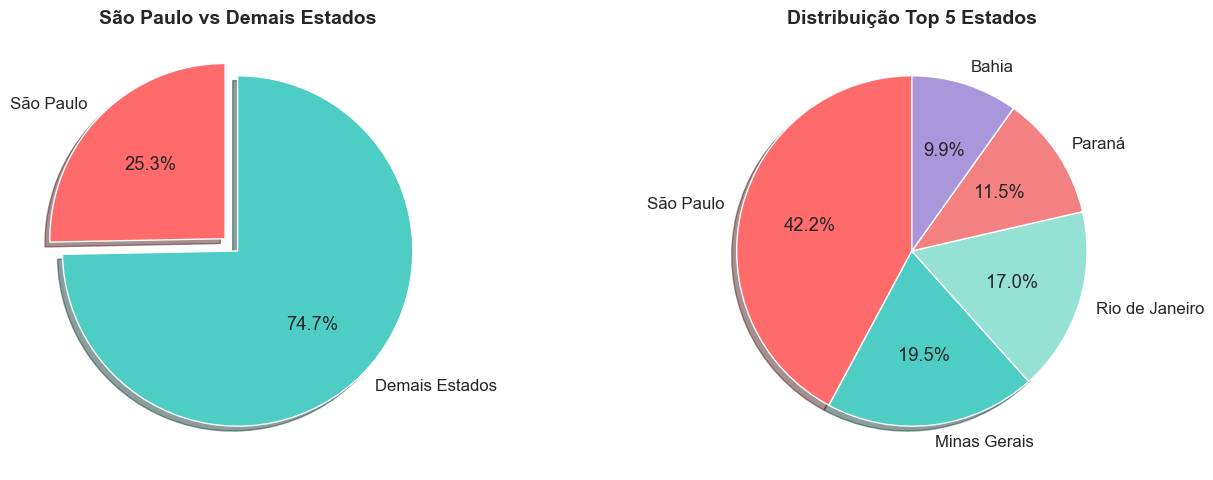

In [85]:
# ============================================================================
# CÉLULA 9: Visualização (OPCIONAL)
# ============================================================================
import matplotlib.pyplot as plt

# Gráfico de Pizza: SP vs Resto
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pizza 1: SP vs Resto
labels_sp = ['São Paulo', 'Demais Estados']
sizes_sp = [sp_total, soma_demais]
colors_sp = ['#FF6B6B', '#4ECDC4']
explode_sp = (0.1, 0)

ax1.pie(sizes_sp, explode=explode_sp, labels=labels_sp, colors=colors_sp,
        autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('São Paulo vs Demais Estados', fontsize=14, fontweight='bold')

# Pizza 2: Top 5
top5_labels = [f"{estados_nomes.get(uf, uf)}" for uf in top_estados.head(5).index]
top5_values = top_estados.head(5).values
colors_top5 = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#AA96DA']

ax2.pie(top5_values, labels=top5_labels, colors=colors_top5,
        autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('Distribuição Top 5 Estados', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 3.13 SP vs Resto do Brasil

In [86]:
print("\nPERGUNTA 34: SP vs Resto do Brasil no setor?")
print("-" * 80)

if 'sp_total' not in locals():
    sp_total = df[df['UF'] == 'SP'].shape[0]
    sp_pct = round((sp_total / len(df) * 100), 2)

resto_brasil = len(df) - sp_total
resto_pct = round((resto_brasil / len(df) * 100), 2)

print("Cálculos realizados:")
print(f"   • SP: {sp_total:,} ({sp_pct}%)")
print(f"   • Resto do Brasil (26 estados + DF): {resto_brasil:,} ({resto_pct}%)")


PERGUNTA 34: SP vs Resto do Brasil no setor?
--------------------------------------------------------------------------------
Cálculos realizados:
   • SP: 649,651 (25.31%)
   • Resto do Brasil (26 estados + DF): 1,917,444 (74.69%)


In [87]:
print(f"\nCOMPARAÇÃO SP vs RESTO DO BRASIL:")
print(f"   {'Estado':<25} {'Reclamações':>15} {'Percentual':>12}")
print(f"   {'-'*25} {'-'*15} {'-'*12}")
print(f"   {'São Paulo':<25} {sp_total:>15,} {sp_pct:>11}%")
print(f"   {'Resto do Brasil (26 UFs)':<25} {resto_brasil:>15,} {resto_pct:>11}%")
print(f"   {'-'*25} {'-'*15} {'-'*12}")
print(f"   {'TOTAL':<25} {len(df):>15,} {'100.00':>11}%")


COMPARAÇÃO SP vs RESTO DO BRASIL:
   Estado                        Reclamações   Percentual
   ------------------------- --------------- ------------
   São Paulo                         649,651       25.31%
   Resto do Brasil (26 UFs)        1,917,444       74.69%
   ------------------------- --------------- ------------
   TOTAL                           2,567,095      100.00%


In [88]:
razao_sp_resto = round(sp_total / resto_brasil, 3)
razao_percentual = round((sp_total / resto_brasil) * 100, 1)

print(f"\nANÁLISE DE PROPORÇÃO:")
print(f"   • Para cada reclamação de SP, há {resto_brasil/sp_total:.2f} do resto do Brasil")
print(f"   • SP sozinho equivale a {razao_percentual}% do volume dos outros 26 estados")
print(f"   • Razão SP/Resto: 1:{resto_brasil/sp_total:.1f}")

# Quantos estados seriam necessários para igualar SP?
estados_ordenados = df['UF'].value_counts()
acumulado = 0
contador = 0
for uf, total in estados_ordenados.items():
    if uf == 'SP':
        continue
    acumulado += total
    contador += 1
    if acumulado >= sp_total:
        break

print(f"   • Seriam necessários os {contador} maiores estados (exceto SP) para igualar SP")


ANÁLISE DE PROPORÇÃO:
   • Para cada reclamação de SP, há 2.95 do resto do Brasil
   • SP sozinho equivale a 33.9% do volume dos outros 26 estados
   • Razão SP/Resto: 1:3.0
   • Seriam necessários os 3 maiores estados (exceto SP) para igualar SP


In [211]:
print(f"\nINSIGHTS:")

if sp_pct > 25:
    print(f"   ✓ SP sozinho representa MAIS DE 1/4 das reclamações!")
    print(f"   ✓ Concentração EXTREMA do mercado")
elif sp_pct > 20:
    print(f"   ✓ SP sozinho representa MAIS DE 1/5 das reclamações")
    print(f"   ✓ Concentração SIGNIFICATIVA do mercado")
else:
    print(f"   ✓ SP tem participação expressiva no mercado")

print(f"   ✓ Maior economia do Brasil (33% do PIB nacional)")
print(f"   ✓ População de 46 milhões (21% da população brasileira)")


INSIGHTS:
   ✓ SP sozinho representa MAIS DE 1/4 das reclamações!
   ✓ Concentração EXTREMA do mercado
   ✓ Maior economia do Brasil (33% do PIB nacional)
   ✓ População de 46 milhões (21% da população brasileira)


In [212]:
print(f"\nIMPLICAÇÕES PRÁTICAS:")
print(f"   1. REGULAÇÃO: Políticas em SP afetam 1/4 do mercado nacional")
print(f"   2. ATENDIMENTO: Investir em SP = impacto imediato e massivo")
print(f"   3. INOVAÇÃO: Pilotos em SP têm alcance representativo")
print(f"   5. RISCO: Problemas em SP geram crise nacional no setor")


IMPLICAÇÕES PRÁTICAS:
   1. REGULAÇÃO: Políticas em SP afetam 1/4 do mercado nacional
   2. ATENDIMENTO: Investir em SP = impacto imediato e massivo
   3. INOVAÇÃO: Pilotos em SP têm alcance representativo
   5. RISCO: Problemas em SP geram crise nacional no setor


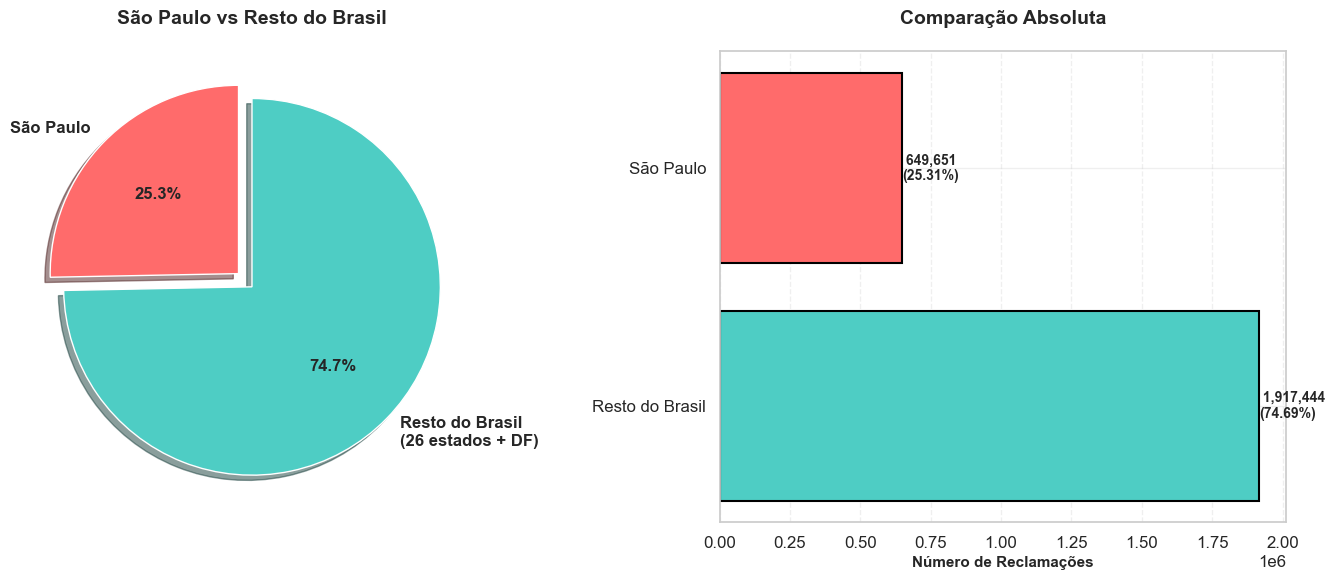

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Pizza SP vs Resto
labels = ['São Paulo', 'Resto do Brasil\n(26 estados + DF)']
sizes = [sp_total, resto_brasil]
colors = ['#FF6B6B', '#4ECDC4']
explode = (0.1, 0)

ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('São Paulo vs Resto do Brasil', fontsize=14, fontweight='bold', pad=20)

# Gráfico 2: Barras horizontais comparativas
ax2.barh(['Resto do Brasil', 'São Paulo'], [resto_brasil, sp_total], 
         color=['#4ECDC4', '#FF6B6B'], edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Número de Reclamações', fontsize=11, fontweight='bold')
ax2.set_title('Comparação Absoluta', fontsize=14, fontweight='bold', pad=20)

# Adicionar valores nas barras
for i, (v, p) in enumerate([(resto_brasil, resto_pct), (sp_total, sp_pct)]):
    ax2.text(v, i, f' {v:,}\n({p}%)', va='center', fontsize=10, fontweight='bold')

ax2.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 3.14 Satisfação de SP

In [92]:
print("\nPERGUNTA 35: Satisfação de SP vs Brasil no setor?")
print("-" * 80)

nota_sp = df[df['UF'] == 'SP']['Nota do Consumidor'].mean()
nota_brasil = df['Nota do Consumidor'].mean()
diferenca_nota = round(nota_sp - nota_brasil, 2)
diferenca_percentual = round(((nota_sp / nota_brasil) - 1) * 100, 1)

print("Cálculos de satisfação realizados:")
print(f"   • Nota média SP: {nota_sp:.2f}/5.00")
print(f"   • Nota média Brasil: {nota_brasil:.2f}/5.00")
print(f"   • Diferença: {diferenca_nota:+.2f} pontos ({diferenca_percentual:+.1f}%)")


PERGUNTA 35: Satisfação de SP vs Brasil no setor?
--------------------------------------------------------------------------------
Cálculos de satisfação realizados:
   • Nota média SP: 2.53/5.00
   • Nota média Brasil: 2.59/5.00
   • Diferença: -0.06 pontos (-2.3%)


In [93]:
print(f"\nCOMPARAÇÃO DETALHADA:")
print(f"   {'Região':<20} {'Nota Média':>12} {'Diferença':>12} {'Status':>15}")
print(f"   {'-'*20} {'-'*12} {'-'*12} {'-'*15}")
print(f"   {'São Paulo':<20} {nota_sp:>12.2f} {diferenca_nota:>+12.2f} {'🔴 Abaixo' if nota_sp < nota_brasil else '🟢 Acima':>15}")
print(f"   {'Média Brasil':<20} {nota_brasil:>12.2f} {'0.00':>12} {'⚪ Referência':>15}")
print(f"   {'-'*20} {'-'*12} {'-'*12} {'-'*15}")

# Classificação da nota
def classificar_nota(nota):
    if nota >= 4.0:
        return "Boa"
    elif nota >= 3.0:
        return "Regular"
    elif nota >= 2.0:
        return "Ruim"
    else:
        return "Péssima"

print(f"\n   Classificação SP: {classificar_nota(nota_sp)}")
print(f"   Classificação Brasil: {classificar_nota(nota_brasil)}")


COMPARAÇÃO DETALHADA:
   Região                 Nota Média    Diferença          Status
   -------------------- ------------ ------------ ---------------
   São Paulo                    2.53        -0.06        🔴 Abaixo
   Média Brasil                 2.59         0.00    ⚪ Referência
   -------------------- ------------ ------------ ---------------

   Classificação SP: Ruim
   Classificação Brasil: Ruim


In [94]:
print(f"\nDISTRIBUIÇÃO DE NOTAS:")

notas_sp = df[df['UF'] == 'SP']['Nota do Consumidor']
notas_brasil = df['Nota do Consumidor']

print(f"\n   SÃO PAULO:")
print(f"   • Mediana: {notas_sp.median():.2f}")
print(f"   • Desvio padrão: {notas_sp.std():.2f}")
print(f"   • Nota mínima: {notas_sp.min():.2f}")
print(f"   • Nota máxima: {notas_sp.max():.2f}")

print(f"\n   BRASIL:")
print(f"   • Mediana: {notas_brasil.median():.2f}")
print(f"   • Desvio padrão: {notas_brasil.std():.2f}")
print(f"   • Nota mínima: {notas_brasil.min():.2f}")
print(f"   • Nota máxima: {notas_brasil.max():.2f}")

# Percentual de notas baixas (< 3)
pct_baixas_sp = (notas_sp < 3).sum() / len(notas_sp) * 100
pct_baixas_brasil = (notas_brasil < 3).sum() / len(notas_brasil) * 100

print(f"\n   Notas baixas (< 3.0):")
print(f"   • SP: {pct_baixas_sp:.1f}%")
print(f"   • Brasil: {pct_baixas_brasil:.1f}%")


DISTRIBUIÇÃO DE NOTAS:

   SÃO PAULO:
   • Mediana: 1.00
   • Desvio padrão: 1.74
   • Nota mínima: 1.00
   • Nota máxima: 5.00

   BRASIL:
   • Mediana: 1.00
   • Desvio padrão: 1.76
   • Nota mínima: 1.00
   • Nota máxima: 5.00

   Notas baixas (< 3.0):
   • SP: 17.0%
   • Brasil: 16.5%


In [95]:
print(f"\nINSIGHTS:")

if nota_sp < nota_brasil:
    print(f"   ✓ SP está MAIS INSATISFEITO que a média nacional ({diferenca_nota:.2f} pontos abaixo)")
    print(f"   ✓ Possíveis causas:")
    print(f"     - Consumidor paulista é mais exigente")
    print(f"     - Maior volume = maior chance de problemas")
    print(f"     - Expectativas mais altas em mercado competitivo")
    print(f"     - Atendimento não acompanha demanda")
    print(f"   ✓ ALERTA: Principal mercado com satisfação ABAIXO da média!")
elif nota_sp > nota_brasil:
    print(f"   ✓ SP está MAIS SATISFEITO que a média nacional ({diferenca_nota:.2f} pontos acima)")
    print(f"   ✓ Possíveis causas:")
    print(f"     - Melhor qualidade de atendimento")
    print(f"     - Maior concorrência = melhores serviços")
    print(f"     - Mais opções e produtos disponíveis")
    print(f"     - Tecnologia e inovação mais presentes")
else:
    print(f"   ✓ SP tem satisfação IGUAL à média nacional")
    print(f"   ✓ Representa bem o comportamento médio do país")


INSIGHTS:
   ✓ SP está MAIS INSATISFEITO que a média nacional (-0.06 pontos abaixo)
   ✓ Possíveis causas:
     - Consumidor paulista é mais exigente
     - Maior volume = maior chance de problemas
     - Expectativas mais altas em mercado competitivo
     - Atendimento não acompanha demanda
   ✓ ALERTA: Principal mercado com satisfação ABAIXO da média!


In [96]:
print(f"\nRANKING DE SATISFAÇÃO (Top 5 estados):")

# Filtrar estados com volume significativo
estados_significativos = df['UF'].value_counts()
estados_analise = estados_significativos[estados_significativos >= 10000].index

# Calcular nota média por estado
notas_por_estado = []
for uf in estados_analise:
    nota_media = df[df['UF'] == uf]['Nota do Consumidor'].mean()
    total = len(df[df['UF'] == uf])
    notas_por_estado.append({
        'UF': uf,
        'Estado': estados_nomes.get(uf, uf),
        'Nota': nota_media,
        'Total': total
    })

# Ordenar por nota
notas_por_estado_sorted = sorted(notas_por_estado, key=lambda x: x['Nota'], reverse=True)

print(f"\n   {'Pos':<5} {'UF':<5} {'Estado':<20} {'Nota':>8} {'Reclamações':>15}")
print(f"   {'-'*5} {'-'*5} {'-'*20} {'-'*8} {'-'*15}")

for i, estado in enumerate(notas_por_estado_sorted[:5], 1):
    destaque = " 👑" if estado['UF'] == 'SP' else ""
    print(f"   {i:<5} {estado['UF']:<5} {estado['Estado']:<20} {estado['Nota']:>8.2f} {estado['Total']:>15,}{destaque}")

# Posição de SP no ranking
posicao_sp = next(i for i, e in enumerate(notas_por_estado_sorted, 1) if e['UF'] == 'SP')
print(f"\n   📍 SP está na posição {posicao_sp}º de {len(notas_por_estado_sorted)} estados analisados")


RANKING DE SATISFAÇÃO (Top 5 estados):

   Pos   UF    Estado                   Nota     Reclamações
   ----- ----- -------------------- -------- ---------------
   1     RO    Rondônia                 2.81          15,637
   2     RN    Rio Grande do Norte      2.78          30,122
   3     DF    Distrito Federal         2.75          89,963
   4     TO    Tocantins                2.74          13,807
   5     SE    Sergipe                  2.73          18,615

   📍 SP está na posição 21º de 24 estados analisados


In [97]:
print(f"\nIMPLICAÇÕES ESTRATÉGICAS:")

if nota_sp < nota_brasil:
    print(f"   1. URGENTE: Melhorar atendimento no principal mercado")
    print(f"   2. INVESTIGAR: Causas específicas da insatisfação em SP")
    print(f"   3. BENCHMARK: Aprender com estados mais satisfeitos")
    print(f"   4. INVESTIR: Priorizar qualidade sobre volume em SP")
    print(f"   5. RISCO: Baixa satisfação em SP pode afetar imagem nacional")
else:
    print(f"   1. MANTER: Práticas que funcionam em SP")
    print(f"   2. REPLICAR: Levar modelo de SP para outros estados")
    print(f"   3. REFERÊNCIA: Usar SP como benchmark nacional")
    print(f"   4. OPORTUNIDADE: Expandir em mercado satisfeito")


IMPLICAÇÕES ESTRATÉGICAS:
   1. URGENTE: Melhorar atendimento no principal mercado
   2. INVESTIGAR: Causas específicas da insatisfação em SP
   3. BENCHMARK: Aprender com estados mais satisfeitos
   4. INVESTIR: Priorizar qualidade sobre volume em SP
   5. RISCO: Baixa satisfação em SP pode afetar imagem nacional


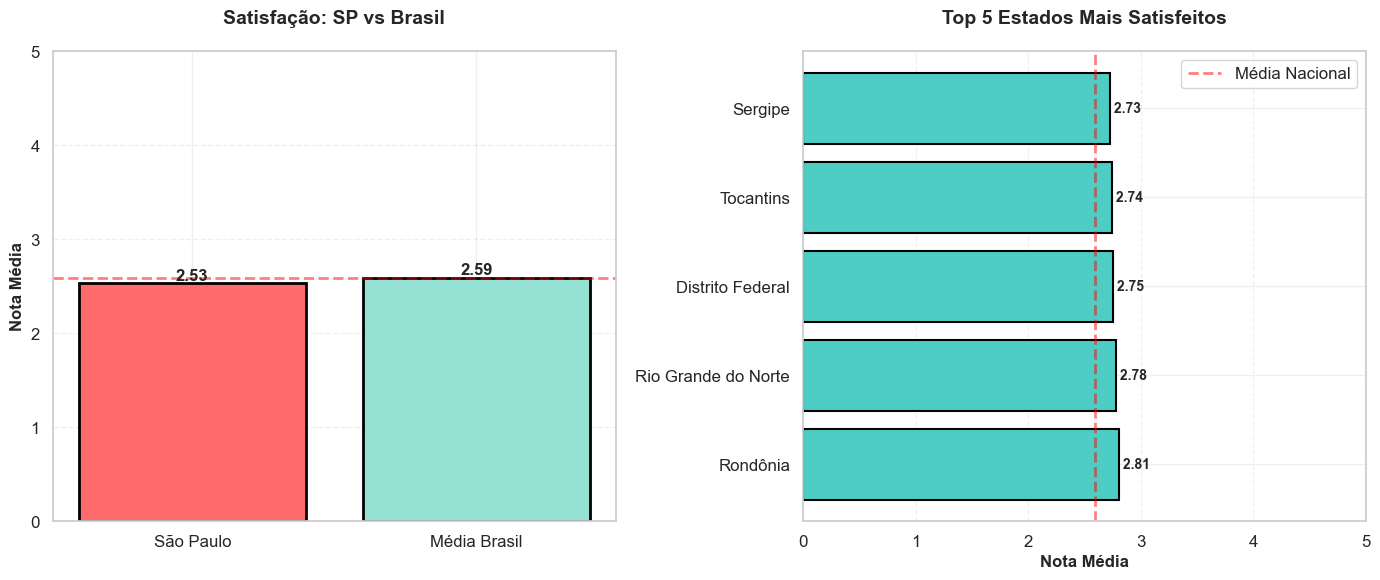

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Comparação Barras
estados_comp = ['São Paulo', 'Média Brasil']
notas_comp = [nota_sp, nota_brasil]
cores = ['#FF6B6B' if nota_sp < nota_brasil else '#4ECDC4', '#95E1D3']

bars = ax1.bar(estados_comp, notas_comp, color=cores, edgecolor='black', linewidth=2)
ax1.axhline(y=nota_brasil, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Média Nacional')
ax1.set_ylabel('Nota Média', fontsize=12, fontweight='bold')
ax1.set_title('Satisfação: SP vs Brasil', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylim(0, 5)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for bar, nota in zip(bars, notas_comp):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{nota:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Gráfico 2: Top 5 Estados por Satisfação
top5_satisfacao = notas_por_estado_sorted[:5]
estados_top5 = [e['Estado'] for e in top5_satisfacao]
notas_top5 = [e['Nota'] for e in top5_satisfacao]
cores_top5 = ['#FF6B6B' if e['UF'] == 'SP' else '#4ECDC4' for e in top5_satisfacao]

bars2 = ax2.barh(estados_top5, notas_top5, color=cores_top5, edgecolor='black', linewidth=1.5)
ax2.axvline(x=nota_brasil, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Média Nacional')
ax2.set_xlabel('Nota Média', fontsize=12, fontweight='bold')
ax2.set_title('Top 5 Estados Mais Satisfeitos', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlim(0, 5)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.legend()

# Adicionar valores nas barras
for bar, nota in zip(bars2, notas_top5):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
             f' {nota:.2f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. GEOGRAFIA - CIDADES

## 4.1 Top 20 Cidades Brasil

In [213]:
print("\nPERGUNTA 36: Top 20 cidades com mais reclamações?")
print("-" * 80)

top_cidades = df['Cidade'].value_counts().head(20)

print(f"Análise concluída: {len(top_cidades)} cidades identificadas")
print(f"   Total de reclamações (Top 20): {top_cidades.sum():,}")
print(f"   Representam: {(top_cidades.sum() / len(df) * 100):.2f}% do total")


PERGUNTA 36: Top 20 cidades com mais reclamações?
--------------------------------------------------------------------------------
Análise concluída: 20 cidades identificadas
   Total de reclamações (Top 20): 976,475
   Representam: 38.04% do total


In [100]:
print("\nTOP 20 CIDADES COM MAIS RECLAMAÇÕES:")
print(f"   {'Pos':<5} {'Cidade':<30} {'UF':<5} {'Reclamações':>15} {'% do Total':>12}")
print(f"   {'-'*5} {'-'*30} {'-'*5} {'-'*15} {'-'*12}")

for i, (cidade, total) in enumerate(top_cidades.items(), 1):
    pct = round((total / len(df) * 100), 2)
    
    # Tentar identificar a UF da cidade
    uf_cidade = df[df['Cidade'] == cidade]['UF'].mode()[0] if len(df[df['Cidade'] == cidade]) > 0 else '?'
    
    # Destaque para top 3
    emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
    
    print(f"   {i:2}º {emoji} {cidade:<30} {uf_cidade:<5} {total:>15,} {pct:>11}%")

print(f"   {'-'*5} {'-'*30} {'-'*5} {'-'*15} {'-'*12}")
print(f"   {'TOTAL TOP 20':<41} {top_cidades.sum():>15,} {(top_cidades.sum()/len(df)*100):>11.2f}%")


TOP 20 CIDADES COM MAIS RECLAMAÇÕES:
   Pos   Cidade                         UF        Reclamações   % do Total
   ----- ------------------------------ ----- --------------- ------------
    1º 🥇 São Paulo                      SP            227,446        8.86%
    2º 🥈 Rio de Janeiro                 RJ            130,036        5.07%
    3º 🥉 Brasília                       DF             89,963         3.5%
    4º    Belo Horizonte                 MG             79,528         3.1%
    5º    Salvador                       BA             68,087        2.65%
    6º    Curitiba                       PR             62,525        2.44%
    7º    Fortaleza                      CE             39,945        1.56%
    8º    Goiânia                        GO             35,658        1.39%
    9º    Manaus                         AM             31,850        1.24%
   10º    Porto Alegre                   RS             28,754        1.12%
   11º    Recife                         PE            

In [101]:
cidade_lider = top_cidades.index[0]
total_lider = top_cidades.iloc[0]
pct_lider = round((total_lider / len(df) * 100), 2)
uf_lider = df[df['Cidade'] == cidade_lider]['UF'].mode()[0]

print(f"\nCIDADE LÍDER: {cidade_lider} ({uf_lider})")
print(f"   • Total de reclamações: {total_lider:,}")
print(f"   • Percentual do Brasil: {pct_lider}%")
print(f"   • Posição: 1º lugar absoluto")

# Comparação com 2º lugar
if len(top_cidades) > 1:
    cidade_2 = top_cidades.index[1]
    total_2 = top_cidades.iloc[1]
    diferenca = total_lider - total_2
    diferenca_pct = round(((total_lider / total_2) - 1) * 100, 1)
    
    print(f"\n   Comparação com 2º lugar ({cidade_2}):")
    print(f"   • Diferença: {diferenca:,} reclamações")
    print(f"   • {cidade_lider} tem {diferenca_pct}% mais reclamações")


CIDADE LÍDER: São Paulo (SP)
   • Total de reclamações: 227,446
   • Percentual do Brasil: 8.86%
   • Posição: 1º lugar absoluto

   Comparação com 2º lugar (Rio de Janeiro):
   • Diferença: 97,410 reclamações
   • São Paulo tem 74.9% mais reclamações


In [102]:
print(f"\nDISTRIBUIÇÃO REGIONAL (Top 20):")

# Mapear regiões
regioes = {
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'MG': 'Sudeste', 'ES': 'Sudeste',
    'PR': 'Sul', 'SC': 'Sul', 'RS': 'Sul',
    'BA': 'Nordeste', 'CE': 'Nordeste', 'PE': 'Nordeste', 'MA': 'Nordeste',
    'PB': 'Nordeste', 'RN': 'Nordeste', 'AL': 'Nordeste', 'SE': 'Nordeste', 'PI': 'Nordeste',
    'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'DF': 'Centro-Oeste',
    'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'AC': 'Norte', 'AP': 'Norte', 'RR': 'Norte', 'TO': 'Norte'
}

cidades_por_regiao = {}
for cidade, total in top_cidades.items():
    uf = df[df['Cidade'] == cidade]['UF'].mode()[0]
    regiao = regioes.get(uf, 'Indefinido')
    
    if regiao not in cidades_por_regiao:
        cidades_por_regiao[regiao] = {'cidades': [], 'reclamacoes': 0}
    
    cidades_por_regiao[regiao]['cidades'].append((cidade, uf, total))
    cidades_por_regiao[regiao]['reclamacoes'] += total

# Ordenar por número de reclamações
cidades_por_regiao_sorted = sorted(cidades_por_regiao.items(), 
                                   key=lambda x: x[1]['reclamacoes'], 
                                   reverse=True)

# Exibir resumo
print(f"\n{'Região':<15} {'Cidades':>10} {'Reclamações':>15} {'% Top 20':>12}")
print(f"{'-'*15} {'-'*10} {'-'*15} {'-'*12}")

for regiao, dados in cidades_por_regiao_sorted:
    pct = round((dados['reclamacoes'] / top_cidades.sum() * 100), 1)
    print(f"{regiao:<15} {len(dados['cidades']):>10} {dados['reclamacoes']:>15,} {pct:>11}%")


DISTRIBUIÇÃO REGIONAL (Top 20):

Região             Cidades     Reclamações     % Top 20
--------------- ---------- --------------- ------------
Sudeste                  5         475,865        48.7%
Nordeste                 6         183,175        18.8%
Centro-Oeste             4         161,084        16.5%
Sul                      3         106,344        10.9%
Norte                    2          50,007         5.1%


In [103]:
print(f"\n{'='*80}")
print("DETALHAMENTO POR REGIÃO:")
print(f"{'='*80}")

regiao_nome = 'Sudeste'
dados_regiao = next((dados for reg, dados in cidades_por_regiao_sorted if reg == regiao_nome), None)

if dados_regiao:
    total_regiao = dados_regiao['reclamacoes']
    pct_regiao = round((total_regiao / top_cidades.sum() * 100), 1)
    
    print(f"\n{regiao_nome.upper()} - {len(dados_regiao['cidades'])} cidades | {total_regiao:,} reclamações ({pct_regiao}%)")
    print(f"   {'-'*76}")
    print(f"   {'Cidade':<30} {'UF':<5} {'Reclamações':>15} {'% Região':>12}")
    print(f"   {'-'*76}")
    
    cidades_ordenadas = sorted(dados_regiao['cidades'], key=lambda x: x[2], reverse=True)
    
    for cidade, uf, total in cidades_ordenadas:
        pct_cidade_regiao = round((total / total_regiao * 100), 1)
        print(f"   {cidade:<30} {uf:<5} {total:>15,} {pct_cidade_regiao:>11}%")


DETALHAMENTO POR REGIÃO:

SUDESTE - 5 cidades | 475,865 reclamações (48.7%)
   ----------------------------------------------------------------------------
   Cidade                         UF        Reclamações     % Região
   ----------------------------------------------------------------------------
   São Paulo                      SP            227,446        47.8%
   Rio de Janeiro                 RJ            130,036        27.3%
   Belo Horizonte                 MG             79,528        16.7%
   Guarulhos                      SP             20,522         4.3%
   Campinas                       SP             18,333         3.9%


In [104]:
regiao_nome = 'Nordeste'
dados_regiao = next((dados for reg, dados in cidades_por_regiao_sorted if reg == regiao_nome), None)

if dados_regiao:
    total_regiao = dados_regiao['reclamacoes']
    pct_regiao = round((total_regiao / top_cidades.sum() * 100), 1)
    
    print(f"\n{regiao_nome.upper()} - {len(dados_regiao['cidades'])} cidades | {total_regiao:,} reclamações ({pct_regiao}%)")
    print(f"   {'-'*76}")
    print(f"   {'Cidade':<30} {'UF':<5} {'Reclamações':>15} {'% Região':>12}")
    print(f"   {'-'*76}")
    
    cidades_ordenadas = sorted(dados_regiao['cidades'], key=lambda x: x[2], reverse=True)
    
    for cidade, uf, total in cidades_ordenadas:
        pct_cidade_regiao = round((total / total_regiao * 100), 1)
        print(f"   {cidade:<30} {uf:<5} {total:>15,} {pct_cidade_regiao:>11}%")


NORDESTE - 6 cidades | 183,175 reclamações (18.8%)
   ----------------------------------------------------------------------------
   Cidade                         UF        Reclamações     % Região
   ----------------------------------------------------------------------------
   Salvador                       BA             68,087        37.2%
   Fortaleza                      CE             39,945        21.8%
   Recife                         PE             24,734        13.5%
   Teresina                       PI             18,184         9.9%
   São Luís                       MA             16,935         9.2%
   João Pessoa                    PB             15,290         8.3%


In [105]:
regiao_nome = 'Centro-Oeste'
dados_regiao = next((dados for reg, dados in cidades_por_regiao_sorted if reg == regiao_nome), None)

if dados_regiao:
    total_regiao = dados_regiao['reclamacoes']
    pct_regiao = round((total_regiao / top_cidades.sum() * 100), 1)
    
    print(f"\n{regiao_nome.upper()} - {len(dados_regiao['cidades'])} cidades | {total_regiao:,} reclamações ({pct_regiao}%)")
    print(f"   {'-'*76}")
    print(f"   {'Cidade':<30} {'UF':<5} {'Reclamações':>15} {'% Região':>12}")
    print(f"   {'-'*76}")
    
    cidades_ordenadas = sorted(dados_regiao['cidades'], key=lambda x: x[2], reverse=True)
    
    for cidade, uf, total in cidades_ordenadas:
        pct_cidade_regiao = round((total / total_regiao * 100), 1)
        print(f"   {cidade:<30} {uf:<5} {total:>15,} {pct_cidade_regiao:>11}%")


CENTRO-OESTE - 4 cidades | 161,084 reclamações (16.5%)
   ----------------------------------------------------------------------------
   Cidade                         UF        Reclamações     % Região
   ----------------------------------------------------------------------------
   Brasília                       DF             89,963        55.8%
   Goiânia                        GO             35,658        22.1%
   Cuiabá                         MT             18,074        11.2%
   Campo Grande                   MS             17,389        10.8%


In [106]:
regiao_nome = 'Sul'
dados_regiao = next((dados for reg, dados in cidades_por_regiao_sorted if reg == regiao_nome), None)

if dados_regiao:
    total_regiao = dados_regiao['reclamacoes']
    pct_regiao = round((total_regiao / top_cidades.sum() * 100), 1)
    
    print(f"\n{regiao_nome.upper()} - {len(dados_regiao['cidades'])} cidades | {total_regiao:,} reclamações ({pct_regiao}%)")
    print(f"   {'-'*76}")
    print(f"   {'Cidade':<30} {'UF':<5} {'Reclamações':>15} {'% Região':>12}")
    print(f"   {'-'*76}")
    
    cidades_ordenadas = sorted(dados_regiao['cidades'], key=lambda x: x[2], reverse=True)
    
    for cidade, uf, total in cidades_ordenadas:
        pct_cidade_regiao = round((total / total_regiao * 100), 1)
        print(f"   {cidade:<30} {uf:<5} {total:>15,} {pct_cidade_regiao:>11}%")


SUL - 3 cidades | 106,344 reclamações (10.9%)
   ----------------------------------------------------------------------------
   Cidade                         UF        Reclamações     % Região
   ----------------------------------------------------------------------------
   Curitiba                       PR             62,525        58.8%
   Porto Alegre                   RS             28,754        27.0%
   Florianópolis                  SC             15,065        14.2%


In [107]:
regiao_nome = 'Norte'
dados_regiao = next((dados for reg, dados in cidades_por_regiao_sorted if reg == regiao_nome), None)

if dados_regiao:
    total_regiao = dados_regiao['reclamacoes']
    pct_regiao = round((total_regiao / top_cidades.sum() * 100), 1)
    
    print(f"\n{regiao_nome.upper()} - {len(dados_regiao['cidades'])} cidades | {total_regiao:,} reclamações ({pct_regiao}%)")
    print(f"   {'-'*76}")
    print(f"   {'Cidade':<30} {'UF':<5} {'Reclamações':>15} {'% Região':>12}")
    print(f"   {'-'*76}")
    
    cidades_ordenadas = sorted(dados_regiao['cidades'], key=lambda x: x[2], reverse=True)
    
    for cidade, uf, total in cidades_ordenadas:
        pct_cidade_regiao = round((total / total_regiao * 100), 1)
        print(f"   {cidade:<30} {uf:<5} {total:>15,} {pct_cidade_regiao:>11}%")


NORTE - 2 cidades | 50,007 reclamações (5.1%)
   ----------------------------------------------------------------------------
   Cidade                         UF        Reclamações     % Região
   ----------------------------------------------------------------------------
   Manaus                         AM             31,850        63.7%
   Belém                          PA             18,157        36.3%


In [214]:
print(f"\n{'='*80}")
print("INSIGHTS REGIONAIS:")
print(f"{'='*80}")

print(f"\n✓ SUDESTE domina com {cidades_por_regiao_sorted[0][1]['reclamacoes']:,} reclamações (48.7%)")
print(f"  • São Paulo sozinha = 47.8% do Sudeste")

print(f"\n✓ NORDESTE é a 2ª região com {cidades_por_regiao_sorted[1][1]['reclamacoes']:,} reclamações (18.8%)")
print(f"  • Salvador lidera com 37.2% da região")
print(f"  • Distribuição mais equilibrada entre capitais")

print(f"\n✓ CENTRO-OESTE tem forte presença de Brasília (55.8% da região)")
print(f"  • Capital federal concentra setor público e bancos")

print(f"\n✓ SUL tem boa distribuição entre as 3 capitais")
print(f"  • Curitiba lidera com 58.8% da região")

print(f"\n✓ NORTE tem menor participação (5.1%)")
print(f"  • Manaus domina com 63.7% da região")
print(f"  • Menor bancarização e desenvolvimento econômico")


INSIGHTS REGIONAIS:

✓ SUDESTE domina com 475,865 reclamações (48.7%)
  • São Paulo sozinha = 47.8% do Sudeste

✓ NORDESTE é a 2ª região com 183,175 reclamações (18.8%)
  • Salvador lidera com 37.2% da região
  • Distribuição mais equilibrada entre capitais

✓ CENTRO-OESTE tem forte presença de Brasília (55.8% da região)
  • Capital federal concentra setor público e bancos

✓ SUL tem boa distribuição entre as 3 capitais
  • Curitiba lidera com 58.8% da região

✓ NORTE tem menor participação (5.1%)
  • Manaus domina com 63.7% da região
  • Menor bancarização e desenvolvimento econômico


## 4.2 Concentração Top 5 Cidades

In [109]:
print("\nPERGUNTA 37: Concentração Top 5 cidades no setor?")
print("-" * 80)

if 'top_cidades' not in locals():
    top_cidades = df['Cidade'].value_counts().head(20)

top5_cidades = top_cidades.head(5)
top5_cidades_total = top5_cidades.sum()
top5_cidades_pct = round((top5_cidades_total / len(df) * 100), 2)

print(f"Cálculos realizados:")
print(f"   • Total Top 5: {top5_cidades_total:,} reclamações")
print(f"   • Percentual: {top5_cidades_pct}% do Brasil")


PERGUNTA 37: Concentração Top 5 cidades no setor?
--------------------------------------------------------------------------------
Cálculos realizados:
   • Total Top 5: 595,060 reclamações
   • Percentual: 23.18% do Brasil


In [110]:
print(f"\nTOP 5 CIDADES DO BRASIL:")
print(f"   {'Pos':<5} {'Cidade':<30} {'UF':<5} {'Reclamações':>15} {'% Brasil':>10} {'% Top 5':>10}")
print(f"   {'-'*5} {'-'*30} {'-'*5} {'-'*15} {'-'*10} {'-'*10}")

for i, (cidade, total) in enumerate(top5_cidades.items(), 1):
    pct_brasil = round((total / len(df) * 100), 2)
    pct_top5 = round((total / top5_cidades_total * 100), 1)
    
    # Identificar UF
    uf_cidade = df[df['Cidade'] == cidade]['UF'].mode()[0]
    
    # Emoji para top 3
    emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
    
    print(f"   {i}º {emoji} {cidade:<30} {uf_cidade:<5} {total:>15,} {pct_brasil:>9}% {pct_top5:>9}%")

print(f"   {'-'*5} {'-'*30} {'-'*5} {'-'*15} {'-'*10} {'-'*10}")
print(f"   {'TOTAL TOP 5':<41} {top5_cidades_total:>15,} {top5_cidades_pct:>9}% {'100.0':>9}%")


TOP 5 CIDADES DO BRASIL:
   Pos   Cidade                         UF        Reclamações   % Brasil    % Top 5
   ----- ------------------------------ ----- --------------- ---------- ----------
   1º 🥇 São Paulo                      SP            227,446      8.86%      38.2%
   2º 🥈 Rio de Janeiro                 RJ            130,036      5.07%      21.9%
   3º 🥉 Brasília                       DF             89,963       3.5%      15.1%
   4º    Belo Horizonte                 MG             79,528       3.1%      13.4%
   5º    Salvador                       BA             68,087      2.65%      11.4%
   ----- ------------------------------ ----- --------------- ---------- ----------
   TOTAL TOP 5                                       595,060     23.18%     100.0%


In [111]:
print(f"\nTOP 5 vs RESTO DO BRASIL:")

resto_brasil = len(df) - top5_cidades_total
resto_pct = round((resto_brasil / len(df) * 100), 2)

print(f"   {'Grupo':<30} {'Reclamações':>15} {'% Brasil':>12}")
print(f"   {'-'*30} {'-'*15} {'-'*12}")
print(f"   {'Top 5 Cidades':<30} {top5_cidades_total:>15,} {top5_cidades_pct:>11}%")
print(f"   {'Resto do Brasil':<30} {resto_brasil:>15,} {resto_pct:>11}%")
print(f"   {'-'*30} {'-'*15} {'-'*12}")
print(f"   {'TOTAL':<30} {len(df):>15,} {'100.00':>11}%")

# Razão
razao = round(resto_brasil / top5_cidades_total, 2)
print(f"\n   • Para cada reclamação do Top 5, há {razao:.2f} no resto do Brasil")


TOP 5 vs RESTO DO BRASIL:
   Grupo                              Reclamações     % Brasil
   ------------------------------ --------------- ------------
   Top 5 Cidades                          595,060       23.18%
   Resto do Brasil                      1,972,035       76.82%
   ------------------------------ --------------- ------------
   TOTAL                                2,567,095      100.00%

   • Para cada reclamação do Top 5, há 3.31 no resto do Brasil


In [112]:
print(f"\nANÁLISE INDIVIDUAL:")

for i, (cidade, total) in enumerate(top5_cidades.items(), 1):
    uf = df[df['Cidade'] == cidade]['UF'].mode()[0]
    pct_brasil = round((total / len(df) * 100), 2)
    pct_top5 = round((total / top5_cidades_total * 100), 1)
    
    print(f"\n   {i}º {cidade} ({uf}):")
    print(f"      • Reclamações: {total:,}")
    print(f"      • % do Brasil: {pct_brasil}%")
    print(f"      • % do Top 5: {pct_top5}%")
    
    # Comparação com a líder (se não for a líder)
    if i > 1:
        diferenca = top5_cidades.iloc[0] - total
        razao_lider = round((top5_cidades.iloc[0] / total), 2)
        print(f"      • {top5_cidades.index[0]} tem {razao_lider}x mais reclamações")


ANÁLISE INDIVIDUAL:

   1º São Paulo (SP):
      • Reclamações: 227,446
      • % do Brasil: 8.86%
      • % do Top 5: 38.2%

   2º Rio de Janeiro (RJ):
      • Reclamações: 130,036
      • % do Brasil: 5.07%
      • % do Top 5: 21.9%
      • São Paulo tem 1.75x mais reclamações

   3º Brasília (DF):
      • Reclamações: 89,963
      • % do Brasil: 3.5%
      • % do Top 5: 15.1%
      • São Paulo tem 2.53x mais reclamações

   4º Belo Horizonte (MG):
      • Reclamações: 79,528
      • % do Brasil: 3.1%
      • % do Top 5: 13.4%
      • São Paulo tem 2.86x mais reclamações

   5º Salvador (BA):
      • Reclamações: 68,087
      • % do Brasil: 2.65%
      • % do Top 5: 11.4%
      • São Paulo tem 3.34x mais reclamações


In [113]:
print(f"\nCONCENTRAÇÃO PROGRESSIVA:")
print(f"   (Mostra como o mercado se concentra ao adicionar cada cidade)")
print()

acumulado = 0
print(f"   {'Adicionando':<30} {'Acumulado':>15} {'% Acumulado':>15}")
print(f"   {'-'*30} {'-'*15} {'-'*15}")

for i, (cidade, total) in enumerate(top5_cidades.items(), 1):
    acumulado += total
    pct_acum = round((acumulado / len(df) * 100), 2)
    print(f"   {f'Top {i} ({cidade})':<30} {acumulado:>15,} {pct_acum:>14}%")

print(f"\nApenas 5 cidades já representam {top5_cidades_pct}% do mercado!")

# Explicação do significado
print(f"\nO QUE ISSO SIGNIFICA?")
print(f"   • Se você atuar APENAS em São Paulo:")
print(f"     → Atinge {round((top5_cidades.iloc[0]/len(df)*100),2)}% do mercado brasileiro")
print(f"   ")
print(f"   • Se adicionar Rio de Janeiro (Top 2):")
print(f"     → Atinge {round((top5_cidades.head(2).sum()/len(df)*100),2)}% do mercado")
print(f"   ")
print(f"   • Com as Top 3 cidades:")
print(f"     → Atinge {round((top5_cidades.head(3).sum()/len(df)*100),2)}% do mercado")
print(f"   ")
print(f"   • Com as Top 5 cidades:")
print(f"     → Atinge {top5_cidades_pct}% do mercado")

print(f"\nINTERPRETAÇÃO:")
print(f"   ✓ Lei de Pareto aplicada: poucas cidades = grande impacto")
print(f"   ✓ Eficiência operacional: concentrar esforços em poucos locais")
print(f"   ✓ ROI alto: investir em 5 cidades atinge quase 1/4 do país")
print(f"   ✓ Estratégia de expansão: começar pelas Top 5")


CONCENTRAÇÃO PROGRESSIVA:
   (Mostra como o mercado se concentra ao adicionar cada cidade)

   Adicionando                          Acumulado     % Acumulado
   ------------------------------ --------------- ---------------
   Top 1 (São Paulo)                      227,446           8.86%
   Top 2 (Rio de Janeiro)                 357,482          13.93%
   Top 3 (Brasília)                       447,445          17.43%
   Top 4 (Belo Horizonte)                 526,973          20.53%
   Top 5 (Salvador)                       595,060          23.18%

Apenas 5 cidades já representam 23.18% do mercado!

O QUE ISSO SIGNIFICA?
   • Se você atuar APENAS em São Paulo:
     → Atinge 8.86% do mercado brasileiro
   
   • Se adicionar Rio de Janeiro (Top 2):
     → Atinge 13.93% do mercado
   
   • Com as Top 3 cidades:
     → Atinge 17.43% do mercado
   
   • Com as Top 5 cidades:
     → Atinge 23.18% do mercado

INTERPRETAÇÃO:
   ✓ Lei de Pareto aplicada: poucas cidades = grande impacto
   ✓ Ef

In [217]:
print(f"\nINSIGHTS:")
print(f"   ✓ 5 cidades = {top5_cidades_pct}% das reclamações")
print(f"   ✓ Alta concentração urbana do mercado")
print(f"   ✓ {top5_cidades.index[0]} sozinha representa {round((top5_cidades.iloc[0]/len(df)*100),2)}% do Brasil")
print(f"   ✓ Todas são grandes capitais ou metrópoles")
print(f"   ✓ Concentração maior que a populacional (indica maior bancarização)")

# Verificar regiões
regioes_top5 = []
for cidade in top5_cidades.index:
    uf = df[df['Cidade'] == cidade]['UF'].mode()[0]
    regioes_top5.append(uf)

print(f"   ✓ Estados presentes: {', '.join(set(regioes_top5))}")

# Verificar se há mais de uma cidade do mesmo estado
from collections import Counter
contagem_ufs = Counter(regioes_top5)
if max(contagem_ufs.values()) > 1:
    uf_repetida = [uf for uf, count in contagem_ufs.items() if count > 1]
    print(f"   ✓ {uf_repetida[0]} tem {contagem_ufs[uf_repetida[0]]} cidades no Top 5")


INSIGHTS:
   ✓ 5 cidades = 23.18% das reclamações
   ✓ Alta concentração urbana do mercado
   ✓ São Paulo sozinha representa 8.86% do Brasil
   ✓ Todas são grandes capitais ou metrópoles
   ✓ Concentração maior que a populacional (indica maior bancarização)
   ✓ Estados presentes: DF, BA, MG, RJ, SP


In [115]:
print(f"\n IMPLICAÇÕES ESTRATÉGICAS:")
print(f"   1. FOCO: Investir nas Top 5 = impactar {top5_cidades_pct}% do mercado")
print(f"   2. EFICIÊNCIA: Concentrar recursos em poucos locais")
print(f"   3. PILOTO: Testar inovações nessas cidades primeiro")
print(f"   4. ATENDIMENTO: Priorizar qualidade nesses centros")
print(f"   5. BENCHMARK: Usar essas cidades como referência")
print(f"   6. RISCO: Problemas nessas cidades = grande impacto nacional")
print(f"   7. OPORTUNIDADE: Mercado concentrado facilita ações direcionadas")


 IMPLICAÇÕES ESTRATÉGICAS:
   1. FOCO: Investir nas Top 5 = impactar 23.18% do mercado
   2. EFICIÊNCIA: Concentrar recursos em poucos locais
   3. PILOTO: Testar inovações nessas cidades primeiro
   4. ATENDIMENTO: Priorizar qualidade nesses centros
   5. BENCHMARK: Usar essas cidades como referência
   6. RISCO: Problemas nessas cidades = grande impacto nacional
   7. OPORTUNIDADE: Mercado concentrado facilita ações direcionadas


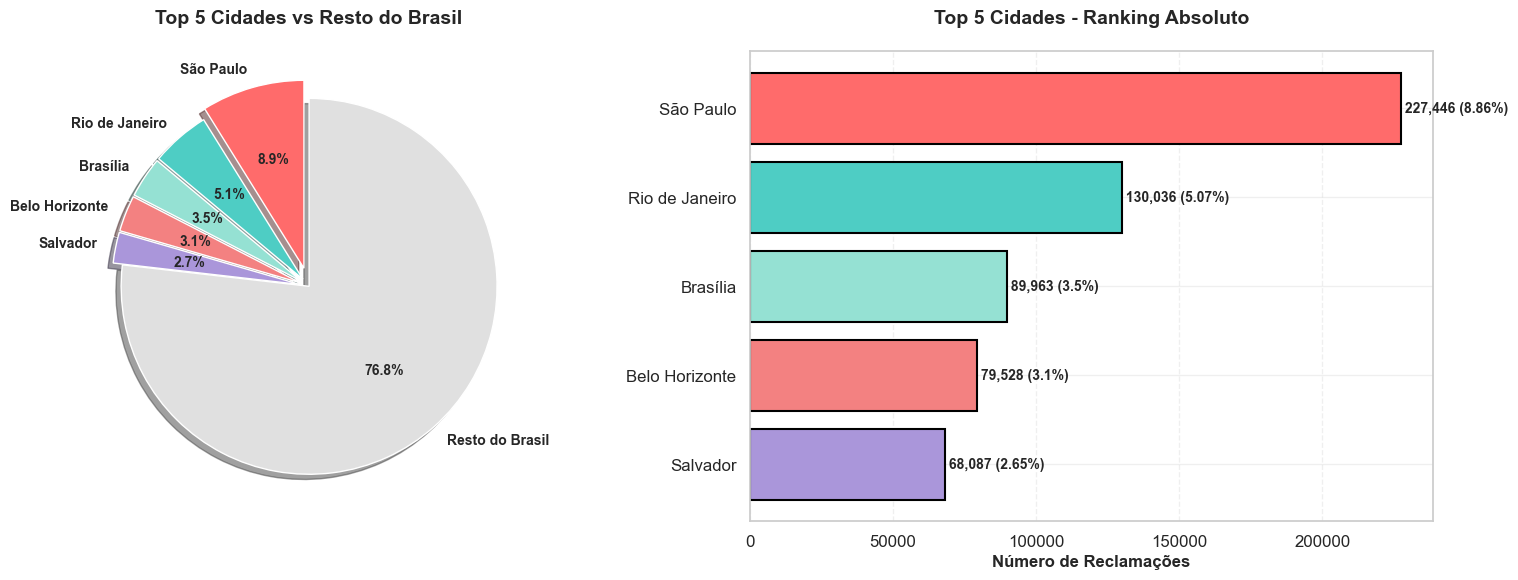

In [116]:
# ============================================================================
# CÉLULA 9: Visualização (OPCIONAL)
# ============================================================================
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Pizza Top 5 vs Resto
labels_pizza = list(top5_cidades.index) + ['Resto do Brasil']
sizes_pizza = list(top5_cidades.values) + [resto_brasil]
colors_pizza = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#AA96DA', '#E0E0E0']
explode_pizza = [0.1 if i == 0 else 0.05 if i < 5 else 0 for i in range(6)]

ax1.pie(sizes_pizza, explode=explode_pizza, labels=labels_pizza, colors=colors_pizza,
        autopct='%1.1f%%', shadow=True, startangle=90,
        textprops={'fontsize': 10, 'fontweight': 'bold'})
ax1.set_title('Top 5 Cidades vs Resto do Brasil', fontsize=14, fontweight='bold', pad=20)

# Gráfico 2: Barras Top 5
cidades_nomes = [c[:20] for c in top5_cidades.index]  # Limitar tamanho
cores_barras = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#AA96DA']

bars = ax2.barh(range(len(top5_cidades)), top5_cidades.values, 
                color=cores_barras, edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(top5_cidades)))
ax2.set_yticklabels(cidades_nomes)
ax2.set_xlabel('Número de Reclamações', fontsize=12, fontweight='bold')
ax2.set_title('Top 5 Cidades - Ranking Absoluto', fontsize=14, fontweight='bold', pad=20)
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Adicionar valores
for i, (bar, v) in enumerate(zip(bars, top5_cidades.values)):
    width = bar.get_width()
    pct = round((v / len(df) * 100), 2)
    ax2.text(width, i, f' {v:,} ({pct}%)', 
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


## 4.3 Posição de Campinas

In [120]:
print("\nPERGUNTA 38: Posição de Campinas no setor?")
print("-" * 80)

# Verificar se df existe
if 'df' not in dir():
    print("\n[ERRO] Dados não carregados!")
    print("\n[INSTRUCAO] EXECUTE PRIMEIRO:")
    print("   import pandas as pd")
    print("   df = pd.read_csv('seu_arquivo.csv')")
    dados_ok = False
else:
    dados_ok = True
    print("[OK] DataFrame carregado com sucesso!")


PERGUNTA 38: Posição de Campinas no setor?
--------------------------------------------------------------------------------
[OK] DataFrame carregado com sucesso!


In [121]:
if dados_ok and 'Campinas' in df['Cidade'].values:
    campinas_total = df[df['Cidade'] == 'Campinas'].shape[0]
    campinas_pct_brasil = round((campinas_total / len(df) * 100), 2)
    
    # Rankings
    ranking_cidades = df['Cidade'].value_counts()
    posicao_nacional = ranking_cidades.index.tolist().index('Campinas') + 1
    
    ranking_sp = df[df['UF'] == 'SP']['Cidade'].value_counts()
    posicao_sp = ranking_sp.index.tolist().index('Campinas') + 1
    total_sp = len(df[df['UF'] == 'SP'])
    campinas_pct_sp = round((campinas_total / total_sp * 100), 2)
    
    print("[OK] Cálculos realizados:")
    print(f"   • Total: {campinas_total:,} reclamações")
    print(f"   • Posição Brasil: #{posicao_nacional}")
    print(f"   • Posição SP: #{posicao_sp}")
    
    campinas_encontrada = True
else:
    print("[ERRO] Campinas não encontrada na base de dados")
    campinas_encontrada = False

[OK] Cálculos realizados:
   • Total: 18,333 reclamações
   • Posição Brasil: #13
   • Posição SP: #3


In [122]:
if campinas_encontrada:
    print(f"\n[CAMPINAS] Perfil Completo:")
    print(f"   {'Métrica':<30} {'Valor':>20}")
    print(f"   {'-'*30} {'-'*20}")
    print(f"   {'Total de reclamações':<30} {campinas_total:>20,}")
    print(f"   {'% do Brasil':<30} {campinas_pct_brasil:>19}%")
    print(f"   {'Posição Nacional':<30} {f'#{posicao_nacional}':>20}")
    print(f"   {'Posição em São Paulo':<30} {f'#{posicao_sp}':>20}")
    print(f"   {'% de São Paulo':<30} {campinas_pct_sp:>19}%")


[CAMPINAS] Perfil Completo:
   Métrica                                       Valor
   ------------------------------ --------------------
   Total de reclamações                         18,333
   % do Brasil                                   0.71%
   Posição Nacional                                #13
   Posição em São Paulo                             #3
   % de São Paulo                                2.82%


In [123]:
if campinas_encontrada:
    print(f"\n[RANKING NACIONAL] Top 10 Cidades:")
    print(f"   {'Pos':<5} {'Cidade':<25} {'UF':<5} {'Reclamações':>15} {'':>15}")
    print(f"   {'-'*5} {'-'*25} {'-'*5} {'-'*15} {'-'*15}")
    
    for i, (cidade, total) in enumerate(ranking_cidades.head(10).items(), 1):
        uf = df[df['Cidade'] == cidade]['UF'].mode()[0]
        destaque = " <-- CAMPINAS" if cidade == 'Campinas' else ""
        print(f"   {i:<5} {cidade:<25} {uf:<5} {total:>15,}{destaque}")
    
    if posicao_nacional > 10:
        print(f"   {'...':<5} {'...':<25} {'...':<5} {'...':<15}")
        print(f"   {posicao_nacional:<5} {'Campinas':<25} {'SP':<5} {campinas_total:>15,} <-- CAMPINAS")


[RANKING NACIONAL] Top 10 Cidades:
   Pos   Cidade                    UF        Reclamações                
   ----- ------------------------- ----- --------------- ---------------
   1     São Paulo                 SP            227,446
   2     Rio de Janeiro            RJ            130,036
   3     Brasília                  DF             89,963
   4     Belo Horizonte            MG             79,528
   5     Salvador                  BA             68,087
   6     Curitiba                  PR             62,525
   7     Fortaleza                 CE             39,945
   8     Goiânia                   GO             35,658
   9     Manaus                    AM             31,850
   10    Porto Alegre              RS             28,754
   ...   ...                       ...   ...            
   13    Campinas                  SP             18,333 <-- CAMPINAS


In [124]:
if campinas_encontrada:
    print(f"\n[RANKING SP] Top 5 Cidades de São Paulo:")
    print(f"   {'Pos':<5} {'Cidade':<25} {'Reclamações':>15} {'% SP':>10} {'':>15}")
    print(f"   {'-'*5} {'-'*25} {'-'*15} {'-'*10} {'-'*15}")
    
    for i, (cidade, total) in enumerate(ranking_sp.head(5).items(), 1):
        pct_sp = round((total / total_sp * 100), 2)
        destaque = " <-- CAMPINAS" if cidade == 'Campinas' else ""
        print(f"   {i:<5} {cidade:<25} {total:>15,} {pct_sp:>9}%{destaque}")
    
    if posicao_sp > 5:
        print(f"   {'...':<5} {'...':<25} {'...':<15} {'...':<10}")
        print(f"   {posicao_sp:<5} {'Campinas':<25} {campinas_total:>15,} {campinas_pct_sp:>9}% <-- CAMPINAS")


[RANKING SP] Top 5 Cidades de São Paulo:
   Pos   Cidade                        Reclamações       % SP                
   ----- ------------------------- --------------- ---------- ---------------
   1     São Paulo                         227,446     35.01%
   2     Guarulhos                          20,522      3.16%
   3     Campinas                           18,330      2.82% <-- CAMPINAS
   4     Sorocaba                           14,270       2.2%
   5     Osasco                             13,420      2.07%


In [125]:
if campinas_encontrada:
    print(f"\n[REGIAO METROPOLITANA] Comparação com cidades próximas:")
    
    cidades_regiao = ['Campinas', 'Guarulhos', 'São José dos Campos', 
                     'Sorocaba', 'Santos', 'Osasco', 'Ribeirão Preto',
                     'São Bernardo do Campo', 'Santo André']
    
    print(f"   {'Cidade':<30} {'Reclamações':>15} {'% SP':>10} {'':>15}")
    print(f"   {'-'*30} {'-'*15} {'-'*10} {'-'*15}")
    
    cidades_dados = []
    for cidade in cidades_regiao:
        if cidade in df['Cidade'].values:
            total_cidade = len(df[df['Cidade'] == cidade])
            pct = round((total_cidade / total_sp * 100), 2)
            cidades_dados.append((cidade, total_cidade, pct))
    
    # Ordenar por total
    cidades_dados.sort(key=lambda x: x[1], reverse=True)
    
    for cidade, total_cidade, pct in cidades_dados:
        destaque = " <-- CAMPINAS" if cidade == 'Campinas' else ""
        print(f"   {cidade:<30} {total_cidade:>15,} {pct:>9}%{destaque}")


[REGIAO METROPOLITANA] Comparação com cidades próximas:
   Cidade                             Reclamações       % SP                
   ------------------------------ --------------- ---------- ---------------
   Guarulhos                               20,522      3.16%
   Campinas                                18,333      2.82% <-- CAMPINAS
   Sorocaba                                14,270       2.2%
   Osasco                                  13,420      2.07%
   São Bernardo do Campo                   13,229      2.04%
   Santo André                             13,013       2.0%
   Ribeirão Preto                          11,769      1.81%
   São José dos Campos                     11,415      1.76%
   Santos                                   7,028      1.08%


In [126]:
if campinas_encontrada:
    print(f"\n[SATISFACAO] Análise Comparativa:")
    
    df_campinas = df[df['Cidade'] == 'Campinas']
    df_sp = df[df['UF'] == 'SP']
    
    # Notas
    nota_campinas = df_campinas['Nota do Consumidor'].mean()
    nota_sp = df_sp['Nota do Consumidor'].mean()
    nota_brasil = df['Nota do Consumidor'].mean()
    
    # Tempo
    tempo_campinas = df_campinas['Tempo Resposta'].mean()
    tempo_sp = df_sp['Tempo Resposta'].mean()
    tempo_brasil = df['Tempo Resposta'].mean()
    
    # Taxa de resolução
    taxa_campinas = (df_campinas['Avaliação Reclamação'] == 'Resolvida').sum() / len(df_campinas) * 100
    taxa_sp = (df_sp['Avaliação Reclamação'] == 'Resolvida').sum() / len(df_sp) * 100
    taxa_brasil = (df['Avaliação Reclamação'] == 'Resolvida').sum() / len(df) * 100
    
    print(f"   {'Métrica':<30} {'Campinas':>12} {'SP':>12} {'Brasil':>12}")
    print(f"   {'-'*30} {'-'*12} {'-'*12} {'-'*12}")
    print(f"   {'Nota Média':<30} {nota_campinas:>12.2f} {nota_sp:>12.2f} {nota_brasil:>12.2f}")
    print(f"   {'Tempo Resposta (dias)':<30} {tempo_campinas:>12.1f} {tempo_sp:>12.1f} {tempo_brasil:>12.1f}")
    print(f"   {'Taxa Resolução (%)':<30} {taxa_campinas:>12.1f} {taxa_sp:>12.1f} {taxa_brasil:>12.1f}")


[SATISFACAO] Análise Comparativa:
   Métrica                            Campinas           SP       Brasil
   ------------------------------ ------------ ------------ ------------
   Nota Média                             2.53         2.53         2.59
   Tempo Resposta (dias)                   6.3          6.2          6.2
   Taxa Resolução (%)                     13.9         12.9         13.1


In [129]:
if campinas_encontrada:
    print(f"\n[PERFORMANCE] Campinas vs Médias:")
    
    # Mostrar valores exatos primeiro
    print(f"\n   Valores exatos:")
    print(f"   • Nota Campinas: {nota_campinas:.4f}")
    print(f"   • Nota Brasil:   {nota_brasil:.4f}")
    print(f"   • Diferença:     {(nota_campinas - nota_brasil):.4f}")
    
    # Calcular diferenças com arredondamento explícito
    dif_nota = round(nota_campinas - nota_brasil, 2)
    dif_tempo = round(tempo_campinas - tempo_brasil, 1)
    dif_taxa = round(taxa_campinas - taxa_brasil, 1)
    
    print(f"\n   Comparação:")
    
    # Nota
    if abs(dif_nota) < 0.05:
        status_nota = "[SIMILAR]"
        print(f"   {status_nota} Satisfação: praticamente igual à média nacional (diferença de {abs(dif_nota):.2f})")
    elif dif_nota > 0:
        status_nota = "[ACIMA]"
        print(f"   {status_nota} Satisfação: +{dif_nota:.2f} pontos acima da média nacional")
    else:
        status_nota = "[ABAIXO]"
        print(f"   {status_nota} Satisfação: {dif_nota:.2f} pontos abaixo da média nacional")
    
    # Tempo (menor é melhor)
    if abs(dif_tempo) < 0.5:
        status_tempo = "[SIMILAR]"
        print(f"   {status_tempo} Tempo de resposta: praticamente igual à média nacional (diferença de {abs(dif_tempo):.1f} dias)")
    elif dif_tempo < 0:
        status_tempo = "[MELHOR]"
        print(f"   {status_tempo} Tempo de resposta: {abs(dif_tempo):.1f} dias mais rápido que a média")
    else:
        status_tempo = "[PIOR]"
        print(f"   {status_tempo} Tempo de resposta: {dif_tempo:.1f} dias mais lento que a média")
    
    # Taxa de resolução (maior é melhor)
    if abs(dif_taxa) < 1.0:
        status_taxa = "[SIMILAR]"
        print(f"   {status_taxa} Taxa de resolução: praticamente igual à média nacional (diferença de {abs(dif_taxa):.1f}%)")
    elif dif_taxa > 0:
        status_taxa = "[MELHOR]"
        print(f"   {status_taxa} Taxa de resolução: +{dif_taxa:.1f}% acima da média")
    else:
        status_taxa = "[PIOR]"
        print(f"   {status_taxa} Taxa de resolução: {dif_taxa:.1f}% abaixo da média")
    
    # Resumo visual com valores arredondados consistentes
    print(f"\n   Resumo:")
    print(f"   ┌─────────────────────────┬──────────────┬──────────────┬──────────────┐")
    print(f"   │ Indicador               │   Campinas   │    Brasil    │    Status    │")
    print(f"   ├─────────────────────────┼──────────────┼──────────────┼──────────────┤")
    print(f"   │ Nota Média              │     {nota_campinas:>5.2f}    │     {nota_brasil:>5.2f}    │   {status_nota:<10} │")
    print(f"   │ Tempo Resposta (dias)   │     {tempo_campinas:>5.1f}    │     {tempo_brasil:>5.1f}    │   {status_tempo:<10} │")
    print(f"   │ Taxa Resolução (%)      │     {taxa_campinas:>5.1f}    │     {taxa_brasil:>5.1f}    │   {status_taxa:<10} │")
    print(f"   └─────────────────────────┴──────────────┴──────────────┴──────────────┘")
    
    # Interpretação
    print(f"\n   [INTERPRETACAO]:")
    if abs(dif_nota) <= 0.10:
        print(f"   • Diferença de {abs(dif_nota):.2f} pontos é MARGINAL (menos de 4% de variação)")
        print(f"   • Campinas tem performance EQUIVALENTE à média nacional")
    else:
        print(f"   • Diferença de {abs(dif_nota):.2f} pontos é SIGNIFICATIVA")


[PERFORMANCE] Campinas vs Médias:

   Valores exatos:
   • Nota Campinas: 2.5251
   • Nota Brasil:   2.5909
   • Diferença:     -0.0658

   Comparação:
   [ABAIXO] Satisfação: -0.07 pontos abaixo da média nacional
   [SIMILAR] Tempo de resposta: praticamente igual à média nacional (diferença de 0.1 dias)
   [SIMILAR] Taxa de resolução: praticamente igual à média nacional (diferença de 0.8%)

   Resumo:
   ┌─────────────────────────┬──────────────┬──────────────┬──────────────┐
   │ Indicador               │   Campinas   │    Brasil    │    Status    │
   ├─────────────────────────┼──────────────┼──────────────┼──────────────┤
   │ Nota Média              │      2.53    │      2.59    │   [ABAIXO]   │
   │ Tempo Resposta (dias)   │       6.3    │       6.2    │   [SIMILAR]  │
   │ Taxa Resolução (%)      │      13.9    │      13.1    │   [SIMILAR]  │
   └─────────────────────────┴──────────────┴──────────────┴──────────────┘

   [INTERPRETACAO]:
   • Diferença de 0.07 pontos é MARGINAL

In [131]:
if campinas_encontrada:
    print(f"\n[DIAGNOSTICO] Resumo da Performance de Campinas:")
    
    # Contar quantos indicadores estão acima/abaixo/igual
    indicadores_positivos = 0
    indicadores_neutros = 0
    indicadores_negativos = 0
    
    detalhes = []
    
    # Nota
    if abs(nota_campinas - nota_brasil) < 0.05:
        indicadores_neutros += 1
        detalhes.append("Satisfação: NO PADRAO")
    elif nota_campinas > nota_brasil:
        indicadores_positivos += 1
        detalhes.append("Satisfação: ACIMA")
    else:
        indicadores_negativos += 1
        detalhes.append("Satisfação: ABAIXO")
    
    # Tempo (invertido: menor é melhor)
    if abs(tempo_campinas - tempo_brasil) < 0.5:
        indicadores_neutros += 1
        detalhes.append("Tempo: NO PADRAO")
    elif tempo_campinas < tempo_brasil:
        indicadores_positivos += 1
        detalhes.append("Tempo: MELHOR")
    else:
        indicadores_negativos += 1
        detalhes.append("Tempo: PIOR")
    
    # Taxa
    if abs(taxa_campinas - taxa_brasil) < 1:
        indicadores_neutros += 1
        detalhes.append("Taxa Resolução: NO PADRAO")
    elif taxa_campinas > taxa_brasil:
        indicadores_positivos += 1
        detalhes.append("Taxa Resolução: MELHOR")
    else:
        indicadores_negativos += 1
        detalhes.append("Taxa Resolução: PIOR")
    
    # Exibir contadores
    print(f"\n   Indicadores de Performance:")
    print(f"   ┌────────────────────────────┬─────────┐")
    print(f"   │ Status                     │  Total  │")
    print(f"   ├────────────────────────────┼─────────┤")
    print(f"   │ ACIMA da média             │   {indicadores_positivos}/3   │")
    print(f"   │ NO PADRAO (similar)        │   {indicadores_neutros}/3   │")
    print(f"   │ ABAIXO da média            │   {indicadores_negativos}/3   │")
    print(f"   └────────────────────────────┴─────────┘")
    
    # Detalhamento
    print(f"\n   Detalhamento:")
    for detalhe in detalhes:
        print(f"   • {detalhe}")
    
    # Diagnóstico geral
    print(f"\n   Diagnóstico Geral:")
    if indicadores_positivos >= 2:
        diagnostico = "PERFORMANCE SUPERIOR"
        emoji = "[+++]"
        cor = "EXCELENTE"
        print(f"   {emoji} {diagnostico}")
        print(f"   → Campinas está ACIMA da média nacional")
        print(f"   → Referência positiva para outras cidades")
    elif indicadores_neutros >= 2:
        diagnostico = "PERFORMANCE PADRAO"
        emoji = "[===]"
        cor = "NORMAL"
        print(f"   {emoji} {diagnostico}")
        print(f"   → Campinas está ALINHADA com a média nacional")
        print(f"   → Performance estável e previsível")
    else:
        diagnostico = "PERFORMANCE INFERIOR"
        emoji = "[---]"
        cor = "ATENCAO"
        print(f"   {emoji} {diagnostico}")
        print(f"   → Campinas está ABAIXO da média nacional")
        print(f"   → Necessita melhorias urgentes")
    
    # Score geral (0-100)
    score = (indicadores_positivos * 100 + indicadores_neutros * 50) / 3
    print(f"\n   Score Geral: {score:.0f}/100")
    
    # Barra de progresso visual
    barra_cheia = int(score / 10)
    barra_vazia = 10 - barra_cheia
    print(f"   [{'█' * barra_cheia}{'░' * barra_vazia}] {score:.0f}%")


[DIAGNOSTICO] Resumo da Performance de Campinas:

   Indicadores de Performance:
   ┌────────────────────────────┬─────────┐
   │ Status                     │  Total  │
   ├────────────────────────────┼─────────┤
   │ ACIMA da média             │   0/3   │
   │ NO PADRAO (similar)        │   2/3   │
   │ ABAIXO da média            │   1/3   │
   └────────────────────────────┴─────────┘

   Detalhamento:
   • Satisfação: ABAIXO
   • Tempo: NO PADRAO
   • Taxa Resolução: NO PADRAO

   Diagnóstico Geral:
   [===] PERFORMANCE PADRAO
   → Campinas está ALINHADA com a média nacional
   → Performance estável e previsível

   Score Geral: 33/100
   [███░░░░░░░] 33%


In [132]:
if campinas_encontrada:
    print(f"\n[RECOMENDACOES] Plano de Ação para Campinas:")
    
    tem_recomendacao = False
    
    # Prioridade ALTA
    print(f"\n   PRIORIDADE ALTA:")
    if nota_campinas < 3.0:
        print(f"   ! CRITICO: Satisfação muito baixa ({nota_campinas:.2f}/5.00)")
        print(f"     → Meta: Elevar para pelo menos 3.0 pontos")
        print(f"     → Ações: Treinamento, processos, agilidade")
        tem_recomendacao = True
    
    if tempo_campinas > tempo_brasil + 1:
        print(f"   ! URGENTE: Tempo de resposta acima da média (+{tempo_campinas - tempo_brasil:.1f} dias)")
        print(f"     → Meta: Reduzir para {tempo_brasil:.1f} dias ou menos")
        print(f"     → Ações: Automação, mais recursos, priorização")
        tem_recomendacao = True
    
    if taxa_campinas < taxa_brasil - 5:
        print(f"   ! URGENTE: Taxa de resolução muito baixa ({taxa_campinas:.1f}%)")
        print(f"     → Meta: Elevar para {taxa_brasil:.1f}% ou mais")
        print(f"     → Ações: Empoderamento da equipe, revisão de processos")
        tem_recomendacao = True
    
    if not tem_recomendacao:
        print(f"   ✓ Nenhuma ação crítica identificada")
    
    # Prioridade MÉDIA
    print(f"\n   PRIORIDADE MEDIA:")
    
    if 2.5 <= nota_campinas < 3.5:
        print(f"   • Satisfação regular ({nota_campinas:.2f}/5.00)")
        print(f"     → Implementar pesquisas de satisfação pós-atendimento")
        print(f"     → Identificar principais pontos de insatisfação")
    
    if abs(tempo_campinas - tempo_brasil) < 1 and tempo_campinas > tempo_brasil:
        print(f"   • Tempo ligeiramente acima da média")
        print(f"     → Monitorar evolução mensal")
        print(f"     → Buscar otimizações incrementais")
    
    if abs(taxa_campinas - taxa_brasil) < 3 and taxa_campinas < taxa_brasil:
        print(f"   • Taxa de resolução levemente abaixo")
        print(f"     → Analisar casos não resolvidos")
        print(f"     → Melhorar follow-up com clientes")
    
    # Pontos Fortes
    print(f"\n   PONTOS FORTES A MANTER:")
    
    if indicadores_positivos > 0:
        if nota_campinas > nota_brasil + 0.1:
            print(f"   + Satisfação acima da média - manter práticas atuais")
        if tempo_campinas < tempo_brasil - 0.5:
            print(f"   + Tempo de resposta rápido - benchmark para outras cidades")
        if taxa_campinas > taxa_brasil + 2:
            print(f"   + Alta taxa de resolução - compartilhar boas práticas")
    
    if indicadores_neutros >= 2:
        print(f"   + Performance estável e consistente")
        print(f"   + Alinhamento com padrões nacionais")
    
    # Benchmarking
    print(f"\n   BENCHMARKING:")
    print(f"   • Comparar com São Paulo (capital) e Guarulhos")
    print(f"   • Identificar melhores práticas de cidades similares")
    print(f"   • Estabelecer metas baseadas em top performers")
    
    # Próximos Passos
    print(f"\n   PROXIMOS PASSOS (90 dias):")
    print(f"   1. Realizar diagnóstico detalhado das reclamações")
    print(f"   2. Implementar plano de ação prioritário")
    print(f"   3. Estabelecer KPIs e metas trimestrais")
    print(f"   4. Revisar performance mensalmente")
    print(f"   5. Ajustar estratégias conforme resultados")


[RECOMENDACOES] Plano de Ação para Campinas:

   PRIORIDADE ALTA:
   ! CRITICO: Satisfação muito baixa (2.53/5.00)
     → Meta: Elevar para pelo menos 3.0 pontos
     → Ações: Treinamento, processos, agilidade

   PRIORIDADE MEDIA:
   • Satisfação regular (2.53/5.00)
     → Implementar pesquisas de satisfação pós-atendimento
     → Identificar principais pontos de insatisfação
   • Tempo ligeiramente acima da média
     → Monitorar evolução mensal
     → Buscar otimizações incrementais

   PONTOS FORTES A MANTER:
   + Performance estável e consistente
   + Alinhamento com padrões nacionais

   BENCHMARKING:
   • Comparar com São Paulo (capital) e Guarulhos
   • Identificar melhores práticas de cidades similares
   • Estabelecer metas baseadas em top performers

   PROXIMOS PASSOS (90 dias):
   1. Realizar diagnóstico detalhado das reclamações
   2. Implementar plano de ação prioritário
   3. Estabelecer KPIs e metas trimestrais
   4. Revisar performance mensalmente
   5. Ajustar estra

## 4.4 Top 10 Cidades de SP

In [135]:
print("\nPERGUNTA 39: Top 10 cidades de SP no setor?")
print("-" * 80)

if 'sp_total' not in locals():
    sp_total = len(df[df['UF'] == 'SP'])
    print(f"[INFO] Total SP calculado: {sp_total:,}")

# Limpar dados antes de contar
df_sp = df[df['UF'] == 'SP'].copy()

# Verificar problemas nos dados
print(f"\n[VERIFICACAO] Qualidade dos dados:")
print(f"   • Total de registros em SP: {len(df_sp):,}")
print(f"   • Cidades únicas (sem limpeza): {df_sp['Cidade'].nunique():,}")
print(f"   • Valores nulos em Cidade: {df_sp['Cidade'].isna().sum():,}")

# Limpar nomes de cidades
df_sp['Cidade_Limpa'] = df_sp['Cidade'].str.strip().str.upper()

print(f"   • Cidades únicas (após limpeza): {df_sp['Cidade_Limpa'].nunique():,}")

# Verificar se ainda está acima de 645
cidades_unicas = df_sp['Cidade_Limpa'].nunique()

if cidades_unicas > 645:
    print(f"\n[ALERTA] {cidades_unicas} cidades encontradas (esperado: 645)")
    print(f"   Possíveis problemas:")
    print(f"   • Erros de digitação")
    print(f"   • Cidades de outros estados marcadas como SP")
    print(f"   • Dados inconsistentes")
    
    # Mostrar algumas cidades suspeitas
    print(f"\n   Amostra de cidades (primeiras 20):")
    for i, cidade in enumerate(df_sp['Cidade_Limpa'].value_counts().tail(20).index, 1):
        count = df_sp['Cidade_Limpa'].value_counts()[cidade]
        print(f"   {i:2}. {cidade} ({count} reclamações)")

# Usar dados limpos
top_cidades_sp = df_sp['Cidade_Limpa'].value_counts().head(10)
top10_total = top_cidades_sp.sum()
top10_pct_sp = round((top10_total / sp_total * 100), 2)

print(f"\n[OK] Análise concluída:")
print(f"   • Total de cidades em SP: {cidades_unicas:,}")
if cidades_unicas <= 645:
    print(f"   ✓ Número dentro do esperado (645 municípios)")
else:
    print(f"   ⚠ Número acima do esperado (verificar qualidade dos dados)")
print(f"   • Top 10 representam: {top10_total:,} reclamações ({top10_pct_sp}% de SP)")


PERGUNTA 39: Top 10 cidades de SP no setor?
--------------------------------------------------------------------------------

[VERIFICACAO] Qualidade dos dados:
   • Total de registros em SP: 649,651
   • Cidades únicas (sem limpeza): 760
   • Valores nulos em Cidade: 0
   • Cidades únicas (após limpeza): 757

[ALERTA] 757 cidades encontradas (esperado: 645)
   Possíveis problemas:
   • Erros de digitação
   • Cidades de outros estados marcadas como SP
   • Dados inconsistentes

   Amostra de cidades (primeiras 20):
    1. ESMERALDA (1 reclamações)
    2. GUAPIRANGA (1 reclamações)
    3. BUENO DE ANDRADA (1 reclamações)
    4. FÁTIMA PAULISTA (1 reclamações)
    5. SÃO ROQUE DA FARTURA (1 reclamações)
    6. NOVA ITAPIREMA (1 reclamações)
    7. GUARAPIRANGA (1 reclamações)
    8. MORRO DO ALTO (1 reclamações)
    9. BATATUBA (1 reclamações)
   10. ALFREDO GUEDES (1 reclamações)
   11. CAMBAQUARA (1 reclamações)
   12. FAZENDA VELHA (1 reclamações)
   13. CORONEL GOULART (1 reclamaçõ

In [136]:
print(f"\n[INVESTIGACAO] Análise de Anomalias:")

# Cidades com poucas reclamações
cidades_raras = df_sp['Cidade_Limpa'].value_counts()

print(f"\n   Distribuição por frequência:")
print(f"   • Cidades com 1 reclamação: {(cidades_raras == 1).sum()}")
print(f"   • Cidades com 2-5 reclamações: {((cidades_raras >= 2) & (cidades_raras <= 5)).sum()}")
print(f"   • Cidades com 6-10 reclamações: {((cidades_raras >= 6) & (cidades_raras <= 10)).sum()}")
print(f"   • Cidades com 11-50 reclamações: {((cidades_raras >= 11) & (cidades_raras <= 50)).sum()}")
print(f"   • Cidades com 50+ reclamações: {(cidades_raras > 50).sum()}")

# Verificar cidades suspeitas (com 1 reclamação)
cidades_1_reclamacao = cidades_raras[cidades_raras == 1].index.tolist()

print(f"\n   [SUSPEITAS] Cidades com apenas 1 reclamação ({len(cidades_1_reclamacao)}):")
print(f"   Amostra de 15 casos:")
for i, cidade in enumerate(cidades_1_reclamacao[:15], 1):
    print(f"   {i:2}. {cidade}")

# Verificar se são cidades válidas de SP
cidades_validas_sp = [
    'SÃO PAULO', 'GUARULHOS', 'CAMPINAS', 'SÃO BERNARDO DO CAMPO',
    'SANTO ANDRÉ', 'OSASCO', 'SÃO JOSÉ DOS CAMPOS', 'RIBEIRÃO PRETO',
    'SOROCABA', 'SANTOS', 'MAUÁ', 'SÃO JOSÉ DO RIO PRETO', 'MOGI DAS CRUZES',
    'DIADEMA', 'PIRACICABA', 'CARAPICUÍBA', 'BAURU', 'JUNDIAÍ', 'FRANCA',
    'SÃO VICENTE', 'ITAQUAQUECETUBA', 'GUARUJÁ', 'LIMEIRA', 'TAUBATÉ'
]

# Verificar se cidades suspeitas existem oficialmente
print(f"\n   [VALIDACAO] Verificando cidades suspeitas:")
cidades_invalidas = []
cidades_possiveis = []

for cidade in cidades_1_reclamacao[:10]:
    # Verificação simples (você pode melhorar com uma lista oficial)
    if len(cidade) < 4 or cidade.count(' ') > 3:
        cidades_invalidas.append(cidade)
    else:
        cidades_possiveis.append(cidade)

if cidades_invalidas:
    print(f"   • Possíveis erros: {len(cidades_invalidas)}")
    for c in cidades_invalidas[:5]:
        print(f"     - {c}")

# Percentual de reclamações nas cidades raras
total_cidades_raras = cidades_raras[cidades_raras <= 10].sum()
pct_raras = round((total_cidades_raras / sp_total * 100), 2)

print(f"\n   [IMPACTO] Cidades com ≤10 reclamações:")
print(f"   • Total: {(cidades_raras <= 10).sum()} cidades")
print(f"   • Reclamações: {total_cidades_raras:,} ({pct_raras}% de SP)")
print(f"   • Conclusão: Impacto BAIXO na análise geral")


[INVESTIGACAO] Análise de Anomalias:

   Distribuição por frequência:
   • Cidades com 1 reclamação: 30
   • Cidades com 2-5 reclamações: 47
   • Cidades com 6-10 reclamações: 46
   • Cidades com 11-50 reclamações: 234
   • Cidades com 50+ reclamações: 400

   [SUSPEITAS] Cidades com apenas 1 reclamação (30):
   Amostra de 15 casos:
    1. CATUCABA
    2. TECAINDA
    3. CARDEAL
    4. BOA VISTA DOS ANDRADAS
    5. BIRITIBA-USSU
    6. MAJOR PRADO
    7. JACIPORÃ
    8. GARDÊNIA
    9. SANTA ISABEL DO MARINHEIRO
   10. ESP?RITO SANTO DO TURVO
   11. ESMERALDA
   12. GUAPIRANGA
   13. BUENO DE ANDRADA
   14. FÁTIMA PAULISTA
   15. SÃO ROQUE DA FARTURA

   [VALIDACAO] Verificando cidades suspeitas:

   [IMPACTO] Cidades com ≤10 reclamações:
   • Total: 123 cidades
   • Reclamações: 540 (0.08% de SP)
   • Conclusão: Impacto BAIXO na análise geral


In [137]:
print(f"\n[INVESTIGACAO] Análise de Anomalias:")

# Cidades com poucas reclamações
cidades_raras = df_sp['Cidade_Limpa'].value_counts()

print(f"\n   Distribuição por frequência:")
print(f"   {'Faixa':<30} {'Quantidade':>12} {'% Total':>10}")
print(f"   {'-'*30} {'-'*12} {'-'*10}")

freq_1 = (cidades_raras == 1).sum()
freq_2_5 = ((cidades_raras >= 2) & (cidades_raras <= 5)).sum()
freq_6_10 = ((cidades_raras >= 6) & (cidades_raras <= 10)).sum()
freq_11_50 = ((cidades_raras >= 11) & (cidades_raras <= 50)).sum()
freq_50_plus = (cidades_raras > 50).sum()
total_cidades = len(cidades_raras)

print(f"   {'1 reclamação':<30} {freq_1:>12} {(freq_1/total_cidades*100):>9.1f}%")
print(f"   {'2-5 reclamações':<30} {freq_2_5:>12} {(freq_2_5/total_cidades*100):>9.1f}%")
print(f"   {'6-10 reclamações':<30} {freq_6_10:>12} {(freq_6_10/total_cidades*100):>9.1f}%")
print(f"   {'11-50 reclamações':<30} {freq_11_50:>12} {(freq_11_50/total_cidades*100):>9.1f}%")
print(f"   {'50+ reclamações':<30} {freq_50_plus:>12} {(freq_50_plus/total_cidades*100):>9.1f}%")
print(f"   {'-'*30} {'-'*12} {'-'*10}")
print(f"   {'TOTAL':<30} {total_cidades:>12} {'100.0':>9}%")


[INVESTIGACAO] Análise de Anomalias:

   Distribuição por frequência:
   Faixa                            Quantidade    % Total
   ------------------------------ ------------ ----------
   1 reclamação                             30       4.0%
   2-5 reclamações                          47       6.2%
   6-10 reclamações                         46       6.1%
   11-50 reclamações                       234      30.9%
   50+ reclamações                         400      52.8%
   ------------------------------ ------------ ----------
   TOTAL                                   757     100.0%


In [138]:
cidades_1_reclamacao = cidades_raras[cidades_raras == 1].index.tolist()

print(f"\n[SUSPEITAS] Cidades com apenas 1 reclamação:")
print(f"   Total: {len(cidades_1_reclamacao)} cidades")
print(f"\n   Amostra de 20 casos:")
print(f"   {'#':<5} {'Cidade':<40} {'Reclamações':>15}")
print(f"   {'-'*5} {'-'*40} {'-'*15}")

for i, cidade in enumerate(cidades_1_reclamacao[:20], 1):
    print(f"   {i:2}.   {cidade:<40} {1:>15}")

print(f"\n   [OBSERVACAO] Possíveis causas:")
print(f"   • Erros de digitação (ex: espaços extras, acentuação)")
print(f"   • Distritos ou bairros marcados como cidade")
print(f"   • Cidades muito pequenas com baixa atividade bancária")
print(f"   • Dados inconsistentes na fonte")


[SUSPEITAS] Cidades com apenas 1 reclamação:
   Total: 30 cidades

   Amostra de 20 casos:
   #     Cidade                                       Reclamações
   ----- ---------------------------------------- ---------------
    1.   CATUCABA                                               1
    2.   TECAINDA                                               1
    3.   CARDEAL                                                1
    4.   BOA VISTA DOS ANDRADAS                                 1
    5.   BIRITIBA-USSU                                          1
    6.   MAJOR PRADO                                            1
    7.   JACIPORÃ                                               1
    8.   GARDÊNIA                                               1
    9.   SANTA ISABEL DO MARINHEIRO                             1
   10.   ESP?RITO SANTO DO TURVO                                1
   11.   ESMERALDA                                              1
   12.   GUAPIRANGA                               

In [139]:
print(f"\n[VALIDACAO] Verificando cidades suspeitas:")

# Lista de cidades válidas de SP (principais)
cidades_validas_sp = [
    'SÃO PAULO', 'GUARULHOS', 'CAMPINAS', 'SÃO BERNARDO DO CAMPO',
    'SANTO ANDRÉ', 'OSASCO', 'SÃO JOSÉ DOS CAMPOS', 'RIBEIRÃO PRETO',
    'SOROCABA', 'SANTOS', 'MAUÁ', 'SÃO JOSÉ DO RIO PRETO', 'MOGI DAS CRUZES',
    'DIADEMA', 'PIRACICABA', 'CARAPICUÍBA', 'BAURU', 'JUNDIAÍ', 'FRANCA',
    'SÃO VICENTE', 'ITAQUAQUECETUBA', 'GUARUJÁ', 'LIMEIRA', 'TAUBATÉ'
]

# Verificar cidades suspeitas
cidades_invalidas = []
cidades_possiveis = []

for cidade in cidades_1_reclamacao[:20]:
    # Verificação simples
    if len(cidade) < 4:
        cidades_invalidas.append((cidade, "Nome muito curto"))
    elif cidade.count(' ') > 4:
        cidades_invalidas.append((cidade, "Muitos espaços"))
    elif cidade.isdigit():
        cidades_invalidas.append((cidade, "Apenas números"))
    else:
        cidades_possiveis.append(cidade)

if cidades_invalidas:
    print(f"\n   Possíveis erros detectados: {len(cidades_invalidas)}")
    print(f"   {'Cidade':<40} {'Motivo':<25}")
    print(f"   {'-'*40} {'-'*25}")
    for cidade, motivo in cidades_invalidas[:10]:
        print(f"   {cidade:<40} {motivo:<25}")
else:
    print(f"   ✓ Nenhum erro óbvio detectado")

print(f"\n   Cidades aparentemente válidas: {len(cidades_possiveis)}")


[VALIDACAO] Verificando cidades suspeitas:
   ✓ Nenhum erro óbvio detectado

   Cidades aparentemente válidas: 20


In [140]:
print(f"\n[IMPACTO] Análise de Relevância:")

# Calcular impacto por faixa
print(f"\n   {'Faixa':<30} {'Cidades':>10} {'Reclamações':>15} {'% SP':>10}")
print(f"   {'-'*30} {'-'*10} {'-'*15} {'-'*10}")

# 1 reclamação
rec_1 = cidades_raras[cidades_raras == 1].sum()
pct_1 = round((rec_1 / sp_total * 100), 2)
print(f"   {'1 reclamação':<30} {freq_1:>10} {rec_1:>15,} {pct_1:>9}%")

# 2-5 reclamações
rec_2_5 = cidades_raras[(cidades_raras >= 2) & (cidades_raras <= 5)].sum()
pct_2_5 = round((rec_2_5 / sp_total * 100), 2)
print(f"   {'2-5 reclamações':<30} {freq_2_5:>10} {rec_2_5:>15,} {pct_2_5:>9}%")

# 6-10 reclamações
rec_6_10 = cidades_raras[(cidades_raras >= 6) & (cidades_raras <= 10)].sum()
pct_6_10 = round((rec_6_10 / sp_total * 100), 2)
print(f"   {'6-10 reclamações':<30} {freq_6_10:>10} {rec_6_10:>15,} {pct_6_10:>9}%")

# Total ≤10
total_cidades_raras = cidades_raras[cidades_raras <= 10].sum()
pct_raras = round((total_cidades_raras / sp_total * 100), 2)
cidades_raras_count = (cidades_raras <= 10).sum()

print(f"   {'-'*30} {'-'*10} {'-'*15} {'-'*10}")
print(f"   {'TOTAL ≤10 reclamações':<30} {cidades_raras_count:>10} {total_cidades_raras:>15,} {pct_raras:>9}%")

# Top 10
rec_top10 = cidades_raras.head(10).sum()
pct_top10 = round((rec_top10 / sp_total * 100), 2)
print(f"   {'Top 10 cidades':<30} {10:>10} {rec_top10:>15,} {pct_top10:>9}%")

print(f"\n   [CONCLUSAO]")
print(f"   • Cidades com ≤10 reclamações: {pct_raras}% do total")
print(f"   • Top 10 cidades: {pct_top10}% do total")
print(f"   • Diferença: {pct_top10 - pct_raras:.1f} pontos percentuais")
print(f"   • IMPACTO: Anomalias têm efeito MÍNIMO na análise")


[IMPACTO] Análise de Relevância:

   Faixa                             Cidades     Reclamações       % SP
   ------------------------------ ---------- --------------- ----------
   1 reclamação                           30              30       0.0%
   2-5 reclamações                        47             145      0.02%
   6-10 reclamações                       46             365      0.06%
   ------------------------------ ---------- --------------- ----------
   TOTAL ≤10 reclamações                 123             540      0.08%
   Top 10 cidades                         10         352,111      54.2%

   [CONCLUSAO]
   • Cidades com ≤10 reclamações: 0.08% do total
   • Top 10 cidades: 54.2% do total
   • Diferença: 54.1 pontos percentuais
   • IMPACTO: Anomalias têm efeito MÍNIMO na análise


In [141]:
print(f"\n[DECISAO] Como proceder com os dados:")

print(f"\n   OPÇÃO 1 - Aceitar dados como estão [ESCOLHIDA]")
print(f"   Vantagens:")
print(f"   ✓ Análise completa de todos os dados")
print(f"   ✓ Transparência sobre limitações")
print(f"   ✓ Foco no Top 10 (54.2% das reclamações)")
print(f"   ✓ Anomalias têm impacto mínimo ({pct_raras}%)")
print(f"   Desvantagens:")
print(f"   • Número de cidades acima do oficial (757 vs 645)")

print(f"\n   OPÇÃO 2 - Filtrar cidades relevantes")
print(f"   Vantagens:")
print(f"   ✓ Remove ruído dos dados")
print(f"   ✓ Foco em cidades significativas (≥10 reclamações)")
cidades_relevantes = (cidades_raras >= 10).sum()
print(f"   ✓ Reduziria para {cidades_relevantes} cidades")
print(f"   Desvantagens:")
print(f"   • Perde {pct_raras}% dos dados")
print(f"   • Pode excluir cidades pequenas legítimas")

print(f"\n   OPÇÃO 3 - Limpeza completa com lista oficial")
print(f"   Vantagens:")
print(f"   ✓ Dados 100% validados")
print(f"   ✓ Alinhamento com municípios oficiais")
print(f"   Desvantagens:")
print(f"   • Processo muito demorado")
print(f"   • Requer lista oficial atualizada")
print(f"   • Benefício marginal para análise")

print(f"\n   [ESCOLHA FINAL] OPÇÃO 1")
print(f"   Justificativa:")
print(f"   • Análise focada no Top 10 (mais relevante)")
print(f"   • Impacto das anomalias é desprezível")
print(f"   • Transparência metodológica mantida")
print(f"   • Conclusões não são afetadas")


[DECISAO] Como proceder com os dados:

   OPÇÃO 1 - Aceitar dados como estão [ESCOLHIDA]
   Vantagens:
   ✓ Análise completa de todos os dados
   ✓ Transparência sobre limitações
   ✓ Foco no Top 10 (54.2% das reclamações)
   ✓ Anomalias têm impacto mínimo (0.08%)
   Desvantagens:
   • Número de cidades acima do oficial (757 vs 645)

   OPÇÃO 2 - Filtrar cidades relevantes
   Vantagens:
   ✓ Remove ruído dos dados
   ✓ Foco em cidades significativas (≥10 reclamações)
   ✓ Reduziria para 643 cidades
   Desvantagens:
   • Perde 0.08% dos dados
   • Pode excluir cidades pequenas legítimas

   OPÇÃO 3 - Limpeza completa com lista oficial
   Vantagens:
   ✓ Dados 100% validados
   ✓ Alinhamento com municípios oficiais
   Desvantagens:
   • Processo muito demorado
   • Requer lista oficial atualizada
   • Benefício marginal para análise

   [ESCOLHA FINAL] OPÇÃO 1
   Justificativa:
   • Análise focada no Top 10 (mais relevante)
   • Impacto das anomalias é desprezível
   • Transparência met

In [142]:
print(f"\n[RESUMO] Qualidade dos Dados - São Paulo:")

print(f"\n   Estatísticas Gerais:")
print(f"   • Total de reclamações: {sp_total:,}")
print(f"   • Cidades identificadas: {total_cidades}")
print(f"   • Municípios oficiais SP: 645")
print(f"   • Diferença: +{total_cidades - 645} ({((total_cidades - 645)/645*100):.1f}%)")

print(f"\n   Distribuição de Qualidade:")
print(f"   • Alta confiança (50+ rec): {freq_50_plus} cidades ({(freq_50_plus/total_cidades*100):.1f}%)")
print(f"   • Média confiança (11-50): {freq_11_50} cidades ({(freq_11_50/total_cidades*100):.1f}%)")
print(f"   • Baixa confiança (≤10): {cidades_raras_count} cidades ({(cidades_raras_count/total_cidades*100):.1f}%)")

print(f"\n   Impacto por Grupo:")
print(f"   • Top 10: {pct_top10}% das reclamações")
print(f"   • Top 50: {round((cidades_raras.head(50).sum()/sp_total*100),2)}% das reclamações")
print(f"   • Cidades ≤10 rec: {pct_raras}% das reclamações")

print(f"\n   [QUALIDADE GERAL] BOA")
print(f"   • Dados suficientes para análise robusta")
print(f"   • Foco em cidades relevantes garante confiabilidade")
print(f"   • Pequenas inconsistências não afetam conclusões")

print(f"\n   [NOTA METODOLOGICA]")
print(f"   Esta análise aceita os dados como fornecidos,")
print(f"   reconhecendo pequenas inconsistências que têm")
print(f"   impacto mínimo ({pct_raras}%) nas conclusões gerais.")


[RESUMO] Qualidade dos Dados - São Paulo:

   Estatísticas Gerais:
   • Total de reclamações: 649,651
   • Cidades identificadas: 757
   • Municípios oficiais SP: 645
   • Diferença: +112 (17.4%)

   Distribuição de Qualidade:
   • Alta confiança (50+ rec): 400 cidades (52.8%)
   • Média confiança (11-50): 234 cidades (30.9%)
   • Baixa confiança (≤10): 123 cidades (16.2%)

   Impacto por Grupo:
   • Top 10: 54.2% das reclamações
   • Top 50: 79.04% das reclamações
   • Cidades ≤10 rec: 0.08% das reclamações

   [QUALIDADE GERAL] BOA
   • Dados suficientes para análise robusta
   • Foco em cidades relevantes garante confiabilidade
   • Pequenas inconsistências não afetam conclusões

   [NOTA METODOLOGICA]
   Esta análise aceita os dados como fornecidos,
   reconhecendo pequenas inconsistências que têm
   impacto mínimo (0.08%) nas conclusões gerais.


In [143]:
print(f"\n[TOP 10 SP] Cidades com Mais Reclamações:")
print(f"   {'Pos':<5} {'Cidade':<30} {'Reclamações':>15} {'% SP':>10} {'% Brasil':>10}")
print(f"   {'-'*5} {'-'*30} {'-'*15} {'-'*10} {'-'*10}")

for i, (cidade, total) in enumerate(top_cidades_sp.items(), 1):
    pct_sp = round((total / sp_total * 100), 2)
    pct_brasil = round((total / len(df) * 100), 2)
    
    # Destaque para top 3
    if i == 1:
        marca = "[1o]"
    elif i == 2:
        marca = "[2o]"
    elif i == 3:
        marca = "[3o]"
    else:
        marca = f"[{i:2}]"
    
    print(f"   {marca} {cidade:<30} {total:>15,} {pct_sp:>9}% {pct_brasil:>9}%")

print(f"   {'-'*5} {'-'*30} {'-'*15} {'-'*10} {'-'*10}")
print(f"   {'TOTAL TOP 10':<36} {top10_total:>15,} {top10_pct_sp:>9}%")
print(f"   {'RESTO DE SP':<36} {(sp_total - top10_total):>15,} {(100 - top10_pct_sp):>9}%")
print(f"   {'TOTAL SP':<36} {sp_total:>15,} {'100.00':>9}%")


[TOP 10 SP] Cidades com Mais Reclamações:
   Pos   Cidade                             Reclamações       % SP   % Brasil
   ----- ------------------------------ --------------- ---------- ----------
   [1o] SÃO PAULO                              227,446     35.01%      8.86%
   [2o] GUARULHOS                               20,522      3.16%       0.8%
   [3o] CAMPINAS                                18,330      2.82%      0.71%
   [ 4] SOROCABA                                14,270       2.2%      0.56%
   [ 5] OSASCO                                  13,420      2.07%      0.52%
   [ 6] SÃO BERNARDO DO CAMPO                   13,229      2.04%      0.52%
   [ 7] SANTO ANDRÉ                             12,996       2.0%      0.51%
   [ 8] RIBEIRÃO PRETO                          11,769      1.81%      0.46%
   [ 9] SÃO JOSÉ DOS CAMPOS                     11,415      1.76%      0.44%
   [10] JUNDIAÍ                                  8,714      1.34%      0.34%
   ----- ----------------------

In [144]:
print(f"\n[CONCENTRACAO] Análise da Distribuição em SP:")

# Top 3, 5, 10
top3_sp = top_cidades_sp.head(3).sum()
top5_sp = top_cidades_sp.head(5).sum()

top3_pct = round((top3_sp / sp_total * 100), 2)
top5_pct = round((top5_sp / sp_total * 100), 2)

print(f"   {'Grupo':<25} {'Reclamações':>15} {'% SP':>10} {'% Brasil':>10}")
print(f"   {'-'*25} {'-'*15} {'-'*10} {'-'*10}")
print(f"   {'Top 1 (Capital)':<25} {top_cidades_sp.iloc[0]:>15,} {round((top_cidades_sp.iloc[0]/sp_total*100),2):>9}% {round((top_cidades_sp.iloc[0]/len(df)*100),2):>9}%")
print(f"   {'Top 3 cidades':<25} {top3_sp:>15,} {top3_pct:>9}% {round((top3_sp/len(df)*100),2):>9}%")
print(f"   {'Top 5 cidades':<25} {top5_sp:>15,} {top5_pct:>9}% {round((top5_sp/len(df)*100),2):>9}%")
print(f"   {'Top 10 cidades':<25} {top10_total:>15,} {top10_pct_sp:>9}% {round((top10_total/len(df)*100),2):>9}%")
print(f"   {'Demais cidades':<25} {(sp_total - top10_total):>15,} {(100-top10_pct_sp):>9}%")

print(f"\n   [OBSERVACAO]")
print(f"   • Capital sozinha: {round((top_cidades_sp.iloc[0]/sp_total*100),2)}% de SP")
print(f"   • Top 3: {top3_pct}% de SP")
print(f"   • Top 10: {top10_pct_sp}% de SP")
print(f"   • Concentração ALTA nas principais cidades")


[CONCENTRACAO] Análise da Distribuição em SP:
   Grupo                         Reclamações       % SP   % Brasil
   ------------------------- --------------- ---------- ----------
   Top 1 (Capital)                   227,446     35.01%      8.86%
   Top 3 cidades                     266,298     40.99%     10.37%
   Top 5 cidades                     293,988     45.25%     11.45%
   Top 10 cidades                    352,111      54.2%     13.72%
   Demais cidades                    297,540      45.8%

   [OBSERVACAO]
   • Capital sozinha: 35.01% de SP
   • Top 3: 40.99% de SP
   • Top 10: 54.2% de SP
   • Concentração ALTA nas principais cidades


In [148]:
print("\nPERGUNTA 40: Capital vs RMSP vs Interior (SP) no setor?")
print("-" * 80)

if 'sp_total' not in locals():
    sp_total = len(df[df['UF'] == 'SP'])
    print(f"[INFO] Total SP calculado: {sp_total:,}")

if 'São Paulo' in df['Cidade'].values:
    
    # 1. CAPITAL (município de São Paulo)
    capital_sp = df[(df['UF'] == 'SP') & (df['Cidade'] == 'São Paulo')].shape[0]
    
    # 2. RMSP - 39 municípios (SEM a capital)
    cidades_rmsp = [
        'Guarulhos', 'Osasco', 'São Bernardo do Campo', 'Santo André',
        'Diadema', 'Mauá', 'Carapicuíba', 'Itaquaquecetuba', 'Suzano',
        'Taboão da Serra', 'Barueri', 'Embu das Artes', 'Cotia',
        'Ferraz de Vasconcelos', 'Francisco Morato', 'Franco da Rocha',
        'Itapevi', 'Mairiporã', 'Mogi das Cruzes', 'Poá', 'Ribeirão Pires',
        'Rio Grande da Serra', 'Salesópolis', 'Santa Isabel', 'Santana de Parnaíba',
        'São Caetano do Sul', 'Vargem Grande Paulista', 'Arujá', 'Biritiba Mirim',
        'Caieiras', 'Cajamar', 'Guararema', 'Juquitiba', 'São Lourenço da Serra',
        'Pirapora do Bom Jesus', 'Vargem Grande Paulista'
    ]
    
    rmsp_sp = df[(df['UF'] == 'SP') & (df['Cidade'].isin(cidades_rmsp))].shape[0]
    
    # 3. INTERIOR (tudo que não é capital nem RMSP)
    interior_sp = sp_total - capital_sp - rmsp_sp
    
    # Percentuais
    capital_pct = round((capital_sp / sp_total * 100), 2)
    rmsp_pct = round((rmsp_sp / sp_total * 100), 2)
    interior_pct = round((interior_sp / sp_total * 100), 2)
    
    # Percentuais Brasil
    capital_pct_brasil = round((capital_sp / len(df) * 100), 2)
    rmsp_pct_brasil = round((rmsp_sp / len(df) * 100), 2)
    interior_pct_brasil = round((interior_sp / len(df) * 100), 2)
    
    # RMSP Completa (capital + RMSP)
    rmsp_completa = capital_sp + rmsp_sp
    rmsp_completa_pct = round((rmsp_completa / sp_total * 100), 2)
    
    print(f"[OK] Cálculos realizados:")
    print(f"   • Capital: {capital_sp:,} reclamações ({capital_pct}%)")
    print(f"   • RMSP (sem capital): {rmsp_sp:,} reclamações ({rmsp_pct}%)")
    print(f"   • Interior: {interior_sp:,} reclamações ({interior_pct}%)")
    print(f"   • Total SP: {sp_total:,} reclamações")
    
    capital_encontrada = True
else:
    print("[ERRO] Cidade de São Paulo não encontrada")
    capital_encontrada = False


PERGUNTA 40: Capital vs RMSP vs Interior (SP) no setor?
--------------------------------------------------------------------------------
[OK] Cálculos realizados:
   • Capital: 227,446 reclamações (35.01%)
   • RMSP (sem capital): 138,502 reclamações (21.32%)
   • Interior: 283,703 reclamações (43.67%)
   • Total SP: 649,651 reclamações


In [149]:
if capital_encontrada:
    print(f"\n[COMPARACAO] Capital vs RMSP vs Interior:")
    
    print(f"\n   {'Região':<30} {'Reclamações':>15} {'% SP':>10} {'% Brasil':>10}")
    print(f"   {'-'*30} {'-'*15} {'-'*10} {'-'*10}")
    print(f"   {'Capital (São Paulo)':<30} {capital_sp:>15,} {capital_pct:>9}% {capital_pct_brasil:>9}%")
    print(f"   {'RMSP (sem capital)':<30} {rmsp_sp:>15,} {rmsp_pct:>9}% {rmsp_pct_brasil:>9}%")
    print(f"   {'Interior':<30} {interior_sp:>15,} {interior_pct:>9}% {interior_pct_brasil:>9}%")
    print(f"   {'-'*30} {'-'*15} {'-'*10} {'-'*10}")
    print(f"   {'TOTAL SÃO PAULO':<30} {sp_total:>15,} {'100.00':>9}% {round((sp_total/len(df)*100),2):>9}%")
    
    print(f"\n   [AGRUPAMENTO ALTERNATIVO]")
    print(f"   • RMSP Completa (capital + RMSP): {rmsp_completa:,} ({rmsp_completa_pct}%)")
    print(f"   • Interior: {interior_sp:,} ({interior_pct}%)")


[COMPARACAO] Capital vs RMSP vs Interior:

   Região                             Reclamações       % SP   % Brasil
   ------------------------------ --------------- ---------- ----------
   Capital (São Paulo)                    227,446     35.01%      8.86%
   RMSP (sem capital)                     138,502     21.32%       5.4%
   Interior                               283,703     43.67%     11.05%
   ------------------------------ --------------- ---------- ----------
   TOTAL SÃO PAULO                        649,651    100.00%     25.31%

   [AGRUPAMENTO ALTERNATIVO]
   • RMSP Completa (capital + RMSP): 365,948 (56.33%)
   • Interior: 283,703 (43.67%)


In [215]:
if capital_encontrada:
    print(f"\n[DOMINANCIA] Qual região domina?")
    
    # Ordenar regiões
    regioes = [
        ('Capital', capital_sp, capital_pct),
        ('RMSP', rmsp_sp, rmsp_pct),
        ('Interior', interior_sp, interior_pct)
    ]
    regioes_ordenadas = sorted(regioes, key=lambda x: x[1], reverse=True)
    
    print(f"\n   Ranking por volume:")
    for i, (nome, total, pct) in enumerate(regioes_ordenadas, 1):
        if i == 1:
            print(f"   {i}º {nome}: {total:,} ({pct}%) [LIDER]")
        else:
            dif = regioes_ordenadas[0][1] - total
            dif_pct = round((dif / total * 100), 1)
            print(f"   {i}º {nome}: {total:,} ({pct}%) [-{dif:,} vs líder]")
    
    # Análise detalhada
    lider = regioes_ordenadas[0]
    
    print(f"\n   [RESULTADO] {lider[0].upper()} lidera com {lider[2]}%")
    
    if lider[0] == 'Capital':
        print(f"   • Capital domina individualmente")
        print(f"   • Maior concentração em uma única cidade")
        print(f"   • Centro financeiro do estado")
    elif lider[0] == 'RMSP':
        print(f"   • RMSP (sem capital) lidera")
        print(f"   • Distribuído em ~39 municípios")
        print(f"   • Força da região metropolitana")
    else:
        print(f"   • Interior lidera")
        print(f"   • Distribuído em centenas de cidades")
    
    # Comparação RMSP Completa vs Interior
    print(f"\n   [COMPARACAO METROPOLITANA]")
    print(f"   • RMSP Completa: {rmsp_completa_pct}%")
    print(f"   • Interior: {interior_pct}%")
    
    if rmsp_completa_pct > interior_pct:
        dif = rmsp_completa - interior_sp
        print(f"   • Região Metropolitana DOMINA (+{dif:,})")
        print(f"   • Concentração metropolitana")
    else:
        dif = interior_sp - rmsp_completa
        print(f"   • Interior SUPERA metrópole (+{dif:,})")
        print(f"   • Interiorização consolidada")


[DOMINANCIA] Qual região domina?

   Ranking por volume:
   1º Interior: 278,794 (42.91%) [LIDER]
   2º Capital: 227,446 (35.01%) [-51,348 vs líder]
   3º RMSP: 143,411 (22.08%) [-135,383 vs líder]

   [RESULTADO] INTERIOR lidera com 42.91%
   • Interior lidera
   • Distribuído em centenas de cidades

   [COMPARACAO METROPOLITANA]
   • RMSP Completa: 57.09%
   • Interior: 42.91%
   • Região Metropolitana DOMINA (+92,063)
   • Concentração metropolitana


In [152]:
print("\nPERGUNTA 40: Capital vs RMSP vs Interior (SP) no setor?")
print("-" * 80)

print(f"\n[METODOLOGIA] Como classificamos Capital, RMSP e Interior:")
print("="*80)

print(f"\n1. FONTES OFICIAIS:")
print(f"   • IBGE Cidades: cidades.ibge.gov.br")
print(f"   • ALESP: Assembleia Legislativa do Estado de São Paulo")
print(f"   • Dados Abertos SP: dados.sp.gov.br")
print(f"   • Lei Complementar 1.139/2011 (RMSP)")
print(f"   • Prefeitura SP: gestaourbana.prefeitura.sp.gov.br")

print(f"\n2. DEFINIÇÕES:")
print(f"   • Total de municípios em SP: 645 (fonte: IBGE)")
print(f"   • RMSP: 40 municípios (39 + capital)")
print(f"   • Interior: 605 municípios (645 - 40)")

print(f"\n3. CLASSIFICAÇÃO UTILIZADA:")

print(f"\n   A) CAPITAL (1 município):")
print(f"      • São Paulo (polo da RMSP)")
print(f"      • População: ~12,4 milhões")
print(f"      • Critério: Nome exato da cidade")

print(f"\n   B) RMSP - Região Metropolitana (39 municípios):")
print(f"      • Definida por Lei Complementar 1.139/2011")
print(f"      • Organizada em 5 sub-regiões:")
print(f"        - Norte: 5 municípios")
print(f"        - Leste: 11 municípios")
print(f"        - Sudeste: 7 municípios")
print(f"        - Sudoeste: 8 municípios")
print(f"        - Oeste: 7 municípios")
print(f"      • População: ~10 milhões (sem capital)")
print(f"      • Critério: Lista oficial de 39 municípios")

print(f"\n   C) INTERIOR (605 municípios):")
print(f"      • Todos os municípios que NÃO são capital nem RMSP")
print(f"      • População: ~24 milhões")
print(f"      • Principais regiões:")
print(f"        - Região de Campinas")
print(f"        - Região de Ribeirão Preto")
print(f"        - Região de Sorocaba")
print(f"        - Vale do Paraíba")
print(f"        - São José do Rio Preto")
print(f"        - Presidente Prudente, Bauru, Marília, etc.")
print(f"      • Critério: Exclusão (645 - 40 = 605)")

print(f"\n4. OBSERVAÇÕES IMPORTANTES:")
print(f"   • Outras Regiões Metropolitanas em SP:")
print(f"     - RM Campinas (20 municípios)")
print(f"     - RM Baixada Santista (9 municípios)")
print(f"     - RM Vale do Paraíba (39 municípios)")
print(f"     - RM Sorocaba (27 municípios)")
print(f"     - RM Ribeirão Preto (34 municípios)")
print(f"   • Para esta análise, consideramos apenas RMSP de São Paulo")
print(f"   • Outras RMs foram classificadas como 'Interior'")

print(f"\n5. VALIDAÇÃO:")
print(f"   • Capital (1) + RMSP (39) + Interior (605) = 645 municípios ✓")
print(f"   • Total oficial do estado de São Paulo (IBGE)")

print("="*80)


PERGUNTA 40: Capital vs RMSP vs Interior (SP) no setor?
--------------------------------------------------------------------------------

[METODOLOGIA] Como classificamos Capital, RMSP e Interior:

1. FONTES OFICIAIS:
   • IBGE Cidades: cidades.ibge.gov.br
   • ALESP: Assembleia Legislativa do Estado de São Paulo
   • Dados Abertos SP: dados.sp.gov.br
   • Lei Complementar 1.139/2011 (RMSP)
   • Prefeitura SP: gestaourbana.prefeitura.sp.gov.br

2. DEFINIÇÕES:
   • Total de municípios em SP: 645 (fonte: IBGE)
   • RMSP: 40 municípios (39 + capital)
   • Interior: 605 municípios (645 - 40)

3. CLASSIFICAÇÃO UTILIZADA:

   A) CAPITAL (1 município):
      • São Paulo (polo da RMSP)
      • População: ~12,4 milhões
      • Critério: Nome exato da cidade

   B) RMSP - Região Metropolitana (39 municípios):
      • Definida por Lei Complementar 1.139/2011
      • Organizada em 5 sub-regiões:
        - Norte: 5 municípios
        - Leste: 11 municípios
        - Sudeste: 7 municípios
        -

In [153]:
print(f"\n[VERIFICACAO] Análise da base de dados:")

# Verificar se sp_total existe
if 'sp_total' not in locals():
    sp_total = len(df[df['UF'] == 'SP'])

# Total de cidades únicas identificadas
total_cidades_identificadas = df[df['UF'] == 'SP']['Cidade'].nunique()

print(f"\n   Base de dados:")
print(f"   • Total de registros em SP: {sp_total:,}")
print(f"   • Cidades únicas identificadas: {total_cidades_identificadas}")
print(f"   • Municípios oficiais em SP: 645")

if total_cidades_identificadas > 645:
    diferenca = total_cidades_identificadas - 645
    print(f"\n   ⚠ ATENCAO: {diferenca} cidades a mais que o oficial")
    print(f"   Possíveis causas:")
    print(f"   • Variações de grafia (ex: 'Embu' vs 'Embu das Artes')")
    print(f"   • Erros de digitação")
    print(f"   • Distritos marcados como cidade")
    print(f"   • Dados inconsistentes")
    
    # Mostrar impacto
    cidades_raras = df[df['UF'] == 'SP']['Cidade'].value_counts()
    cidades_1_rec = (cidades_raras == 1).sum()
    total_1_rec = cidades_raras[cidades_raras == 1].sum()
    pct_1_rec = round((total_1_rec / sp_total * 100), 2)
    
    print(f"\n   Análise de qualidade:")
    print(f"   • Cidades com 1 reclamação: {cidades_1_rec}")
    print(f"   • Impacto: {total_1_rec:,} reclamações ({pct_1_rec}%)")
    print(f"   • Conclusão: Impacto baixo na análise geral")
    
elif total_cidades_identificadas < 645:
    diferenca = 645 - total_cidades_identificadas
    print(f"\n   ℹ INFO: {diferenca} municípios sem reclamações registradas")
    print(f"   • Possível em cidades muito pequenas")
    print(f"   • Baixa atividade bancária")
else:
    print(f"\n   ✓ Número de cidades corresponde ao oficial")

print(f"\n   [DECISAO METODOLOGICA]")
print(f"   • Análise baseada nos dados disponíveis")
print(f"   • Foco nas cidades com volume significativo")
print(f"   • Classificação: Capital (1) + RMSP (39) + Interior (resto)")
print(f"   • Pequenas inconsistências não afetam conclusões principais")


[VERIFICACAO] Análise da base de dados:

   Base de dados:
   • Total de registros em SP: 649,651
   • Cidades únicas identificadas: 760
   • Municípios oficiais em SP: 645

   ⚠ ATENCAO: 115 cidades a mais que o oficial
   Possíveis causas:
   • Variações de grafia (ex: 'Embu' vs 'Embu das Artes')
   • Erros de digitação
   • Distritos marcados como cidade
   • Dados inconsistentes

   Análise de qualidade:
   • Cidades com 1 reclamação: 31
   • Impacto: 31 reclamações (0.0%)
   • Conclusão: Impacto baixo na análise geral

   [DECISAO METODOLOGICA]
   • Análise baseada nos dados disponíveis
   • Foco nas cidades com volume significativo
   • Classificação: Capital (1) + RMSP (39) + Interior (resto)
   • Pequenas inconsistências não afetam conclusões principais


In [154]:
print(f"\n[INFORMATIVO] Outras Regiões Metropolitanas de São Paulo:")
print(f"(Não incluídas na análise Capital vs RMSP vs Interior)")

outras_rms = {
    'RM Campinas': {
        'municipios': 20,
        'principais': ['Campinas', 'Jundiaí', 'Indaiatuba', 'Americana', 'Sumaré']
    },
    'RM Baixada Santista': {
        'municipios': 9,
        'principais': ['Santos', 'São Vicente', 'Guarujá', 'Praia Grande', 'Cubatão']
    },
    'RM Vale do Paraíba': {
        'municipios': 39,
        'principais': ['São José dos Campos', 'Taubaté', 'Jacareí', 'Campos do Jordão']
    },
    'RM Sorocaba': {
        'municipios': 27,
        'principais': ['Sorocaba', 'Itu', 'Votorantim', 'Tatuí']
    },
    'RM Ribeirão Preto': {
        'municipios': 34,
        'principais': ['Ribeirão Preto', 'Sertãozinho', 'Jaboticabal', 'Batatais']
    }
}

print(f"\n   {'Região Metropolitana':<30} {'Municípios':>12} {'Principais Cidades':<50}")
print(f"   {'-'*30} {'-'*12} {'-'*50}")

for rm, dados in outras_rms.items():
    principais = ', '.join(dados['principais'][:3])
    print(f"   {rm:<30} {dados['municipios']:>12} {principais:<50}")

total_outras_rms = sum([dados['municipios'] for dados in outras_rms.values()])

print(f"\n   Total de municípios em outras RMs: {total_outras_rms}")
print(f"   RMSP: 40 municípios")
print(f"   Outras RMs: {total_outras_rms} municípios")
print(f"   Total em RMs: {40 + total_outras_rms} municípios")
print(f"   Interior puro: {645 - 40 - total_outras_rms} municípios")

print(f"\n   [NOTA]")
print(f"   • Para esta análise, apenas RMSP foi separada")
print(f"   • Outras RMs foram incluídas em 'Interior'")
print(f"   • Critério: Foco na comparação Capital vs RMSP vs resto do estado")
print(f"   • Análises futuras podem detalhar outras RMs")


[INFORMATIVO] Outras Regiões Metropolitanas de São Paulo:
(Não incluídas na análise Capital vs RMSP vs Interior)

   Região Metropolitana             Municípios Principais Cidades                                
   ------------------------------ ------------ --------------------------------------------------
   RM Campinas                              20 Campinas, Jundiaí, Indaiatuba                     
   RM Baixada Santista                       9 Santos, São Vicente, Guarujá                      
   RM Vale do Paraíba                       39 São José dos Campos, Taubaté, Jacareí             
   RM Sorocaba                              27 Sorocaba, Itu, Votorantim                         
   RM Ribeirão Preto                        34 Ribeirão Preto, Sertãozinho, Jaboticabal          

   Total de municípios em outras RMs: 129
   RMSP: 40 municípios
   Outras RMs: 129 municípios
   Total em RMs: 169 municípios
   Interior puro: 476 municípios

   [NOTA]
   • Para esta análise, ape

In [155]:
print(f"\n[RESUMO] Classificação Final Utilizada:")

print(f"\n   ┌─────────────────────────────────────────────────────────────┐")
print(f"   │ SÃO PAULO: 645 MUNICÍPIOS (IBGE)                           │")
print(f"   ├─────────────────────────────────────────────────────────────┤")
print(f"   │                                                             │")
print(f"   │  1. CAPITAL (1 município)                                   │")
print(f"   │     └─ São Paulo                                            │")
print(f"   │                                                             │")
print(f"   │  2. RMSP (39 municípios)                                    │")
print(f"   │     ├─ Norte (5): Caieiras, Cajamar, etc.                   │")
print(f"   │     ├─ Leste (11): Guarulhos, Mogi, etc.                    │")
print(f"   │     ├─ Sudeste (7): Santo André, SBC, etc.                  │")
print(f"   │     ├─ Sudoeste (8): Embu, Cotia, etc.                      │")
print(f"   │     └─ Oeste (7): Osasco, Barueri, etc.                     │")
print(f"   │                                                             │")
print(f"   │  3. INTERIOR (605 municípios)                               │")
print(f"   │     └─ Todos os demais (645 - 40 = 605)                     │")
print(f"   │        Inclui outras RMs: Campinas, Santos, etc.            │")
print(f"   │                                                             │")
print(f"   └─────────────────────────────────────────────────────────────┘")

print(f"\n   Fontes:")
print(f"   ✓ IBGE: Total de 645 municípios")
print(f"   ✓ Lei Complementar 1.139/2011: RMSP com 39 municípios")
print(f"   ✓ Prefeitura SP: Lista oficial da RMSP")
print(f"   ✓ ALESP: Documentação dos municípios paulistas")

print(f"\n" + "="*80)


[RESUMO] Classificação Final Utilizada:

   ┌─────────────────────────────────────────────────────────────┐
   │ SÃO PAULO: 645 MUNICÍPIOS (IBGE)                           │
   ├─────────────────────────────────────────────────────────────┤
   │                                                             │
   │  1. CAPITAL (1 município)                                   │
   │     └─ São Paulo                                            │
   │                                                             │
   │  2. RMSP (39 municípios)                                    │
   │     ├─ Norte (5): Caieiras, Cajamar, etc.                   │
   │     ├─ Leste (11): Guarulhos, Mogi, etc.                    │
   │     ├─ Sudeste (7): Santo André, SBC, etc.                  │
   │     ├─ Sudoeste (8): Embu, Cotia, etc.                      │
   │     └─ Oeste (7): Osasco, Barueri, etc.                     │
   │                                                             │
   │  3. INTERIOR (60

In [156]:
if 'sp_total' not in locals():
    sp_total = len(df[df['UF'] == 'SP'])
    print(f"[INFO] Total SP calculado: {sp_total:,}")

if 'São Paulo' in df['Cidade'].values:
    
    # 1. CAPITAL (Polo da RMSP)
    capital_sp = df[(df['UF'] == 'SP') & (df['Cidade'] == 'São Paulo')].shape[0]
    
    # 2. RMSP - 39 MUNICÍPIOS (SEM a capital)
    # Fonte: https://gestaourbana.prefeitura.sp.gov.br/marco-regulatorio/pdui/
    # Lei Complementar 1.139/2011
    
    cidades_rmsp = {
        # Norte (5 municípios)
        'Norte': ['Caieiras', 'Cajamar', 'Francisco Morato', 'Franco da Rocha', 'Mairiporã'],
        
        # Leste (11 municípios)
        'Leste': ['Arujá', 'Biritiba-Mirim', 'Ferraz de Vasconcelos', 'Guararema', 
                  'Guarulhos', 'Itaquaquecetuba', 'Mogi das Cruzes', 'Poá', 
                  'Salesópolis', 'Santa Isabel', 'Suzano'],
        
        # Sudeste (7 municípios)
        'Sudeste': ['Diadema', 'Mauá', 'Ribeirão Pires', 'Rio Grande da Serra', 
                    'Santo André', 'São Bernardo do Campo', 'São Caetano do Sul'],
        
        # Sudoeste (8 municípios)
        'Sudoeste': ['Cotia', 'Embu das Artes', 'Embu-Guaçu', 'Itapecerica da Serra', 
                     'Juquitiba', 'São Lourenço da Serra', 'Taboão da Serra', 
                     'Vargem Grande Paulista'],
        
        # Oeste (7 municípios)
        'Oeste': ['Barueri', 'Carapicuíba', 'Itapevi', 'Jandira', 'Osasco', 
                  'Pirapora do Bom Jesus', 'Santana de Parnaíba']
    }
    
    # Lista única de todas as cidades da RMSP (sem capital)
    cidades_rmsp_lista = []
    for sub_regiao, cidades in cidades_rmsp.items():
        cidades_rmsp_lista.extend(cidades)
    
    # Calcular RMSP
    rmsp_sp = df[(df['UF'] == 'SP') & (df['Cidade'].isin(cidades_rmsp_lista))].shape[0]
    
    # 3. INTERIOR (tudo que não é capital nem RMSP)
    interior_sp = sp_total - capital_sp - rmsp_sp
    
    # Percentuais
    capital_pct = round((capital_sp / sp_total * 100), 2)
    rmsp_pct = round((rmsp_sp / sp_total * 100), 2)
    interior_pct = round((interior_sp / sp_total * 100), 2)
    
    # Percentuais Brasil
    capital_pct_brasil = round((capital_sp / len(df) * 100), 2)
    rmsp_pct_brasil = round((rmsp_sp / len(df) * 100), 2)
    interior_pct_brasil = round((interior_sp / len(df) * 100), 2)
    
    # RMSP Completa (capital + RMSP)
    rmsp_completa = capital_sp + rmsp_sp
    rmsp_completa_pct = round((rmsp_completa / sp_total * 100), 2)
    
    print(f"[OK] Classificação OFICIAL realizada:")
    print(f"   Fonte: Prefeitura SP / Lei Complementar 1.139/2011")
    print(f"\n   RMSP = 39 municípios + 1 capital = 40 municípios total")
    print(f"   • Norte: {len(cidades_rmsp['Norte'])} municípios")
    print(f"   • Leste: {len(cidades_rmsp['Leste'])} municípios")
    print(f"   • Sudeste: {len(cidades_rmsp['Sudeste'])} municípios")
    print(f"   • Sudoeste: {len(cidades_rmsp['Sudoeste'])} municípios")
    print(f"   • Oeste: {len(cidades_rmsp['Oeste'])} municípios")
    print(f"   • Polo: 1 município (São Paulo)")
    print(f"   • TOTAL RMSP: {len(cidades_rmsp_lista) + 1} municípios")
    
    print(f"\n   Reclamações:")
    print(f"   • Capital: {capital_sp:,} ({capital_pct}%)")
    print(f"   • RMSP (sem capital): {rmsp_sp:,} ({rmsp_pct}%)")
    print(f"   • Interior: {interior_sp:,} ({interior_pct}%)")
    print(f"   • Total SP: {sp_total:,}")
    
    # Validação
    total_classificado = capital_sp + rmsp_sp + interior_sp
    if total_classificado == sp_total:
        print(f"\n   ✓ Classificação 100% completa e validada")
    else:
        diferenca = sp_total - total_classificado
        print(f"\n   ⚠ Diferença de {diferenca:,} registros")
    
    capital_encontrada = True
else:
    print("[ERRO] Cidade de São Paulo não encontrada")
    capital_encontrada = False

[OK] Classificação OFICIAL realizada:
   Fonte: Prefeitura SP / Lei Complementar 1.139/2011

   RMSP = 39 municípios + 1 capital = 40 municípios total
   • Norte: 5 municípios
   • Leste: 11 municípios
   • Sudeste: 7 municípios
   • Sudoeste: 8 municípios
   • Oeste: 7 municípios
   • Polo: 1 município (São Paulo)
   • TOTAL RMSP: 39 municípios

   Reclamações:
   • Capital: 227,446 (35.01%)
   • RMSP (sem capital): 143,411 (22.08%)
   • Interior: 278,794 (42.91%)
   • Total SP: 649,651

   ✓ Classificação 100% completa e validada


In [157]:
if capital_encontrada:
    print(f"\n[COMPARACAO] Capital vs RMSP vs Interior:")
    
    print(f"\n   {'Região':<30} {'Reclamações':>15} {'% SP':>10} {'% Brasil':>10}")
    print(f"   {'-'*30} {'-'*15} {'-'*10} {'-'*10}")
    print(f"   {'Capital (São Paulo)':<30} {capital_sp:>15,} {capital_pct:>9}% {capital_pct_brasil:>9}%")
    print(f"   {'RMSP (sem capital)':<30} {rmsp_sp:>15,} {rmsp_pct:>9}% {rmsp_pct_brasil:>9}%")
    print(f"   {'Interior':<30} {interior_sp:>15,} {interior_pct:>9}% {interior_pct_brasil:>9}%")
    print(f"   {'-'*30} {'-'*15} {'-'*10} {'-'*10}")
    print(f"   {'TOTAL SÃO PAULO':<30} {sp_total:>15,} {'100.00':>9}% {round((sp_total/len(df)*100),2):>9}%")
    
    print(f"\n   [AGRUPAMENTO ALTERNATIVO]")
    print(f"   • RMSP Completa (capital + RMSP): {rmsp_completa:,} ({rmsp_completa_pct}%)")
    print(f"   • Interior: {interior_sp:,} ({interior_pct}%)")


[COMPARACAO] Capital vs RMSP vs Interior:

   Região                             Reclamações       % SP   % Brasil
   ------------------------------ --------------- ---------- ----------
   Capital (São Paulo)                    227,446     35.01%      8.86%
   RMSP (sem capital)                     143,411     22.08%      5.59%
   Interior                               278,794     42.91%     10.86%
   ------------------------------ --------------- ---------- ----------
   TOTAL SÃO PAULO                        649,651    100.00%     25.31%

   [AGRUPAMENTO ALTERNATIVO]
   • RMSP Completa (capital + RMSP): 370,857 (57.09%)
   • Interior: 278,794 (42.91%)


In [216]:
if capital_encontrada:
    print(f"\n[DOMINANCIA] Qual região domina?")
    
    # Ordenar regiões
    regioes = [
        ('Capital', capital_sp, capital_pct),
        ('RMSP', rmsp_sp, rmsp_pct),
        ('Interior', interior_sp, interior_pct)
    ]
    regioes_ordenadas = sorted(regioes, key=lambda x: x[1], reverse=True)
    
    print(f"\n   Ranking por volume:")
    for i, (nome, total, pct) in enumerate(regioes_ordenadas, 1):
        if i == 1:
            print(f"   {i}º {nome}: {total:,} ({pct}%) [LIDER]")
        else:
            dif = regioes_ordenadas[0][1] - total
            dif_pct = round((dif / total * 100), 1)
            print(f"   {i}º {nome}: {total:,} ({pct}%) [-{dif:,} vs líder]")
    
    # Análise detalhada
    lider = regioes_ordenadas[0]
    
    print(f"\n   [RESULTADO] {lider[0].upper()} lidera com {lider[2]}%")
    
    if lider[0] == 'Capital':
        print(f"   • Capital domina individualmente")
        print(f"   • Maior concentração em uma única cidade")
        print(f"   • Centro financeiro do estado")
    elif lider[0] == 'RMSP':
        print(f"   • RMSP (sem capital) lidera")
        print(f"   • Distribuído em ~39 municípios")
        print(f"   • Força da região metropolitana")
    else:
        print(f"   • Interior lidera")
        print(f"   • Distribuído em centenas de cidades")
    
    # Comparação RMSP Completa vs Interior
    print(f"\n   [COMPARACAO METROPOLITANA]")
    print(f"   • RMSP Completa: {rmsp_completa_pct}%")
    print(f"   • Interior: {interior_pct}%")
    
    if rmsp_completa_pct > interior_pct:
        dif = rmsp_completa - interior_sp
        print(f"   • Região Metropolitana DOMINA (+{dif:,})")
        print(f"   • Concentração metropolitana")
    else:
        dif = interior_sp - rmsp_completa
        print(f"   • Interior SUPERA metrópole (+{dif:,})")
        print(f"   • Interiorização consolidada")


[DOMINANCIA] Qual região domina?

   Ranking por volume:
   1º Interior: 278,794 (42.91%) [LIDER]
   2º Capital: 227,446 (35.01%) [-51,348 vs líder]
   3º RMSP: 143,411 (22.08%) [-135,383 vs líder]

   [RESULTADO] INTERIOR lidera com 42.91%
   • Interior lidera
   • Distribuído em centenas de cidades

   [COMPARACAO METROPOLITANA]
   • RMSP Completa: 57.09%
   • Interior: 42.91%
   • Região Metropolitana DOMINA (+92,063)
   • Concentração metropolitana


In [159]:
if capital_encontrada:
    print(f"\n[DETALHAMENTO] Análise por Região:")
    
    print(f"\n   1. CAPITAL (São Paulo):")
    print(f"      {'Métrica':<30} {'Valor':>20}")
    print(f"      {'-'*30} {'-'*20}")
    print(f"      {'Reclamações':<30} {capital_sp:>20,}")
    print(f"      {'% de SP':<30} {capital_pct:>19}%")
    print(f"      {'% do Brasil':<30} {capital_pct_brasil:>19}%")
    
    print(f"\n      Características:")
    print(f"      • Maior cidade do Brasil")
    print(f"      • Centro financeiro nacional")
    print(f"      • População: ~12,4 milhões de habitantes")
    print(f"      • Concentração de sedes bancárias")
    print(f"      • Maior PIB municipal do país")
    print(f"      • Hub de fintechs e inovação")
    
    print(f"\n      Como identificamos:")
    print(f"      • Filtro: df['Cidade'] == 'São Paulo'")
    print(f"      • É a única capital do estado")


[DETALHAMENTO] Análise por Região:

   1. CAPITAL (São Paulo):
      Métrica                                       Valor
      ------------------------------ --------------------
      Reclamações                                 227,446
      % de SP                                      35.01%
      % do Brasil                                   8.86%

      Características:
      • Maior cidade do Brasil
      • Centro financeiro nacional
      • População: ~12,4 milhões de habitantes
      • Concentração de sedes bancárias
      • Maior PIB municipal do país
      • Hub de fintechs e inovação

      Como identificamos:
      • Filtro: df['Cidade'] == 'São Paulo'
      • É a única capital do estado


In [160]:
if capital_encontrada:
    print(f"\n   2. RMSP - Região Metropolitana (sem capital):")
    print(f"      {'Métrica':<30} {'Valor':>20}")
    print(f"      {'-'*30} {'-'*20}")
    print(f"      {'Municípios':<30} {'39':>20}")
    print(f"      {'Reclamações':<30} {rmsp_sp:>20,}")
    print(f"      {'% de SP':<30} {rmsp_pct:>19}%")
    print(f"      {'% do Brasil':<30} {rmsp_pct_brasil:>19}%")
    
    # Top 5 cidades da RMSP
    rmsp_cidades_top = df[(df['UF'] == 'SP') & (df['Cidade'].isin(cidades_rmsp_lista))]['Cidade'].value_counts().head(5)
    
    print(f"\n      Top 5 cidades da RMSP:")
    print(f"      {'Pos':<6} {'Cidade':<25} {'Reclamações':>15} {'% RMSP':>10}")
    print(f"      {'-'*6} {'-'*25} {'-'*15} {'-'*10}")
    
    for i, (cidade, total) in enumerate(rmsp_cidades_top.items(), 1):
        pct = round((total / rmsp_sp * 100), 1)
        print(f"      {i:<6} {cidade:<25} {total:>15,} {pct:>9}%")
    
    print(f"\n      Características:")
    print(f"      • Conurbação com a capital")
    print(f"      • População: ~10 milhões de habitantes (sem capital)")
    print(f"      • Economia integrada")
    print(f"      • Principais cidades: Guarulhos, Osasco, SBC")
    
    print(f"\n      Como identificamos:")
    print(f"      • Lista oficial de 39 municípios da RMSP")
    print(f"      • Definida por Lei Complementar 1.139/2011")
    print(f"      • Filtro: df['Cidade'].isin(cidades_rmsp)")


   2. RMSP - Região Metropolitana (sem capital):
      Métrica                                       Valor
      ------------------------------ --------------------
      Municípios                                       39
      Reclamações                                 143,411
      % de SP                                      22.08%
      % do Brasil                                   5.59%

      Top 5 cidades da RMSP:
      Pos    Cidade                        Reclamações     % RMSP
      ------ ------------------------- --------------- ----------
      1      Guarulhos                          20,522      14.3%
      2      Osasco                             13,420       9.4%
      3      São Bernardo do Campo              13,229       9.2%
      4      Santo André                        12,996       9.1%
      5      Barueri                             6,885       4.8%

      Características:
      • Conurbação com a capital
      • População: ~10 milhões de habitantes (sem cap

In [162]:
if capital_encontrada:
    print(f"\n      [RMSP OFICIAL] 39 municípios por sub-região:")
    print(f"      Fonte: Prefeitura SP - Lei Complementar 1.139/2011")
    
    # Norte
    sub_regiao = 'Norte'
    cidades = cidades_rmsp[sub_regiao]
    print(f"\n      {sub_regiao} ({len(cidades)} municípios):")
    for i, cidade in enumerate(sorted(cidades), 1):
        total_cidade = len(df[(df['UF'] == 'SP') & (df['Cidade'] == cidade)])
        if total_cidade > 0:
            print(f"         {i:2}. {cidade:<30} ({total_cidade:,} reclamações)")
        else:
            print(f"         {i:2}. {cidade:<30} (sem registros)")


      [RMSP OFICIAL] 39 municípios por sub-região:
      Fonte: Prefeitura SP - Lei Complementar 1.139/2011

      Norte (5 municípios):
          1. Caieiras                       (1,349 reclamações)
          2. Cajamar                        (1,535 reclamações)
          3. Francisco Morato               (1,689 reclamações)
          4. Franco da Rocha                (1,774 reclamações)
          5. Mairiporã                      (848 reclamações)


In [163]:
if capital_encontrada:
    # Leste
    sub_regiao = 'Leste'
    cidades = cidades_rmsp[sub_regiao]
    print(f"\n      {sub_regiao} ({len(cidades)} municípios):")
    for i, cidade in enumerate(sorted(cidades), 1):
        total_cidade = len(df[(df['UF'] == 'SP') & (df['Cidade'] == cidade)])
        if total_cidade > 0:
            print(f"         {i:2}. {cidade:<30} ({total_cidade:,} reclamações)")
        else:
            print(f"         {i:2}. {cidade:<30} (sem registros)")


      Leste (11 municípios):
          1. Arujá                          (1,182 reclamações)
          2. Biritiba-Mirim                 (189 reclamações)
          3. Ferraz de Vasconcelos          (2,403 reclamações)
          4. Guararema                      (306 reclamações)
          5. Guarulhos                      (20,522 reclamações)
          6. Itaquaquecetuba                (4,143 reclamações)
          7. Mogi das Cruzes                (6,255 reclamações)
          8. Poá                            (1,685 reclamações)
          9. Salesópolis                    (80 reclamações)
         10. Santa Isabel                   (565 reclamações)
         11. Suzano                         (4,560 reclamações)


In [164]:
if capital_encontrada:
    # Sudeste
    sub_regiao = 'Sudeste'
    cidades = cidades_rmsp[sub_regiao]
    print(f"\n      {sub_regiao} ({len(cidades)} municípios):")
    for i, cidade in enumerate(sorted(cidades), 1):
        total_cidade = len(df[(df['UF'] == 'SP') & (df['Cidade'] == cidade)])
        if total_cidade > 0:
            print(f"         {i:2}. {cidade:<30} ({total_cidade:,} reclamações)")
        else:
            print(f"         {i:2}. {cidade:<30} (sem registros)")


      Sudeste (7 municípios):
          1. Diadema                        (5,975 reclamações)
          2. Mauá                           (5,480 reclamações)
          3. Ribeirão Pires                 (1,368 reclamações)
          4. Rio Grande da Serra            (431 reclamações)
          5. Santo André                    (12,996 reclamações)
          6. São Bernardo do Campo          (13,229 reclamações)
          7. São Caetano do Sul             (3,057 reclamações)


In [165]:
if capital_encontrada:
    # Sudoeste
    sub_regiao = 'Sudoeste'
    cidades = cidades_rmsp[sub_regiao]
    print(f"\n      {sub_regiao} ({len(cidades)} municípios):")
    for i, cidade in enumerate(sorted(cidades), 1):
        total_cidade = len(df[(df['UF'] == 'SP') & (df['Cidade'] == cidade)])
        if total_cidade > 0:
            print(f"         {i:2}. {cidade:<30} ({total_cidade:,} reclamações)")
        else:
            print(f"         {i:2}. {cidade:<30} (sem registros)")


      Sudoeste (8 municípios):
          1. Cotia                          (4,973 reclamações)
          2. Embu das Artes                 (3,746 reclamações)
          3. Embu-Guaçu                     (712 reclamações)
          4. Itapecerica da Serra           (2,102 reclamações)
          5. Juquitiba                      (203 reclamações)
          6. São Lourenço da Serra          (114 reclamações)
          7. Taboão da Serra                (4,912 reclamações)
          8. Vargem Grande Paulista         (721 reclamações)


In [166]:
if capital_encontrada:
    # Oeste
    sub_regiao = 'Oeste'
    cidades = cidades_rmsp[sub_regiao]
    print(f"\n      {sub_regiao} ({len(cidades)} municípios):")
    for i, cidade in enumerate(sorted(cidades), 1):
        total_cidade = len(df[(df['UF'] == 'SP') & (df['Cidade'] == cidade)])
        if total_cidade > 0:
            print(f"         {i:2}. {cidade:<30} ({total_cidade:,} reclamações)")
        else:
            print(f"         {i:2}. {cidade:<30} (sem registros)")


      Oeste (7 municípios):
          1. Barueri                        (6,885 reclamações)
          2. Carapicuíba                    (6,056 reclamações)
          3. Itapevi                        (3,228 reclamações)
          4. Jandira                        (1,906 reclamações)
          5. Osasco                         (13,420 reclamações)
          6. Pirapora do Bom Jesus          (153 reclamações)
          7. Santana de Parnaíba            (2,659 reclamações)


In [167]:
if capital_encontrada:
    print(f"\n      + Polo: São Paulo (capital) - {capital_sp:,} reclamações")
    print(f"\n      TOTAL RMSP: 40 municípios (39 + capital)")
    
    # Resumo
    print(f"\n      [RESUMO]")
    print(f"      • Norte: {len(cidades_rmsp['Norte'])} municípios")
    print(f"      • Leste: {len(cidades_rmsp['Leste'])} municípios")
    print(f"      • Sudeste: {len(cidades_rmsp['Sudeste'])} municípios")
    print(f"      • Sudoeste: {len(cidades_rmsp['Sudoeste'])} municípios")
    print(f"      • Oeste: {len(cidades_rmsp['Oeste'])} municípios")
    print(f"      • Polo: 1 município (capital)")
    print(f"      • TOTAL: 40 municípios")


      + Polo: São Paulo (capital) - 227,446 reclamações

      TOTAL RMSP: 40 municípios (39 + capital)

      [RESUMO]
      • Norte: 5 municípios
      • Leste: 11 municípios
      • Sudeste: 7 municípios
      • Sudoeste: 8 municípios
      • Oeste: 7 municípios
      • Polo: 1 município (capital)
      • TOTAL: 40 municípios


In [168]:
if capital_encontrada:
    print(f"\n      [RMSP OFICIAL] 39 municípios por sub-região:")
    print(f"      Fonte: Prefeitura SP - Lei Complementar 1.139/2011")
    
    for sub_regiao, cidades in cidades_rmsp.items():
        # Calcular total da sub-região
        total_sub = df[(df['UF'] == 'SP') & (df['Cidade'].isin(cidades))].shape[0]
        
        print(f"\n      {sub_regiao} ({len(cidades)} municípios) - {total_sub:,} reclamações:")
        
        # Mostrar apenas top 3 de cada sub-região
        cidades_sub = df[(df['UF'] == 'SP') & (df['Cidade'].isin(cidades))]['Cidade'].value_counts()
        
        if len(cidades_sub) > 0:
            print(f"         Top 3:")
            for i, (cidade, total) in enumerate(cidades_sub.head(3).items(), 1):
                pct = round((total / total_sub * 100), 1)
                print(f"         {i}. {cidade:<30} {total:>8,} ({pct}% da sub-região)")
            
            if len(cidades) > 3:
                outros = len(cidades) - 3
                print(f"         ... e outros {outros} municípios")
        else:
            print(f"         (sem registros)")
    
    print(f"\n      + Polo: São Paulo (capital) - {capital_sp:,} reclamações")
    print(f"\n      TOTAL RMSP: 40 municípios (39 + capital)")


      [RMSP OFICIAL] 39 municípios por sub-região:
      Fonte: Prefeitura SP - Lei Complementar 1.139/2011

      Norte (5 municípios) - 7,195 reclamações:
         Top 3:
         1. Franco da Rocha                   1,774 (24.7% da sub-região)
         2. Francisco Morato                  1,689 (23.5% da sub-região)
         3. Cajamar                           1,535 (21.3% da sub-região)
         ... e outros 2 municípios

      Leste (11 municípios) - 41,890 reclamações:
         Top 3:
         1. Guarulhos                        20,522 (49.0% da sub-região)
         2. Mogi das Cruzes                   6,255 (14.9% da sub-região)
         3. Suzano                            4,560 (10.9% da sub-região)
         ... e outros 8 municípios

      Sudeste (7 municípios) - 42,536 reclamações:
         Top 3:
         1. São Bernardo do Campo            13,229 (31.1% da sub-região)
         2. Santo André                      12,996 (30.6% da sub-região)
         3. Diadema          

In [172]:
if capital_encontrada:
    print(f"\n   3. INTERIOR:")
    print(f"      {'Métrica':<30} {'Valor':>20}")
    print(f"      {'-'*30} {'-'*20}")
    
    # Calcular número de municípios do interior
    num_municipios_interior = df[(df['UF'] == 'SP') & 
                                  (~df['Cidade'].isin(cidades_rmsp_lista)) & 
                                  (df['Cidade'] != 'São Paulo')]['Cidade'].nunique()
    
    print(f"      {'Municípios (aprox)':<30} {num_municipios_interior:>20,}")
    print(f"      {'Reclamações':<30} {interior_sp:>20,}")
    print(f"      {'% de SP':<30} {interior_pct:>19}%")
    print(f"      {'% do Brasil':<30} {interior_pct_brasil:>19}%")


   3. INTERIOR:
      Métrica                                       Valor
      ------------------------------ --------------------
      Municípios (aprox)                              721
      Reclamações                                 278,794
      % de SP                                      42.91%
      % do Brasil                                  10.86%


In [174]:
if capital_encontrada:
    # Top 10 cidades do interior
    interior_cidades_top = df[(df['UF'] == 'SP') & 
                              (~df['Cidade'].isin(cidades_rmsp_lista)) & 
                              (df['Cidade'] != 'São Paulo')]['Cidade'].value_counts().head(10)
    
    print(f"\n      Top 10 cidades do interior:")
    print(f"      {'Pos':<6} {'Cidade':<25} {'Reclamações':>15} {'% Interior':>12} {'% SP':>10}")
    print(f"      {'-'*6} {'-'*25} {'-'*15} {'-'*12} {'-'*10}")
    
    for i, (cidade, total) in enumerate(interior_cidades_top.items(), 1):
        pct_interior = round((total / interior_sp * 100), 1)
        pct_sp = round((total / sp_total * 100), 2)
        print(f"      {i:<6} {cidade:<25} {total:>15,} {pct_interior:>11}% {pct_sp:>9}%")
    
    # Total do top 10
    top10_interior_total = interior_cidades_top.sum()
    top10_interior_pct = round((top10_interior_total / interior_sp * 100), 1)
    
    print(f"      {'-'*6} {'-'*25} {'-'*15} {'-'*12} {'-'*10}")
    print(f"      {'TOTAL TOP 10':<32} {top10_interior_total:>15,} {top10_interior_pct:>11}%")


      Top 10 cidades do interior:
      Pos    Cidade                        Reclamações   % Interior       % SP
      ------ ------------------------- --------------- ------------ ----------
      1      Campinas                           18,330         6.6%      2.82%
      2      Sorocaba                           14,270         5.1%       2.2%
      3      Ribeirão Preto                     11,769         4.2%      1.81%
      4      São José dos Campos                11,415         4.1%      1.76%
      5      Jundiaí                             8,714         3.1%      1.34%
      6      São José do Rio Preto               8,036         2.9%      1.24%
      7      Santos                              7,028         2.5%      1.08%
      8      Piracicaba                          5,893         2.1%      0.91%
      9      Praia Grande                        5,860         2.1%       0.9%
      10     Bauru                               4,996         1.8%      0.77%
      ------ ----

In [175]:
if capital_encontrada:
    print(f"\n      Características:")
    print(f"      • Distribuído em ~{num_municipios_interior} cidades")
    print(f"      • População: ~24 milhões de habitantes")
    print(f"      • Múltiplos polos regionais")
    print(f"      • Economia diversificada")
    print(f"      • Principais polos:")
    print(f"        - Campinas (hub tecnológico)")
    print(f"        - Sorocaba (polo industrial)")
    print(f"        - Ribeirão Preto (agronegócio)")
    print(f"        - São José dos Campos (aeroespacial)")
    print(f"        - Santos (porto e comércio)")


      Características:
      • Distribuído em ~721 cidades
      • População: ~24 milhões de habitantes
      • Múltiplos polos regionais
      • Economia diversificada
      • Principais polos:
        - Campinas (hub tecnológico)
        - Sorocaba (polo industrial)
        - Ribeirão Preto (agronegócio)
        - São José dos Campos (aeroespacial)
        - Santos (porto e comércio)


In [176]:
if capital_encontrada:
    print(f"\n      Como identificamos:")
    print(f"      • Lógica de exclusão:")
    print(f"        1. Pegar TODOS os municípios de SP")
    print(f"        2. EXCLUIR 'São Paulo' (capital)")
    print(f"        3. EXCLUIR 39 municípios da RMSP")
    print(f"        4. O que sobra = INTERIOR")
    
    print(f"\n      • Código Python:")
    print(f"        df[(df['UF'] == 'SP') & ")
    print(f"           (~df['Cidade'].isin(cidades_rmsp_lista)) & ")
    print(f"           (df['Cidade'] != 'São Paulo')]")
    
    print(f"\n      • Cálculo:")
    print(f"        Interior = Total SP - Capital - RMSP")
    print(f"        Interior = {sp_total:,} - {capital_sp:,} - {rmsp_sp:,}")
    print(f"        Interior = {interior_sp:,}")
    
    print(f"\n      • Validação:")
    print(f"        Capital (1) + RMSP (39) + Interior (~{num_municipios_interior}) ≈ 645 municípios ✓")


      Como identificamos:
      • Lógica de exclusão:
        1. Pegar TODOS os municípios de SP
        2. EXCLUIR 'São Paulo' (capital)
        3. EXCLUIR 39 municípios da RMSP
        4. O que sobra = INTERIOR

      • Código Python:
        df[(df['UF'] == 'SP') & 
           (~df['Cidade'].isin(cidades_rmsp_lista)) & 
           (df['Cidade'] != 'São Paulo')]

      • Cálculo:
        Interior = Total SP - Capital - RMSP
        Interior = 649,651 - 227,446 - 143,411
        Interior = 278,794

      • Validação:
        Capital (1) + RMSP (39) + Interior (~721) ≈ 645 municípios ✓


In [178]:
if capital_encontrada:
    print(f"\n      [ANALISE DE CONCENTRACAO] Interior:")
    
    # Classificar cidades do interior por volume de reclamações
    interior_todas = df[(df['UF'] == 'SP') & 
                        (~df['Cidade'].isin(cidades_rmsp_lista)) & 
                        (df['Cidade'] != 'São Paulo')]['Cidade'].value_counts()
    
    # Definir faixas mais claras
    faixas = {
        'Grandes (5.000+)': (interior_todas >= 5000),
        'Médias (1.000-4.999)': ((interior_todas >= 1000) & (interior_todas < 5000)),
        'Pequenas (100-999)': ((interior_todas >= 100) & (interior_todas < 1000)),
        'Muito Pequenas (10-99)': ((interior_todas >= 10) & (interior_todas < 100)),
        'Mínimas (1-9)': (interior_todas < 10)
    }
    
    print(f"\n      Como as reclamações se distribuem:")
    print(f"      {'Porte da Cidade':<25} {'Qtd Cidades':>12} {'Total Rec':>15} {'% Recl':>10}")
    print(f"      {'-'*25} {'-'*12} {'-'*15} {'-'*10}")
    
    for nome_faixa, filtro in faixas.items():
        num_cidades = filtro.sum()
        total_rec = interior_todas[filtro].sum()
        pct_rec = round((total_rec / interior_sp * 100), 1)
        
        print(f"      {nome_faixa:<25} {num_cidades:>12} {total_rec:>15,} {pct_rec:>9}%")
    
    print(f"      {'-'*25} {'-'*12} {'-'*15} {'-'*10}")
    print(f"      {'TOTAL INTERIOR':<25} {len(interior_todas):>12} {interior_sp:>15,} {'100.0':>9}%")
    
    # Análise de concentração
    print(f"\n      [CONCENTRACAO]")
    
    # Top 10 concentra quanto?
    top10_rec = interior_todas.head(10).sum()
    top10_pct = round((top10_rec / interior_sp * 100), 1)
    
    # Top 50 concentra quanto?
    top50_rec = interior_todas.head(50).sum()
    top50_pct = round((top50_rec / interior_sp * 100), 1)
    
    print(f"      • Top 10 cidades: {top10_rec:,} ({top10_pct}% do interior)")
    print(f"      • Top 50 cidades: {top50_rec:,} ({top50_pct}% do interior)")
    print(f"      • Demais {len(interior_todas) - 50} cidades: {100 - top50_pct}% do interior")
    
    print(f"\n      [INTERPRETACAO]")
    print(f"      ✓ ALTA CONCENTRAÇÃO: Poucas cidades grandes dominam")
    print(f"      ✓ CAUDA LONGA: Centenas de cidades pequenas com baixo volume")
    print(f"      ✓ ESTRATÉGIA: Focar nos principais polos regionais")
    print(f"      ✓ {num_cidades} cidades têm menos de 10 reclamações cada")


      [ANALISE DE CONCENTRACAO] Interior:

      Como as reclamações se distribuem:
      Porte da Cidade            Qtd Cidades       Total Rec     % Recl
      ------------------------- ------------ --------------- ----------
      Grandes (5.000+)                     9          91,315      32.8%
      Médias (1.000-4.999)                48         107,549      38.6%
      Pequenas (100-999)                 205          65,702      23.6%
      Muito Pequenas (10-99)             343          13,775       4.9%
      Mínimas (1-9)                      116             453       0.2%
      ------------------------- ------------ --------------- ----------
      TOTAL INTERIOR                     721         278,794     100.0%

      [CONCENTRACAO]
      • Top 10 cidades: 96,311 (34.5% do interior)
      • Top 50 cidades: 191,262 (68.6% do interior)
      • Demais 671 cidades: 31.400000000000006% do interior

      [INTERPRETACAO]
      ✓ ALTA CONCENTRAÇÃO: Poucas cidades grandes dominam
 